In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# FGI Calculation:

In [45]:
def strength_score(sheet,filename="Feature_Data.xlsx",avg="NO"):
    df = pd.read_excel(filename,sheet_name=sheet)
    df = df.iloc[:,:3]
    df["Difference"]=df.iloc[:,1]-df.iloc[:,2]
    df["rolling_max"] = df["Difference"].rolling(window=1260).max().shift(-1259)
    df["rolling_min"] = df["Difference"].rolling(window=1260).min().shift(-1259)
    df["Momentum Score"] = (df["Difference"]-df["rolling_min"])/(df["rolling_max"]-df["rolling_min"])
    df["Momentum Score"] = df["Momentum Score"]*100
    if(avg=="YES"):
        timeperiod = int(input("Enter the time period over which EMA needs to take place in days"))
        smoothing_factor = float(input("Enter a smoothing factor"))
        df["EMA Strength Score"]=pd.Series()
        df["EMA Strength Score"]=df["EMA Strength Score"].astype("float32")
        for i in range(0,df.shape[0]-timeperiod+1):
            temp = smoothing_factor
            summ = smoothing_factor*df.loc[i,"Daily Strength Score"]
            for j in range(1,timeperiod):
                temp = temp*(1-smoothing_factor)
                summ = summ + temp*df.loc[i+j,"Daily Strength Score"]
            df.loc[i,"EMA Strength Score"] = summ
    return df.iloc[:,-1]
                

In [46]:
def momentum_score(sheet,filename="Feature_Data.xlsx"):
    df1 = pd.read_excel(filename,sheet_name=sheet)
    df1 = df1.iloc[:,:2]
    df1["125_MAVG"] = df1.iloc[:,1].rolling(window=125).mean().shift(-124)
    df1["Difference"] = df1.iloc[:,1] - df1["125_MAVG"]
    df1["rolling_max"] = df1["Difference"].rolling(window=1260).max().shift(-1259)
    df1["rolling_min"] = df1["Difference"].rolling(window=1260).min().shift(-1259)
    df1["Momentum Score"] = (df1["Difference"]-df1["rolling_min"])/(df1["rolling_max"]-df1["rolling_min"])
    df1["Momentum Score"] = df1["Momentum Score"]*100
    return df1.iloc[:,-1]
    #return df1

In [47]:
def volatility_score(sheet,filename="Feature_Data.xlsx"):
    df2 = pd.read_excel(filename,sheet_name=sheet)
    df2 = df2.iloc[:,:2]
    df2["50_MAVG"] = df2.iloc[:,1].rolling(window=50).mean().shift(-49)
    df2["Difference"] = df2.iloc[:,1] - df2["50_MAVG"]
    df2["rolling_max"] = df2["Difference"].rolling(window=1260).max().shift(-1259)
    df2["rolling_min"] = df2["Difference"].rolling(window=1260).min().shift(-1259)
    df2["Volatility Score"] = (df2["Difference"]-df2["rolling_min"])/(df2["rolling_max"]-df2["rolling_min"])
    df2["Volatility Score"] = 100 - df2["Volatility Score"]*100
    return df2.iloc[:,-1]
    

In [48]:
def options_score(sheet,filename="Feature_Data.xlsx"):
    df3 = pd.read_excel(filename,sheet_name=sheet)
    df3 = df3.iloc[:,:2]
    df3["call_put_ratio"] = 1/df3.iloc[:,1]
    df3["call_put_ratio_5_avg"] = df3["call_put_ratio"].rolling(window=5).mean().shift(-4)
    df3["rolling_max"] = df3["call_put_ratio_5_avg"].rolling(window=1260).max().shift(-1259)
    df3["rolling_min"] = df3["call_put_ratio_5_avg"].rolling(window=1260).min().shift(-1259)
    df3["Options Score"] = (df3["call_put_ratio_5_avg"]-df3["rolling_min"])/(df3["rolling_max"]-df3["rolling_min"])
    df3["Options Score"] = df3["Options Score"]*100
    return df3.iloc[:,-1]

In [49]:
def safe_haven_score(sheet,filename="Feature_Data.xlsx"):
    df4 = pd.read_excel(filename,sheet_name=sheet)
    df4 = df4.iloc[:,:3]
    df4["SPXT 20 Day Return"] = (df4.iloc[:,1] - df4.iloc[:,1].shift(-19))/df4.iloc[:,1].shift(-19)
    df4["Bonds 20 Day Return"] = (df4.iloc[:,2] - df4.iloc[:,2].shift(-19))/df4.iloc[:,2].shift(-19)
    df4["Difference"] = df4["SPXT 20 Day Return"] - df4["Bonds 20 Day Return"]
    df4["rolling_max"] = df4["Difference"].rolling(window=1260).max().shift(-1259)
    df4["rolling_min"] = df4["Difference"].rolling(window=1260).min().shift(-1259)
    df4["Safe Haven Score"] = (df4["Difference"]-df4["rolling_min"])/(df4["rolling_max"]-df4["rolling_min"])
    df4["Safe Haven Score"] = df4["Safe Haven Score"]*100
    return df4.iloc[:,-1]
    

In [57]:
def junk_bond_demand_score(sheet,filename="Feature_Data.xlsx"):
    df5 = pd.read_excel(filename,sheet_name=sheet)
    df5 = df5.iloc[:,:4]
    #df5["Credit Spread"] = df5.iloc[:,1]-df5.iloc[:,2]
    df5["rolling_max"] = df5.iloc[:,3].rolling(window=1260).max().shift(-1259)
    df5["rolling_min"] = df5.iloc[:,3].rolling(window=1260).min().shift(-1259)
    df5["Junk Bond Demand Score"] = (df5.iloc[:,3]-df5["rolling_min"])/(df5["rolling_max"]-df5["rolling_min"])
    df5["Junk Bond Demand Score"] = 100*df5["Junk Bond Demand Score"]
    df5["Junk Bond Demand Score"] = 100 - df5["Junk Bond Demand Score"]
    return df5.iloc[:,-1]

In [51]:
def stock_breadth_score(sheet,filename="Feature_Data.xlsx"):
    df6 = pd.read_excel(filename,sheet_name=sheet)
    df6 = df6.iloc[:,:2]
    #df6["Difference"] = df6.iloc[:,1] - df6.iloc[:,2]
    df6["rolling_max"] = df6.iloc[:,1].rolling(window=1260).max().shift(-1259)
    df6["rolling_min"] = df6.iloc[:,1].rolling(window=1260).min().shift(-1259)
    df6["Stock Breadth Score"] = (df6.iloc[:,1]-df6["rolling_min"])/(df6["rolling_max"]-df6["rolling_min"])
    df6["Stock Breadth Score"] = df6["Stock Breadth Score"]*100
    return df6.iloc[:,-1]

In [52]:
sheets = ["Strength","Market Momentum","Market Volatility","Put Call Ratio","Safe Haven","Junk Bond Demand","Stock Breadth"]
dates = pd.read_excel("Feature_Data.xlsx",sheet_name="Stock Breadth")
dates = dates["Date"].tolist()

In [58]:
def Fear_Greed_Index():
    result_df = pd.DataFrame(dates,columns=["Date"])
    result_df["Strength Score"] = strength_score(sheets[0])
    result_df["Momentum Score"] = momentum_score(sheets[1])
    result_df["Volatility Score"] = volatility_score(sheets[2])
    result_df["Options Score"] = options_score(sheets[3])
    result_df["Safe Haven Score"] = safe_haven_score(sheets[4])
    result_df["Junk Bond Demand Score"] = junk_bond_demand_score(sheets[5])
    result_df["Stock Breadth Score"] = stock_breadth_score(sheets[6])
    result_df["Fear and Greed Index"] = (result_df["Strength Score"]+result_df["Momentum Score"]+result_df["Volatility Score"]+result_df["Options Score"]+result_df["Safe Haven Score"]+result_df["Junk Bond Demand Score"]+result_df["Stock Breadth Score"])/7
    return result_df

In [59]:
new_df = Fear_Greed_Index()

In [60]:
new_df.head(20)

Date  Strength Score  Momentum Score  Volatility Score  \
0  2023-05-05       62.280702             NaN         78.026732   
1  2023-05-04       56.491228       64.632429         74.424787   
2  2023-05-03       62.807018       66.881601         76.715425   
3  2023-05-02       61.052632       69.043809         77.546132   
4  2023-05-01       66.666667       72.583563         79.804849   
5  2023-04-28       64.736842       72.847226         80.288513   
6  2023-04-27       63.333333       70.648025         78.804578   
7  2023-04-26       59.473684       65.231661         76.524155   
8  2023-04-25       63.157895       66.443836         76.628089   
9  2023-04-24       63.859649       71.204108         79.056114   
10 2023-04-21       63.157895       71.172726         79.302288   
11 2023-04-20       64.385965       71.173565         78.892169   
12 2023-04-19       63.157895       73.159728         79.861540   
13 2023-04-18       65.438596       73.429153         79.445293   
14 2023-04-17       62.982456       73.447838         79.358468   
15 2023-04-14       61.929825       72.804679         79.240489   
16 2023-04-13       62.456140       73.672306         78.350792   
17 2023-04-12       62.105263       70.171584         76.705465   
18 2023-04-11       62.105263       71.651319         76.700613   
19 2023-04-10       60.877193       71.943001         76.888052   

    Options Score  Safe Haven Score  Junk Bond Demand Score  \
0       73.635149               NaN               65.329188   
1       74.156342         58.197149               66.624945   
2       77.583156         59.642908               63.388464   
3       79.023606         61.390411               69.211802   
4       77.745416         63.201414               73.147521   
5       76.936903         65.115371               58.858748   
6       73.153682         63.754968               68.158935   
7       69.717258         61.752363               65.769236   
8       62.552718         63.126157               59.871382   
9       62.748938         64.910511               59.177448   
10      59.081449         66.714507               65.326924   
11      60.768385         68.437161               62.494203   
12      63.387484         71.440683               64.555628   
13      70.089056         68.962157               62.219359   
14      70.137391         70.351534               67.297404   
15      69.431478         69.974732               70.772312   
16      64.503355         68.612123               67.067257   
17      61.581992         69.223037               67.711772   
18      59.097101         66.708314               64.275868   
19      62.096672         71.299876               69.816342   

    Stock Breadth Score  Fear and Greed Index  
0             53.054174                   NaN  
1             53.552863             64.011392  
2             55.728127             66.106671  
3             57.292244             67.794377  
4             58.536353             70.240826  
5             58.570835             68.193491  
6             58.130793             67.997759  
7             58.644633             65.301856  
8             60.498454             64.611219  
9             61.874092             66.118694  
10            61.854239             66.658575  
11            61.994519             66.877995  
12            61.888591             68.207364  
13            61.119137             68.671822  
14            60.016222             69.084473  
15            58.482670             68.948026  
16            57.155489             67.402495  
17            54.853789             66.050415  
18            53.104591             64.806153  
19            50.860101             66.254462

In [61]:
new_df.describe()

Strength Score  Momentum Score  Volatility Score  Options Score  \
count     4614.000000     4490.000000       4587.000000    4643.000000   
mean        65.368239       70.380300         69.976148      34.836419   
std         12.955851       20.537991         12.385112      17.673443   
min          0.000000        0.000000          0.000000       0.000000   
25%         57.794118       61.638150         65.269418      22.245996   
50%         66.140351       75.779777         71.584709      33.375171   
75%         74.015748       84.433867         77.277311      45.326796   
max        100.000000      100.000000        100.000000     100.000000   

       Safe Haven Score  Junk Bond Demand Score  Stock Breadth Score  \
count       4583.000000             4702.000000          4561.000000   
mean          55.775691               65.583410            57.403142   
std           12.636473               22.517193            22.380156   
min            0.000000                0.000000             0.000000   
25%           50.115308               57.042544            44.058865   
50%           56.951382               69.014331            61.842712   
75%           63.126956               83.066270            73.534407   
max          100.000000              100.000000           100.000000   

       Fear and Greed Index  
count           4490.000000  
mean              60.056911  
std               11.252428  
min               13.200878  
25%               54.980496  
50%               62.525715  
75%               67.873160  
max               80.382845

In [62]:
import numpy as np

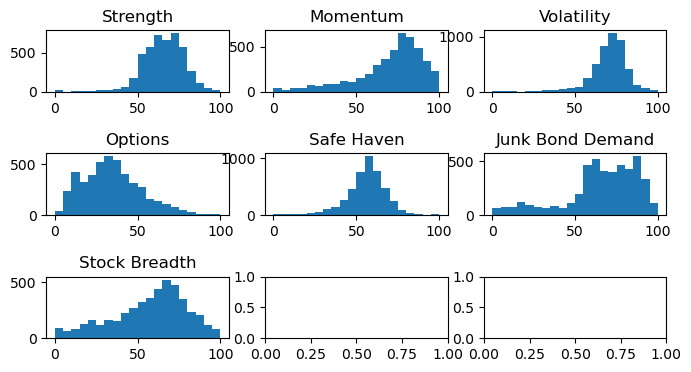

In [63]:
a = np.array(new_df["Strength Score"])
b = np.array(new_df["Momentum Score"])
c = np.array(new_df["Volatility Score"])
d = np.array(new_df["Options Score"])
e = np.array(new_df["Safe Haven Score"])
f = np.array(new_df["Junk Bond Demand Score"])
g = np.array(new_df["Stock Breadth Score"])


fig, axis = plt.subplots(3,3,figsize=(8,4))

fig.subplots_adjust(hspace=1)

axis[0,0].hist(a, bins = np.arange(0,105,5).tolist())
axis[0,0].set_title("Strength")

axis[0,1].hist(b, bins = np.arange(0,105,5).tolist())
axis[0,1].set_title("Momentum")

axis[0,2].hist(c, bins = np.arange(0,105,5).tolist())
axis[0,2].set_title("Volatility")

axis[1,0].hist(d, bins = np.arange(0,105,5).tolist())
axis[1,0].set_title("Options")

axis[1,1].hist(e, bins = np.arange(0,105,5).tolist())
axis[1,1].set_title("Safe Haven")

axis[1,2].hist(f, bins = np.arange(0,105,5).tolist())
axis[1,2].set_title("Junk Bond Demand")

axis[2,0].hist(g, bins = np.arange(0,105,5).tolist())
axis[2,0].set_title("Stock Breadth")


plt.show()

In [64]:
cols = list(new_df.columns)
cols.remove('Date')
cols.remove('Fear and Greed Index')


for col in cols:
    col_zscore = col + '_zscore'
    new_df[col_zscore] = (new_df[col] - new_df[col].median())/(new_df[col].std())

In [65]:
new_df.head(10)

Date  Strength Score  Momentum Score  Volatility Score  Options Score  \
0 2023-05-05       62.280702             NaN         78.026732      73.635149   
1 2023-05-04       56.491228       64.632429         74.424787      74.156342   
2 2023-05-03       62.807018       66.881601         76.715425      77.583156   
3 2023-05-02       61.052632       69.043809         77.546132      79.023606   
4 2023-05-01       66.666667       72.583563         79.804849      77.745416   
5 2023-04-28       64.736842       72.847226         80.288513      76.936903   
6 2023-04-27       63.333333       70.648025         78.804578      73.153682   
7 2023-04-26       59.473684       65.231661         76.524155      69.717258   
8 2023-04-25       63.157895       66.443836         76.628089      62.552718   
9 2023-04-24       63.859649       71.204108         79.056114      62.748938   

   Safe Haven Score  Junk Bond Demand Score  Stock Breadth Score  \
0               NaN               65.329188            53.054174   
1         58.197149               66.624945            53.552863   
2         59.642908               63.388464            55.728127   
3         61.390411               69.211802            57.292244   
4         63.201414               73.147521            58.536353   
5         65.115371               58.858748            58.570835   
6         63.754968               68.158935            58.130793   
7         61.752363               65.769236            58.644633   
8         63.126157               59.871382            60.498454   
9         64.910511               59.177448            61.874092   

   Fear and Greed Index  Strength Score_zscore  Momentum Score_zscore  \
0                   NaN              -0.297908                    NaN   
1             64.011392              -0.744769              -0.542767   
2             66.106671              -0.257284              -0.433254   
3             67.794377              -0.392697              -0.327976   
4             70.240826               0.040624              -0.155624   
5             68.193491              -0.108330              -0.142787   
6             67.997759              -0.216660              -0.249866   
7             65.301856              -0.514568              -0.513590   
8             64.611219              -0.230201              -0.454569   
9             66.118694              -0.176036              -0.222791   

   Volatility Score_zscore  Options Score_zscore  Safe Haven Score_zscore  \
0                 0.520142              2.277993                      NaN   
1                 0.229314              2.307483                 0.098585   
2                 0.414265              2.501379                 0.212997   
3                 0.481338              2.582883                 0.351287   
4                 0.663711              2.510560                 0.494603   
5                 0.702763              2.464813                 0.646065   
6                 0.582947              2.250751                 0.538409   
7                 0.398821              2.056311                 0.379930   
8                 0.407213              1.650926                 0.488647   
9                 0.603257              1.662029                 0.629854   

   Junk Bond Demand Score_zscore  Stock Breadth Score_zscore  
0                      -0.163659                   -0.392693  
1                      -0.106114                   -0.370411  
2                      -0.249848                   -0.273215  
3                       0.008770                   -0.203326  
4                       0.183557                   -0.147736  
5                      -0.451015                   -0.146195  
6                      -0.037989                   -0.165858  
7                      -0.144116                   -0.142898  
8                      -0.406043                   -0.060065  
9                      -0.436861                    0.001402

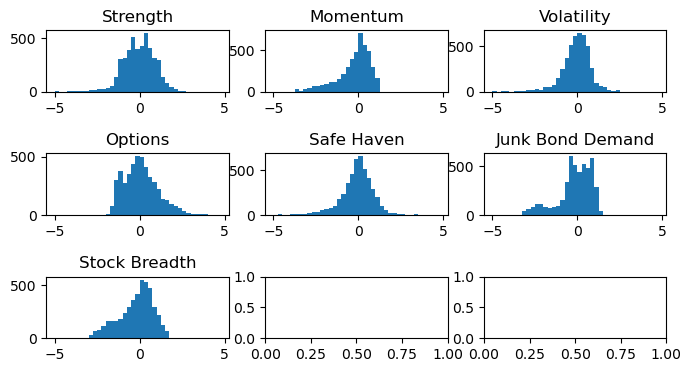

In [66]:
a = np.array(new_df["Strength Score_zscore"])
b = np.array(new_df["Momentum Score_zscore"])
c = np.array(new_df["Volatility Score_zscore"])
d = np.array(new_df["Options Score_zscore"])
e = np.array(new_df["Safe Haven Score_zscore"])
f = np.array(new_df["Junk Bond Demand Score_zscore"])
g = np.array(new_df["Stock Breadth Score_zscore"])


fig, axis = plt.subplots(3,3,figsize=(8,4))

fig.subplots_adjust(hspace=1)

axis[0,0].hist(a, bins = np.arange(-5,5,0.25).tolist())
axis[0,0].set_title("Strength")

axis[0,1].hist(b, bins = np.arange(-5,5,0.25).tolist())
axis[0,1].set_title("Momentum")

axis[0,2].hist(c, bins = np.arange(-5,5,0.25).tolist())
axis[0,2].set_title("Volatility")

axis[1,0].hist(d, bins = np.arange(-5,5,0.25).tolist())
axis[1,0].set_title("Options")

axis[1,1].hist(e, bins = np.arange(-5,5,0.25).tolist())
axis[1,1].set_title("Safe Haven")

axis[1,2].hist(f, bins = np.arange(-5,5,0.25).tolist())
axis[1,2].set_title("Junk Bond Demand")

axis[2,0].hist(g, bins = np.arange(-5,5,0.25).tolist())
axis[2,0].set_title("Stock Breadth")

#plt.xlim(xmin=-4, xmax = 4)


plt.show()

In [67]:
new_df["FGI_zscore"] = (new_df["Strength Score_zscore"]+new_df["Momentum Score_zscore"]+new_df["Volatility Score_zscore"]+new_df["Options Score_zscore"]+new_df["Safe Haven Score_zscore"]+new_df["Junk Bond Demand Score_zscore"]+new_df["Stock Breadth Score_zscore"])/7

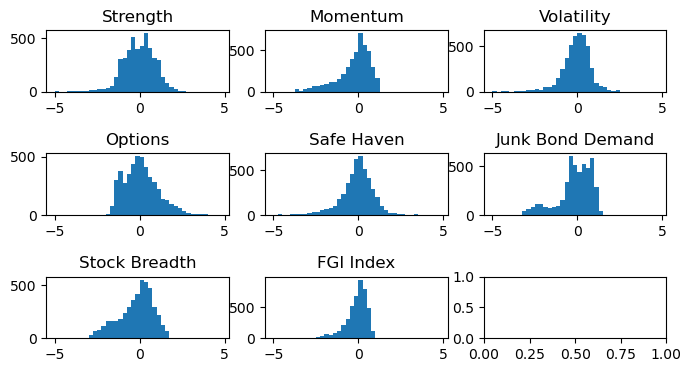

In [69]:
a = np.array(new_df["Strength Score_zscore"])
b = np.array(new_df["Momentum Score_zscore"])
c = np.array(new_df["Volatility Score_zscore"])
d = np.array(new_df["Options Score_zscore"])
e = np.array(new_df["Safe Haven Score_zscore"])
f = np.array(new_df["Junk Bond Demand Score_zscore"])
g = np.array(new_df["Stock Breadth Score_zscore"])
h = np.array(new_df["FGI_zscore"])

fig, axis = plt.subplots(3,3,figsize=(8,4))

fig.subplots_adjust(hspace=1)

axis[0,0].hist(a, bins = np.arange(-5,5,0.25).tolist())
axis[0,0].set_title("Strength")

axis[0,1].hist(b, bins = np.arange(-5,5,0.25).tolist())
axis[0,1].set_title("Momentum")

axis[0,2].hist(c, bins = np.arange(-5,5,0.25).tolist())
axis[0,2].set_title("Volatility")

axis[1,0].hist(d, bins = np.arange(-5,5,0.25).tolist())
axis[1,0].set_title("Options")

axis[1,1].hist(e, bins = np.arange(-5,5,0.25).tolist())
axis[1,1].set_title("Safe Haven")

axis[1,2].hist(f, bins = np.arange(-5,5,0.25).tolist())
axis[1,2].set_title("Junk Bond Demand")

axis[2,0].hist(g, bins = np.arange(-5,5,0.25).tolist())
axis[2,0].set_title("Stock Breadth")

axis[2,1].hist(h, bins = np.arange(-5,5,0.25).tolist())
axis[2,1].set_title("FGI Index")

plt.show()

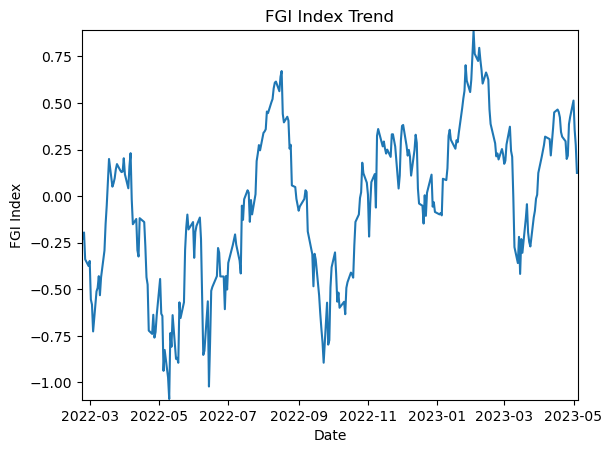

<Figure size 1000x600 with 0 Axes>

<Figure size 10000x480 with 0 Axes>

In [70]:
fg, ax = plt.subplots()

plt.plot(new_df["Date"][:300], new_df["FGI_zscore"][:300])
plt.xlabel("Date")  # add X-axis label
plt.ylabel("FGI Index")  # add Y-axis label
plt.title("FGI Index Trend")  # add title
plt.figure(figsize=(10,6))


ax.margins(0.002,0.002)

plt.figure().set_figwidth(100)

plt.show()

In [71]:
new_df.head(20)

Date  Strength Score  Momentum Score  Volatility Score  \
0  2023-05-05       62.280702             NaN         78.026732   
1  2023-05-04       56.491228       64.632429         74.424787   
2  2023-05-03       62.807018       66.881601         76.715425   
3  2023-05-02       61.052632       69.043809         77.546132   
4  2023-05-01       66.666667       72.583563         79.804849   
5  2023-04-28       64.736842       72.847226         80.288513   
6  2023-04-27       63.333333       70.648025         78.804578   
7  2023-04-26       59.473684       65.231661         76.524155   
8  2023-04-25       63.157895       66.443836         76.628089   
9  2023-04-24       63.859649       71.204108         79.056114   
10 2023-04-21       63.157895       71.172726         79.302288   
11 2023-04-20       64.385965       71.173565         78.892169   
12 2023-04-19       63.157895       73.159728         79.861540   
13 2023-04-18       65.438596       73.429153         79.445293   
14 2023-04-17       62.982456       73.447838         79.358468   
15 2023-04-14       61.929825       72.804679         79.240489   
16 2023-04-13       62.456140       73.672306         78.350792   
17 2023-04-12       62.105263       70.171584         76.705465   
18 2023-04-11       62.105263       71.651319         76.700613   
19 2023-04-10       60.877193       71.943001         76.888052   

    Options Score  Safe Haven Score  Junk Bond Demand Score  \
0       73.635149               NaN               65.329188   
1       74.156342         58.197149               66.624945   
2       77.583156         59.642908               63.388464   
3       79.023606         61.390411               69.211802   
4       77.745416         63.201414               73.147521   
5       76.936903         65.115371               58.858748   
6       73.153682         63.754968               68.158935   
7       69.717258         61.752363               65.769236   
8       62.552718         63.126157               59.871382   
9       62.748938         64.910511               59.177448   
10      59.081449         66.714507               65.326924   
11      60.768385         68.437161               62.494203   
12      63.387484         71.440683               64.555628   
13      70.089056         68.962157               62.219359   
14      70.137391         70.351534               67.297404   
15      69.431478         69.974732               70.772312   
16      64.503355         68.612123               67.067257   
17      61.581992         69.223037               67.711772   
18      59.097101         66.708314               64.275868   
19      62.096672         71.299876               69.816342   

    Stock Breadth Score  Fear and Greed Index  Strength Score_zscore  \
0             53.054174                   NaN              -0.297908   
1             53.552863             64.011392              -0.744769   
2             55.728127             66.106671              -0.257284   
3             57.292244             67.794377              -0.392697   
4             58.536353             70.240826               0.040624   
5             58.570835             68.193491              -0.108330   
6             58.130793             67.997759              -0.216660   
7             58.644633             65.301856              -0.514568   
8             60.498454             64.611219              -0.230201   
9             61.874092             66.118694              -0.176036   
10            61.854239             66.658575              -0.230201   
11            61.994519             66.877995              -0.135413   
12            61.888591             68.207364              -0.230201   
13            61.119137             68.671822              -0.054165   
14            60.016222             69.084473              -0.243743   
15            58.482670             68.948026              -0.324990   
16            57.155489             67.402495        

In [72]:
new_df.describe()

Strength Score  Momentum Score  Volatility Score  Options Score  \
count     4614.000000     4490.000000       4587.000000    4643.000000   
mean        65.368239       70.380300         69.976148      34.836419   
std         12.955851       20.537991         12.385112      17.673443   
min          0.000000        0.000000          0.000000       0.000000   
25%         57.794118       61.638150         65.269418      22.245996   
50%         66.140351       75.779777         71.584709      33.375171   
75%         74.015748       84.433867         77.277311      45.326796   
max        100.000000      100.000000        100.000000     100.000000   

       Safe Haven Score  Junk Bond Demand Score  Stock Breadth Score  \
count       4583.000000             4702.000000          4561.000000   
mean          55.775691               65.583410            57.403142   
std           12.636473               22.517193            22.380156   
min            0.000000                0.000000             0.000000   
25%           50.115308               57.042544            44.058865   
50%           56.951382               69.014331            61.842712   
75%           63.126956               83.066270            73.534407   
max          100.000000              100.000000           100.000000   

       Fear and Greed Index  Strength Score_zscore  Momentum Score_zscore  \
count           4490.000000            4614.000000           4.490000e+03   
mean              60.056911              -0.059596          -2.629019e-01   
std               11.252428               1.000000           1.000000e+00   
min               13.200878              -5.105056          -3.689737e+00   
25%               54.980496              -0.644206          -6.885595e-01   
50%               62.525715               0.000000           3.459689e-16   
75%               67.873160               0.607864           4.213698e-01   
max               80.382845               2.613464           1.179289e+00   

       Volatility Score_zscore  Options Score_zscore  Safe Haven Score_zscore  \
count              4587.000000           4643.000000              4583.000000   
mean                 -0.129879              0.082680                -0.093039   
std                   1.000000              1.000000                 1.000000   
min                  -5.779900             -1.888436                -4.506905   
25%                  -0.509910             -0.629712                -0.540980   
50%                   0.000000              0.000000                 0.000000   
75%                   0.459633              0.676248                 0.488710   
max                   2.294310              3.769771                 3.406696   

       Junk Bond Demand Score_zscore  Stock Breadth Score_zscore   FGI_zscore  
count                   4.702000e+03                 4561.000000  4490.000000  
mean                   -1.523690e-01                   -0.198371    -0.107074  
std                     1.000000e+00                    1.000000     0.640649  
min                    -3.064962e+00                   -2.763283    -3.151997  
25%                    -5.316732e-01                   -0.794626    -0.387667  
50%                    -3.155570e-16                    0.000000     0.031283  
75%                     6.240538e-01                    0.522413     0.335572  
max                     1.376089e+00                    1.704961     1.117101

In [60]:

#fg, ax = plt.subplots()

#plt.plot(new_df["Date"][:300], new_df["Fear and Greed Index"][:300])
#plt.xlabel("Date")  # add X-axis label
#plt.ylabel("FGI Index")  # add Y-axis label
#plt.title("FGI Index Trend")  # add title
#plt.figure(figsize=(10,6))


#ax.margins(0.002,0.002)

#plt.figure().set_figwidth(100)

#plt.show()


In [73]:
new_df.to_excel("Fear&GreedIndex.xlsx")

# Backtesting:

Absolute Values of FGI Used:

In [2]:
bt_df = pd.read_excel("FGI_2_final.xlsx")

In [3]:
bt_df = pd.DataFrame({'Date' : bt_df["Date"], 'FGI' : bt_df["FGI_2"]})

In [4]:
bt_df.head()

Date        FGI
0 2023-05-07        NaN
1 2023-05-05  76.807929
2 2023-05-04  75.691390
3 2023-05-03  80.734407
4 2023-05-02  86.601211

In [5]:
fear_cutoff = bt_df['FGI'].quantile(q=0.40)
greed_cutoff = bt_df['FGI'].quantile(q=0.60)

In [6]:
bt_df.dropna(inplace=True)

In [7]:
bt_df.tail()

Date        FGI
4486 2005-07-12  73.226503
4487 2005-07-11  75.028743
4488 2005-07-08  70.493815
4489 2005-07-07  67.704930
4490 2005-07-06  72.985864

In [8]:
bt_df["Long/Short"] = pd.Series(dtype="string")

In [9]:
for i in range(bt_df.shape[0]):
    if(bt_df.iloc[i,1]>=greed_cutoff):
        bt_df.iloc[i,2] = "Short"
    elif(bt_df.iloc[i,1]<=fear_cutoff):
        bt_df.iloc[i,2] = "Long"
    else:
        bt_df.iloc[i,2] = "Sideways"

In [10]:
spxt = pd.read_excel("S&P500.xlsx")


In [11]:
spxt.head()

Date     SPXT
0 2023-05-05  8858.86
1 2023-05-04  8697.68
2 2023-05-03  8759.95
3 2023-05-02  8821.59
4 2023-05-01  8924.92

In [12]:
bt_df = pd.merge(bt_df, spxt, on='Date')

In [13]:
bt_df.head()

Date        FGI Long/Short     SPXT
0 2023-05-05  76.807929      Short  8858.86
1 2023-05-04  75.691390   Sideways  8697.68
2 2023-05-03  80.734407      Short  8759.95
3 2023-05-02  86.601211      Short  8821.59
4 2023-05-01  81.207253      Short  8924.92

In [14]:
bt_df["Monthly_Return"] = pd.Series(dtype="float")

In [15]:
for i in range(22,bt_df.shape[0]):
    if(bt_df.loc[i,"Long/Short"]=="Long"):
        bt_df.loc[i,"Monthly_Return"] = (bt_df.loc[i-22,"SPXT"] - bt_df.loc[i,"SPXT"])/bt_df.loc[i,"SPXT"]
    elif(bt_df.loc[i,"Long/Short"]=="Short"):
        bt_df.loc[i,"Monthly_Return"] = ((bt_df.loc[i,"SPXT"] - bt_df.loc[i-22,"SPXT"])/bt_df.loc[i,"SPXT"]) 
    else:
        bt_df.loc[i,"Monthly_Return"] = 0

In [16]:
bt_df["Monthly_Return"] = bt_df["Monthly_Return"]*100

In [17]:
bt_df.head(50)

Date        FGI Long/Short     SPXT  Monthly_Return
0  2023-05-05  76.807929      Short  8858.86             NaN
1  2023-05-04  75.691390   Sideways  8697.68             NaN
2  2023-05-03  80.734407      Short  8759.95             NaN
3  2023-05-02  86.601211      Short  8821.59             NaN
4  2023-05-01  81.207253      Short  8924.92             NaN
5  2023-04-28  79.919365      Short  8928.35             NaN
6  2023-04-27  75.315292   Sideways  8854.32             NaN
7  2023-04-26  77.698495      Short  8684.19             NaN
8  2023-04-25  83.130556      Short  8717.63             NaN
9  2023-04-24  84.777291      Short  8857.30             NaN
10 2023-04-21  76.922102      Short  8849.76             NaN
11 2023-04-20  78.280745      Short  8841.62             NaN
12 2023-04-19  81.700970      Short  8893.60             NaN
13 2023-04-18  83.543062      Short  8894.35             NaN
14 2023-04-17  80.167004      Short  8886.76             NaN
15 2023-04-14  81.857430      Short  8857.31             NaN
16 2023-04-13  80.192961      Short  8875.65             NaN
17 2023-04-12  80.858131      Short  8758.11             NaN
18 2023-04-11  78.645096      Short  8794.29             NaN
19 2023-04-10  81.883401      Short  8794.65             NaN
20 2023-04-06  77.075702      Short  8785.70             NaN
21 2023-04-05  80.379612      Short  8752.54             NaN
22 2023-04-04  81.852414      Short  8773.31       -0.975117
23 2023-04-03  80.815608      Short  8823.66        1.427752
24 2023-03-31  77.982785      Short  8791.13        0.354676
25 2023-03-30  75.361754   Sideways  8665.70        0.000000
26 2023-03-29  76.118900      Short  8615.29       -3.593959
27 2023-03-28  79.127483      Short  8494.35       -5.109279
28 2023-03-27  74.387123   Sideways  8507.54        0.000000
29 2023-03-24  74.933959   Sideways  8493.55        0.000000
30 2023-03-23  70.067062       Long  8445.87        3.217667
31 2023-03-22  75.889371   Sideways  8420.02        0.000000
32 2023-03-21  74.863243   Sideways  8560.31        0.000000
33 2023-03-20  70.050642       Long  8449.98        4.634804
34 2023-03-17  66.935483       Long  8375.21        6.189576
35 2023-03-16  70.958610   Sideways  8468.33        0.000000
36 2023-03-15  70.606925       Long  8320.96        6.799696
37 2023-03-14  51.133714       Long  8379.16        5.706419
38 2023-03-13  72.463127   Sideways  8241.39        0.000000
39 2023-03-10  68.196986       Long  8253.65        6.111963
40 2023-03-09  81.017194      Short  8374.25       -5.015852
41 2023-03-08  74.846052   Sideways  8530.33        0.000000
42 2023-03-07  75.758866   Sideways  8517.54        0.000000
43 2023-03-06  75.822814   Sideways  8649.88        0.000000
44 2023-03-03  78.464475      Short  8643.61       -1.500530
45 2023-03-02  71.768739   Sideways  8505.55        0.000000
46 2023-03-01  75.454192   Sideways  8440.25        0.000000
47 2023-02-28  80.733787      Short  8479.80       -2.192269
48 2023-02-27  77.497722      Short  8504.76       -1.299625
49 2023-02-24  74.499773   Sideways  8477.66        0.000000

In [18]:
bt_df["Monthly_Return"].describe()

count    4468.000000
mean       -0.447057
std         4.488304
min       -33.540023
25%        -2.728785
50%         0.000000
75%         1.577313
max        29.218453
Name: Monthly_Return, dtype: float64

In [19]:
bt_df.loc[bt_df["Monthly_Return"]==bt_df["Monthly_Return"].min(),"Date"]

808   2020-02-20
Name: Date, dtype: datetime64[ns]

In [20]:
bt_df["1_Day_Lag"] = pd.Series(dtype="float")

In [21]:
for i in range(23,bt_df.shape[0]):
    if(bt_df.loc[i,"Long/Short"]=="Long"):
        bt_df.loc[i,["1_Day_Lag"]] = (bt_df.loc[i-1-22,"SPXT"] - bt_df.loc[i-1,"SPXT"])/bt_df.loc[i-1,"SPXT"]
    elif(bt_df.loc[i,"Long/Short"]=="Short"):
        bt_df.loc[i,["1_Day_Lag"]] = ((bt_df.loc[i-1,"SPXT"] - bt_df.loc[i-1-22,"SPXT"])/bt_df.loc[i-1,"SPXT"]) 
    else:
        bt_df.loc[i,["1_Day_Lag"]] = 0

In [22]:
bt_df.describe()

FGI          SPXT  Monthly_Return    1_Day_Lag
count  4490.000000   4490.000000     4468.000000  4467.000000
mean     70.928075   4059.481777       -0.447057    -0.004311
std      12.457615   2350.680334        4.488304     0.044763
min       0.000000   1095.040000      -33.540023    -0.335400
25%      65.519543   2139.105000       -2.728785    -0.027080
50%      73.566561   3461.690000        0.000000     0.000000
75%      79.196355   5499.177500        1.577313     0.015854
max     100.000000  10050.410000       29.218453     0.292185

In [23]:
bt_df["3_Day_Lag"] = pd.Series(dtype="float")
for i in range(25,bt_df.shape[0]):
    if(bt_df.loc[i,"Long/Short"]=="Long"):
        bt_df.loc[i,["3_Day_Lag"]] = (bt_df.loc[i-3-22,"SPXT"] - bt_df.loc[i-3,"SPXT"])/bt_df.loc[i-3,"SPXT"]
    elif(bt_df.loc[i,"Long/Short"]=="Short"):
        bt_df.loc[i,["3_Day_Lag"]] = ((bt_df.loc[i-3,"SPXT"] - bt_df.loc[i-3-22,"SPXT"])/bt_df.loc[i-3,"SPXT"]) 
    else:
        bt_df.loc[i,["3_Day_Lag"]] = 0

In [24]:
bt_df.describe()

FGI          SPXT  Monthly_Return    1_Day_Lag    3_Day_Lag
count  4490.000000   4490.000000     4468.000000  4467.000000  4465.000000
mean     70.928075   4059.481777       -0.447057    -0.004311    -0.002101
std      12.457615   2350.680334        4.488304     0.044763     0.044770
min       0.000000   1095.040000      -33.540023    -0.335400    -0.296728
25%      65.519543   2139.105000       -2.728785    -0.027080    -0.025128
50%      73.566561   3461.690000        0.000000     0.000000     0.000000
75%      79.196355   5499.177500        1.577313     0.015854     0.018319
max     100.000000  10050.410000       29.218453     0.292185     0.292185

In [25]:
bt_df["5_Day_Lag"] = pd.Series(dtype="float")
for i in range(27,bt_df.shape[0]):
    if(bt_df.loc[i,"Long/Short"]=="Long"):
        bt_df.loc[i,["5_Day_Lag"]] = (bt_df.loc[i-5-22,"SPXT"] - bt_df.loc[i-3,"SPXT"])/bt_df.loc[i-5,"SPXT"]
    elif(bt_df.loc[i,"Long/Short"]=="Short"):
        bt_df.loc[i,["5_Day_Lag"]] = ((bt_df.loc[i-5,"SPXT"] - bt_df.loc[i-5-22,"SPXT"])/bt_df.loc[i-5,"SPXT"]) 
    else:
        bt_df.loc[i,["5_Day_Lag"]] = 0

In [26]:
bt_df.describe()

FGI          SPXT  Monthly_Return    1_Day_Lag    3_Day_Lag  \
count  4490.000000   4490.000000     4468.000000  4467.000000  4465.000000   
mean     70.928075   4059.481777       -0.447057    -0.004311    -0.002101   
std      12.457615   2350.680334        4.488304     0.044763     0.044770   
min       0.000000   1095.040000      -33.540023    -0.335400    -0.296728   
25%      65.519543   2139.105000       -2.728785    -0.027080    -0.025128   
50%      73.566561   3461.690000        0.000000     0.000000     0.000000   
75%      79.196355   5499.177500        1.577313     0.015854     0.018319   
max     100.000000  10050.410000       29.218453     0.292185     0.292185   

         5_Day_Lag  
count  4463.000000  
mean     -0.001604  
std       0.046181  
min      -0.297605  
25%      -0.024921  
50%       0.000000  
75%       0.019448  
max       0.335400

Simple Moving Average of FGI Values:

In [129]:
bt_df1 = pd.read_excel("FGI_2_final.xlsx")

In [130]:
bt_df1 = pd.DataFrame({'Date' : bt_df1["Date"], 'FGI' : bt_df1["FGI_2"]})

In [131]:
bt_df1 = pd.merge(bt_df1, spxt, on='Date')

In [132]:
bt_df1["FGI_5_SMAVG"] = bt_df1["FGI"].rolling(window=5).mean().shift(-4)

In [133]:
fear_cutoff1 = bt_df1['FGI_5_SMAVG'].quantile(q=0.40)
greed_cutoff1= bt_df1['FGI_5_SMAVG'].quantile(q=0.60)

In [134]:
bt_df1["Long/Short"] = pd.Series(dtype="string")
for i in range(bt_df1.shape[0]):
    if(bt_df1.iloc[i,3]>=greed_cutoff1):
        bt_df1.iloc[i,4] = "Short"
    elif(bt_df1.iloc[i,3]<=fear_cutoff1):
        bt_df1.iloc[i,4] = "Long"
    else:
        bt_df1.iloc[i,4] = "Sideways"

In [135]:
bt_df1["Monthly_Return"] = pd.Series(dtype="float")
for i in range(22,bt_df1.shape[0]):
    if(bt_df1.loc[i,"Long/Short"]=="Long"):
        bt_df1.loc[i,"Monthly_Return"] = (bt_df1.loc[i-22,"SPXT"] - bt_df1.loc[i,"SPXT"])/bt_df1.loc[i,"SPXT"]
    elif(bt_df1.loc[i,"Long/Short"]=="Short"):
        bt_df1.loc[i,"Monthly_Return"] = ((bt_df1.loc[i,"SPXT"] - bt_df1.loc[i-22,"SPXT"])/bt_df1.loc[i,"SPXT"]) 
    else:
        bt_df1.loc[i,"Monthly_Return"] = 0

In [136]:
bt_df1["1_Day_Lag"] = pd.Series(dtype="float")
for i in range(23,bt_df1.shape[0]):
    if(bt_df1.loc[i,"Long/Short"]=="Long"):
        bt_df1.loc[i,["1_Day_Lag"]] = (bt_df1.loc[i-1-22,"SPXT"] - bt_df1.loc[i-1,"SPXT"])/bt_df1.loc[i-1,"SPXT"]
    elif(bt_df1.loc[i,"Long/Short"]=="Short"):
        bt_df1.loc[i,["1_Day_Lag"]] = ((bt_df1.loc[i-1,"SPXT"] - bt_df1.loc[i-1-22,"SPXT"])/bt_df1.loc[i-1,"SPXT"]) 
    else:
        bt_df1.loc[i,["1_Day_Lag"]] = 0

In [137]:
bt_df1["3_Day_Lag"] = pd.Series(dtype="float")
for i in range(25,bt_df1.shape[0]):
    if(bt_df1.loc[i,"Long/Short"]=="Long"):
        bt_df1.loc[i,["3_Day_Lag"]] = (bt_df1.loc[i-3-22,"SPXT"] - bt_df1.loc[i-3,"SPXT"])/bt_df1.loc[i-3,"SPXT"]
    elif(bt_df1.loc[i,"Long/Short"]=="Short"):
        bt_df1.loc[i,["3_Day_Lag"]] = ((bt_df1.loc[i-3,"SPXT"] - bt_df1.loc[i-3-22,"SPXT"])/bt_df1.loc[i-3,"SPXT"]) 
    else:
        bt_df1.loc[i,["3_Day_Lag"]] = 0

In [138]:
bt_df1["5_Day_Lag"] = pd.Series(dtype="float")
for i in range(27,bt_df1.shape[0]):
    if(bt_df1.loc[i,"Long/Short"]=="Long"):
        bt_df1.loc[i,["5_Day_Lag"]] = (bt_df1.loc[i-5-22,"SPXT"] - bt_df1.loc[i-5,"SPXT"])/bt_df1.loc[i-5,"SPXT"]
    elif(bt_df1.loc[i,"Long/Short"]=="Short"):
        bt_df1.loc[i,["5_Day_Lag"]] = ((bt_df1.loc[i-5,"SPXT"] - bt_df1.loc[i-5-22,"SPXT"])/bt_df1.loc[i-5,"SPXT"]) 
    else:
        bt_df1.loc[i,["5_Day_Lag"]] = 0

In [139]:
bt_df1.head(50)

Date        FGI     SPXT  FGI_5_SMAVG Long/Short  Monthly_Return  \
0  2023-05-05  76.807929  8858.86    80.208438      Short             NaN   
1  2023-05-04  75.691390  8697.68    80.830725      Short             NaN   
2  2023-05-03  80.734407  8759.95    80.755506      Short             NaN   
3  2023-05-02  86.601211  8821.59    80.148323      Short             NaN   
4  2023-05-01  81.207253  8924.92    79.454192      Short             NaN   
5  2023-04-28  79.919365  8928.35    80.168200      Short             NaN   
6  2023-04-27  75.315292  8854.32    79.568747      Short             NaN   
7  2023-04-26  77.698495  8684.19    80.161838      Short             NaN   
8  2023-04-25  83.130556  8717.63    80.962333      Short             NaN   
9  2023-04-24  84.777291  8857.30    81.044834      Short             NaN   
10 2023-04-21  76.922102  8849.76    80.122777      Short             NaN   
11 2023-04-20  78.280745  8841.62    81.109842      Short             NaN   
12 2023-04-19  81.700970  8893.60    81.492285      Short             NaN   
13 2023-04-18  83.543062  8894.35    81.323718      Short             NaN   
14 2023-04-17  80.167004  8886.76    80.344124      Short             NaN   
15 2023-04-14  81.857430  8857.31    80.687404      Short             NaN   
16 2023-04-13  80.192961  8875.65    79.731058      Short             NaN   
17 2023-04-12  80.858131  8758.11    79.768388      Short             NaN   
18 2023-04-11  78.645096  8794.29    79.967245      Short             NaN   
19 2023-04-10  81.883401  8794.65    80.401347      Short             NaN   
20 2023-04-06  77.075702  8785.70    79.621224      Short             NaN   
21 2023-04-05  80.379612  8752.54    79.278435      Short             NaN   
22 2023-04-04  81.852414  8773.31    78.426292      Short       -0.009751   
23 2023-04-03  80.815608  8823.66    77.881306      Short        0.014278   
24 2023-03-31  77.982785  8791.13    76.595609      Short        0.003547   
25 2023-03-30  75.361754  8665.70    75.985844      Short       -0.017989   
26 2023-03-29  76.118900  8615.29    74.926906   Sideways        0.000000   
27 2023-03-28  79.127483  8494.35    74.881000   Sideways        0.000000   
28 2023-03-27  74.387123  8507.54    74.028152   Sideways        0.000000   
29 2023-03-24  74.933959  8493.55    73.160855   Sideways        0.000000   
30 2023-03-23  70.067062  8445.87    71.561160   Sideways        0.000000   
31 2023-03-22  75.889371  8420.02    71.739470   Sideways        0.000000   
32 2023-03-21  74.863243  8560.31    70.682981       Long        0.033813   
33 2023-03-20  70.050642  8449.98    65.937075       Long        0.046348   
34 2023-03-17  66.935483  8375.21    66.419572       Long        0.061896   
35 2023-03-16  70.958610  8468.33    66.671873       Long        0.050307   
36 2023-03-15  70.606925  8320.96    68.683589       Long        0.067997   
37 2023-03-14  51.133714  8379.16    69.531415       Long        0.057064   
38 2023-03-13  72.463127  8241.39    74.456445   Sideways        0.000000   
39 2023-03-10  68.196986  8253.65    75.128382   Sideways        0.000000   
40 2023-03-09  81.017194  8374.25    77.181880      Short       -0.050159   
41 2023-03-08  74.846052  8530.33    75.332189   Sideways        0.000000   
42 2023-03-07  75.758866  8517.54    75.453817   Sideways        0.000000   
43 2023-03-06  75.822814  8649.88    76.448801      Short       -0.011868   
44 2023-03-03  78.464475  8643.61    76.783783      Short       -0.015005   
45 2023-03-02  71.768739  8505.55    75.990843      Short       -0.037400   
46 2023-03-01  75.454192  8440.25    76.522231      Short       -0.041572   
47 2023-02-28  80.733787  8479.80    76.606131      Short       -0.021923   
48 2023-02-27  77.497722  8504.76    75.388462   Sideways        0.000000   
49 2023-02-24  74.499773  8477.66    75.924820      Short       -0.001969   

    1_Day_Lag  3_Day_Lag  5_Day_Lag  
0         NaN        NaN        NaN  
1    

In [140]:
bt_df1["6_Day_Lag"] = pd.Series(dtype="float")
for i in range(28,bt_df1.shape[0]):
    if(bt_df1.loc[i,"Long/Short"]=="Long"):
        bt_df1.loc[i,["6_Day_Lag"]] = (bt_df1.loc[i-6-22,"SPXT"] - bt_df1.loc[i-6,"SPXT"])/bt_df1.loc[i-6,"SPXT"]
    elif(bt_df1.loc[i,"Long/Short"]=="Short"):
        bt_df1.loc[i,["6_Day_Lag"]] = ((bt_df1.loc[i-6,"SPXT"] - bt_df1.loc[i-6-22,"SPXT"])/bt_df1.loc[i-6,"SPXT"]) 
    else:
        bt_df1.loc[i,["6_Day_Lag"]] = 0

In [141]:
bt_df1.describe()

FGI          SPXT  FGI_5_SMAVG  Monthly_Return    1_Day_Lag  \
count  4490.000000   4490.000000  4486.000000     4468.000000  4467.000000   
mean     70.928075   4059.481777    70.924736       -0.003345    -0.002651   
std      12.457615   2350.680334    11.927547        0.045168     0.045320   
min       0.000000   1095.040000     4.651906       -0.335400    -0.335400   
25%      65.519543   2139.105000    65.662397       -0.026689    -0.025988   
50%      73.566561   3461.690000    73.676721        0.000000     0.000000   
75%      79.196355   5499.177500    79.180181        0.016786     0.017818   
max     100.000000  10050.410000    94.941729        0.292185     0.292185   

         3_Day_Lag    5_Day_Lag    6_Day_Lag  
count  4465.000000  4463.000000  4462.000000  
mean     -0.001257    -0.001078    -0.001067  
std       0.045471     0.045675     0.045829  
min      -0.296728    -0.296728    -0.296728  
25%      -0.024295    -0.024196    -0.024253  
50%       0.000000     0.000000     0.000000  
75%       0.019273     0.020328     0.020344  
max       0.335400     0.335400     0.335400

In [41]:
bt_df1["5_Day_Lag"].quantile(q=0.617)

3.1235305971652305e-06

In [42]:
bt_df1.loc[bt_df1["5_Day_Lag"]==bt_df1["5_Day_Lag"].min(),"FGI"]

3682    7.657085
Name: FGI, dtype: float64

In [43]:
bt_df1.loc[bt_df1["5_Day_Lag"]==bt_df1["5_Day_Lag"].max(),"Date"]

813   2020-02-12
Name: Date, dtype: datetime64[ns]

In [44]:
 bt_df1.loc[bt_df1["Long/Short"]=="Long","5_Day_Lag"].describe()

count    1795.000000
mean        0.006976
std         0.055338
min        -0.296728
25%        -0.016854
50%         0.013227
75%         0.036179
max         0.252339
Name: 5_Day_Lag, dtype: float64

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   2.,
          1.,   0.,   2.,   1.,   1.,   0.,   3.,   3.,   0.,   4.,   3.,
          1.,   2.,   1.,   2.,   0.,   2.,   0.,   3.,   2.,   4.,   4.,
          1.,   4.,   8.,   9.,   9.,  15.,  16.,  12.,  22.,  28.,  15.,
         29.,  37.,  39.,  35.,  39.,  41.,  45.,  67.,  62.,  65., 104.,
        110.,  97.,  99., 118., 108., 100.,  84.,  57.,  50.,  42.,  29.,
         21.,  17.,  26.,  15.,  10.,  15.,   4.,   3.,   4.,   7.,   2.,
          4.,   2.,   2.,   2.,   4.,   1.,   3.,   0.,   1.,   1.,   1.,
          0.,   3.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([-2.96728245e-01, -2.91237572e-01, -2.85746899e-01, -2.80256226e-01,
        -2.74765553e-01, -2.69274879e-01, -2.63784206e-01, -2.58293533e-01,
        -2.52802860e-01, -2.47312187e-01, -2.41821514e-01, -2.36330840e-01,
        -2.30840167e-01, -2.25349494e-01, -2.19858821e-01, -2.14368148e-01,
        -2.088

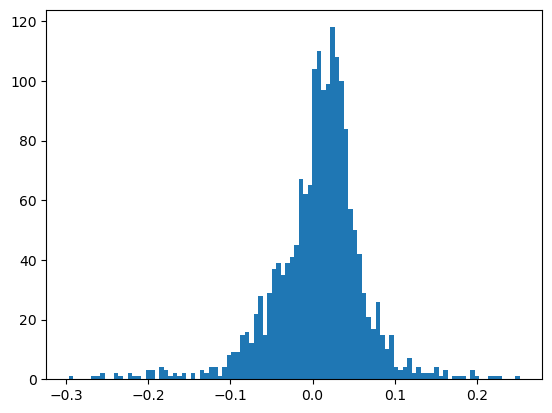

In [58]:
plt.hist(bt_df1.loc[bt_df1["Long/Short"]=="Long","5_Day_Lag"],bins=100)

In [45]:
 bt_df1.loc[bt_df1["Long/Short"]=="Short","5_Day_Lag"].describe()

count    1769.000000
mean       -0.009798
std         0.044891
min        -0.150174
25%        -0.036678
50%        -0.017598
75%         0.010591
max         0.335400
Name: 5_Day_Lag, dtype: float64

(array([  1.,   2.,   1.,   2.,   0.,   1.,   5.,   1.,   3.,   3.,   2.,
          4.,   8.,   6.,   9.,  11.,  12.,  25.,  30.,  44.,  59.,  64.,
        103., 119., 108., 111., 118.,  97., 100.,  85.,  77.,  57.,  50.,
         47.,  53.,  40.,  36.,  44.,  33.,  28.,  24.,  25.,  13.,  20.,
         11.,   8.,   4.,   5.,   8.,   6.,   8.,   5.,   6.,   6.,   2.,
          1.,   3.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([-0.15017419, -0.14531845, -0.1404627 , -0.13560696, -0.13075121,
        -0.12589547, -0.12103973, -0.11618398, -0.11132824, -0.10647249,
        -0.10161675, -0.09676101, -0.09190526, -0.08704952, -0.08219377,
        -0.07733803, -0.07248228, -0.06762654, -0.0627708 , -0.05791505,
        -0.05305931, -0.04

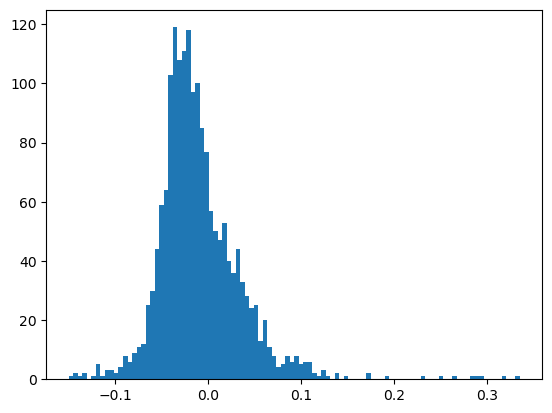

In [59]:
plt.hist(bt_df1.loc[bt_df1["Long/Short"]=="Short","5_Day_Lag"],bins=100)

In [46]:
bt_df1.loc[bt_df1["Long/Short"]=="Sideways","5_Day_Lag"].describe()

count    899.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: 5_Day_Lag, dtype: float64

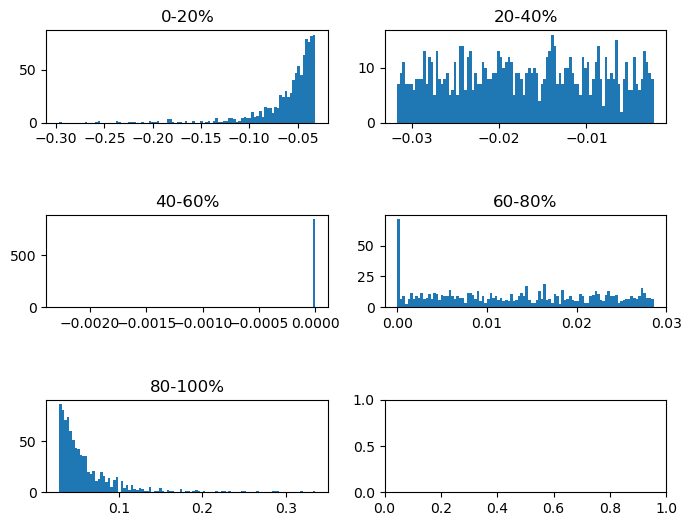

In [47]:
a2 = bt_df1["5_Day_Lag"].sort_values()[:int(0.2 * bt_df1.shape[0])]
b2 = bt_df1["5_Day_Lag"].sort_values()[int(0.2 * bt_df1.shape[0]):int(0.4 * bt_df1.shape[0])]
c2 = bt_df1["5_Day_Lag"].sort_values()[int(0.4 * bt_df1.shape[0]):int(0.6 * bt_df1.shape[0])]
d2 = bt_df1["5_Day_Lag"].sort_values()[int(0.6 * bt_df1.shape[0]):int(0.8 * bt_df1.shape[0])]
e2 = bt_df1["5_Day_Lag"].sort_values()[int(0.8 * bt_df1.shape[0]):]

fig,axis = plt.subplots(3,2,figsize=(8,6))
fig.subplots_adjust(hspace=1)

axis[0,0].hist(a2,bins=100)
axis[0,0].set_title("0-20%")

axis[0,1].hist(b2,bins=100)
axis[0,1].set_title("20-40%")

axis[1,0].hist(c2,bins=100)
axis[1,0].set_title("40-60%")

axis[1,1].hist(d2,bins=100)
axis[1,1].set_title("60-80%")

axis[2,0].hist(e2,bins=100)
axis[2,0].set_title("80-100%")

plt.show()

# Only Long Case:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Making Dataframe with Features and Returns


In [2]:
#Finds Returns with Lags

def long_returns(fgi_sheet="Fear&GreedIndex.xlsx",spxt_sheet="S&P500.xlsx",lags=[0,1,3,5],MA=5,n=22):
    features = pd.read_excel(fgi_sheet)
    spxt = pd.read_excel(spxt_sheet)
    features = pd.DataFrame({'Date' : features["Date"], 
                             'Strength' : features["Strength Score_zscore"], 
                             'Momentum' : features["Momentum Score_zscore"],
                             'Volatility' : features["Volatility Score_zscore"],
                             'Options' : features["Options Score_zscore"],
                             'Safe Haven' : features["Safe Haven Score_zscore"],
                             'Junk Bond Demand' : features["Junk Bond Demand Score_zscore"],
                             'Stock Breadth' : features["Stock Breadth Score_zscore"],
                             'FGI' : features["FGI_zscore"]})
    df = pd.merge(features, spxt, on='Date')
    df["FGI_SMAVG_"+str(MA)] = df["FGI"].rolling(window=MA).mean().shift(-(MA-1))
    for x in lags:
        df[str(x)+"_Day_Lag"] = pd.Series(dtype="float")
        for i in range(n+x,df.shape[0]):
            df.loc[i,[str(x)+"_Day_Lag"]] = (df.loc[i-x-n,"SPXT"] - df.loc[i-x,"SPXT"])/df.loc[i-x,"SPXT"]
    return df

In [3]:
monthly_returns_data = long_returns()

In [4]:
monthly_returns_data.head(30)

Date  Strength  Momentum  Volatility   Options  Safe Haven  \
0  2023-05-05 -0.297908       NaN    0.520142  2.277993         NaN   
1  2023-05-04 -0.744769 -0.542767    0.229314  2.307483    0.098585   
2  2023-05-03 -0.257284 -0.433254    0.414265  2.501379    0.212997   
3  2023-05-02 -0.392697 -0.327976    0.481338  2.582883    0.351287   
4  2023-05-01  0.040624 -0.155624    0.663711  2.510560    0.494603   
5  2023-04-28 -0.108330 -0.142787    0.702763  2.464813    0.646065   
6  2023-04-27 -0.216660 -0.249866    0.582947  2.250751    0.538409   
7  2023-04-26 -0.514568 -0.513590    0.398821  2.056311    0.379930   
8  2023-04-25 -0.230201 -0.454569    0.407213  1.650926    0.488647   
9  2023-04-24 -0.176036 -0.222791    0.603257  1.662029    0.629854   
10 2023-04-21 -0.230201 -0.224319    0.623134  1.454514    0.772615   
11 2023-04-20 -0.135413 -0.224278    0.590020  1.549965    0.908939   
12 2023-04-19 -0.230201 -0.127571    0.668289  1.698159    1.146625   
13 2023-04-18 -0.054165 -0.114452    0.634680  2.077348    0.950485   
14 2023-04-17 -0.243743 -0.113543    0.627670  2.080083    1.060434   
15 2023-04-14 -0.324990 -0.144858    0.618144  2.040141    1.030616   
16 2023-04-13 -0.284367 -0.102613    0.546308  1.761297    0.922784   
17 2023-04-12 -0.311449 -0.273064    0.413461  1.596000    0.971130   
18 2023-04-11 -0.311449 -0.201016    0.413069  1.455400    0.772125   
19 2023-04-10 -0.406238 -0.186814    0.428203  1.625122    1.135482   
20 2023-04-06 -0.352073 -0.187960    0.486018  1.876286    0.937592   
21 2023-04-05 -0.311449 -0.228265    0.416595  2.149082    0.760809   
22 2023-04-04 -0.243743 -0.184803    0.424842  2.421214    0.298453   
23 2023-04-03 -0.162495 -0.094335    0.471647  2.470966    0.204761   
24 2023-03-31 -0.148954 -0.134213    0.458781  2.397367   -0.088878   
25 2023-03-30 -0.324990 -0.320346    0.428162  2.175430   -0.210538   
26 2023-03-29 -0.311449 -0.388014    0.420945  1.956340   -0.009462   
27 2023-03-28 -0.352073 -0.573390    0.335831  1.572777   -0.005478   
28 2023-03-27 -0.352073 -0.543042    0.269624  1.513845   -0.124047   
29 2023-03-24 -0.853100 -0.556619    0.149808  1.391346   -0.164210   

    Junk Bond Demand  Stock Breadth       FGI     SPXT  FGI_SMAVG_5  \
0          -0.163659      -0.392693       NaN  8858.86          NaN   
1          -0.106114      -0.370411  0.124474  8697.68     0.338333   
2          -0.249848      -0.273215  0.273577  8759.95     0.390630   
3           0.008770      -0.203326  0.357183  8821.59     0.379340   
4           0.183557      -0.147736  0.512814  8924.92     0.347787   
5          -0.451015      -0.146195  0.423616  8928.35     0.304106   
6          -0.037989      -0.165858  0.385962  8854.32     0.283168   
7          -0.144116      -0.142898  0.217127  8684.19     0.274731   
8          -0.406043      -0.060065  0.199415  8717.63     0.315859   
9          -0.436861       0.001402  0.294408  8857.30     0.366255   
10         -0.163760       0.000515  0.318928  8849.76     0.400318   
11         -0.289562       0.006783  0.343779  8841.62     0.426446   
12         -0.198013       0.002050  0.422762  8893.60     0.430476   
13         -0.301768      -0.032331  0.451399  8894.35     0.403808   
14         -0.076250      -0.081612  0.464720  8886.76     0.357164   
15          0.078073      -0.150135  0.449570  8857.31     0.325381   
16         -0.086471      -0.209437  0.363929  8875.65     0.299306   
17         -0.057847      -0.312282  0.289421  8758.11     0.281349   
18         -0.210438      -0.390441  0.218179  8794.29     0.271939   
19          0.035618      -0.490730  0.305806  8794.65     0.270417   
20          0.033880      -0.559393  0.319193  8785.70     0.234037   
21         -0.258431      -0.609327  0.274145  8752.54     0.171629   
22         -0.361485      -0.657861  0.242374  8773.31     0.114075   
23         -0.677248      -0.739340  0.210565  8823.66     0.049673   
24         -0.743225      -0.873

In [5]:
monthly_returns_data.to_excel("Historical_Returns_Monthly.xlsx")

In [6]:
monthly_returns_data.describe()

Strength     Momentum   Volatility      Options   Safe Haven  \
count  4453.000000  4452.000000  4453.000000  4453.000000  4452.000000   
mean     -0.062642    -0.266157    -0.116390     0.139813    -0.088667   
std       1.011097     1.003568     1.009239     0.979894     1.012586   
min      -5.105056    -3.689737    -5.779900    -1.888436    -4.506905   
25%      -0.663522    -0.696449    -0.487575    -0.545022    -0.542955   
50%       0.002788    -0.004380     0.026493     0.043409     0.011752   
75%       0.613316     0.426769     0.471460     0.723493     0.506914   
max       2.613464     1.179289     2.294310     3.769771     3.406696   

       Junk Bond Demand  Stock Breadth          FGI          SPXT  \
count       4453.000000    4453.000000  4452.000000   4453.000000   
mean          -0.155202      -0.188611    -0.105483   4060.971653   
std            1.019639       1.003039     0.642974   2350.717613   
min           -3.064962      -2.763283    -3.151997   1095.040000   
25%           -0.540541      -0.780279    -0.385285   2141.810000   
50%            0.033043       0.004742     0.035340   3470.500000   
75%            0.637524       0.536511     0.338987   5503.050000   
max            1.376089       1.704961     1.117101  10050.410000   

       FGI_SMAVG_5    0_Day_Lag    1_Day_Lag    3_Day_Lag    5_Day_Lag  
count  4448.000000  4431.000000  4430.000000  4428.000000  4426.000000  
mean     -0.105483     0.009055     0.009051     0.009046     0.009045  
std       0.631027     0.048873     0.048878     0.048888     0.048899  
min      -2.859302    -0.335400    -0.335400    -0.335400    -0.335400  
25%      -0.393204    -0.012101    -0.012102    -0.012102    -0.012103  
50%       0.038828     0.015757     0.015750     0.015739     0.015750  
75%       0.328339     0.036324     0.036333     0.036347     0.036357  
max       0.986998     0.252339     0.252339     0.252339     0.252339

# Percentile Wise Analysis (FGI Based)

In [10]:
#Finds Percentile wise distribution

def long_data_statistics(df, gap = 20, lag = 5):
    long_df = df.sort_values(by='FGI')
    category_df = pd.DataFrame({'FGI' : long_df['FGI']})
    cumulative_df = pd.DataFrame({'FGI' : long_df['FGI']})
    cumulative_df[">"+str(0)+"%"] = long_df[str(lag)+"_Day_Lag"][0:]
    temp=0
    for x in range(gap,101,gap):
        category_df[str(temp)+"-"+str(x)+"%"] = long_df[str(lag)+"_Day_Lag"][int((temp/100) * long_df.shape[0]):int((x/100) * long_df.shape[0])]
        temp=x
        if(x!=100):
            cumulative_df[">"+str(x)+"%"] = long_df[str(lag)+"_Day_Lag"][int((x/100) * long_df.shape[0]):]
            
    return(category_df,cumulative_df)
        

In [11]:
data = long_data_statistics(monthly_returns_data,20,3) #(gap = 20, lag = 5)
category_data = data[0]
cumulative_data = data[1]

In [12]:
category_data.describe()

FGI       0-20%      20-40%      40-60%      60-80%     80-100%
count  4452.000000  890.000000  891.000000  888.000000  875.000000  884.000000
mean     -0.105483   -0.019337    0.005341    0.009800    0.019276    0.030475
std       0.642974    0.067173    0.041382    0.039964    0.037272    0.036670
min      -3.151997   -0.335400   -0.195047   -0.174405   -0.136616   -0.130077
25%      -0.385285   -0.049350   -0.011807   -0.012202    0.002246    0.014648
50%       0.035340   -0.012038    0.008824    0.015237    0.022278    0.032560
75%       0.338987    0.018499    0.028101    0.033153    0.038922    0.047564
max       1.117101    0.252339    0.152181    0.150111    0.222357    0.226353

In [10]:
#category_data.to_csv("category_data_lag1_daily.csv")

In [11]:
#cumulative_data.to_csv("cumulative_data_lag1_daily.csv")

In [13]:
cumulative_data.describe()

FGI          >0%         >20%         >40%         >60%  \
count  4452.000000  4428.000000  3538.000000  2647.000000  1759.000000   
mean     -0.105483     0.009046     0.016186     0.019837     0.024904   
std       0.642974     0.048888     0.040046     0.038919     0.037382   
min      -3.151997    -0.335400    -0.195047    -0.174405    -0.136616   
25%      -0.385285    -0.012102    -0.002187     0.002246     0.007455   
50%       0.035340     0.015739     0.020419     0.023916     0.027770   
75%       0.338987     0.036347     0.038939     0.040874     0.043194   
max       1.117101     0.252339     0.226353     0.226353     0.226353   

             >80%  
count  884.000000  
mean     0.030475  
std      0.036670  
min     -0.130077  
25%      0.014648  
50%      0.032560  
75%      0.047564  
max      0.226353

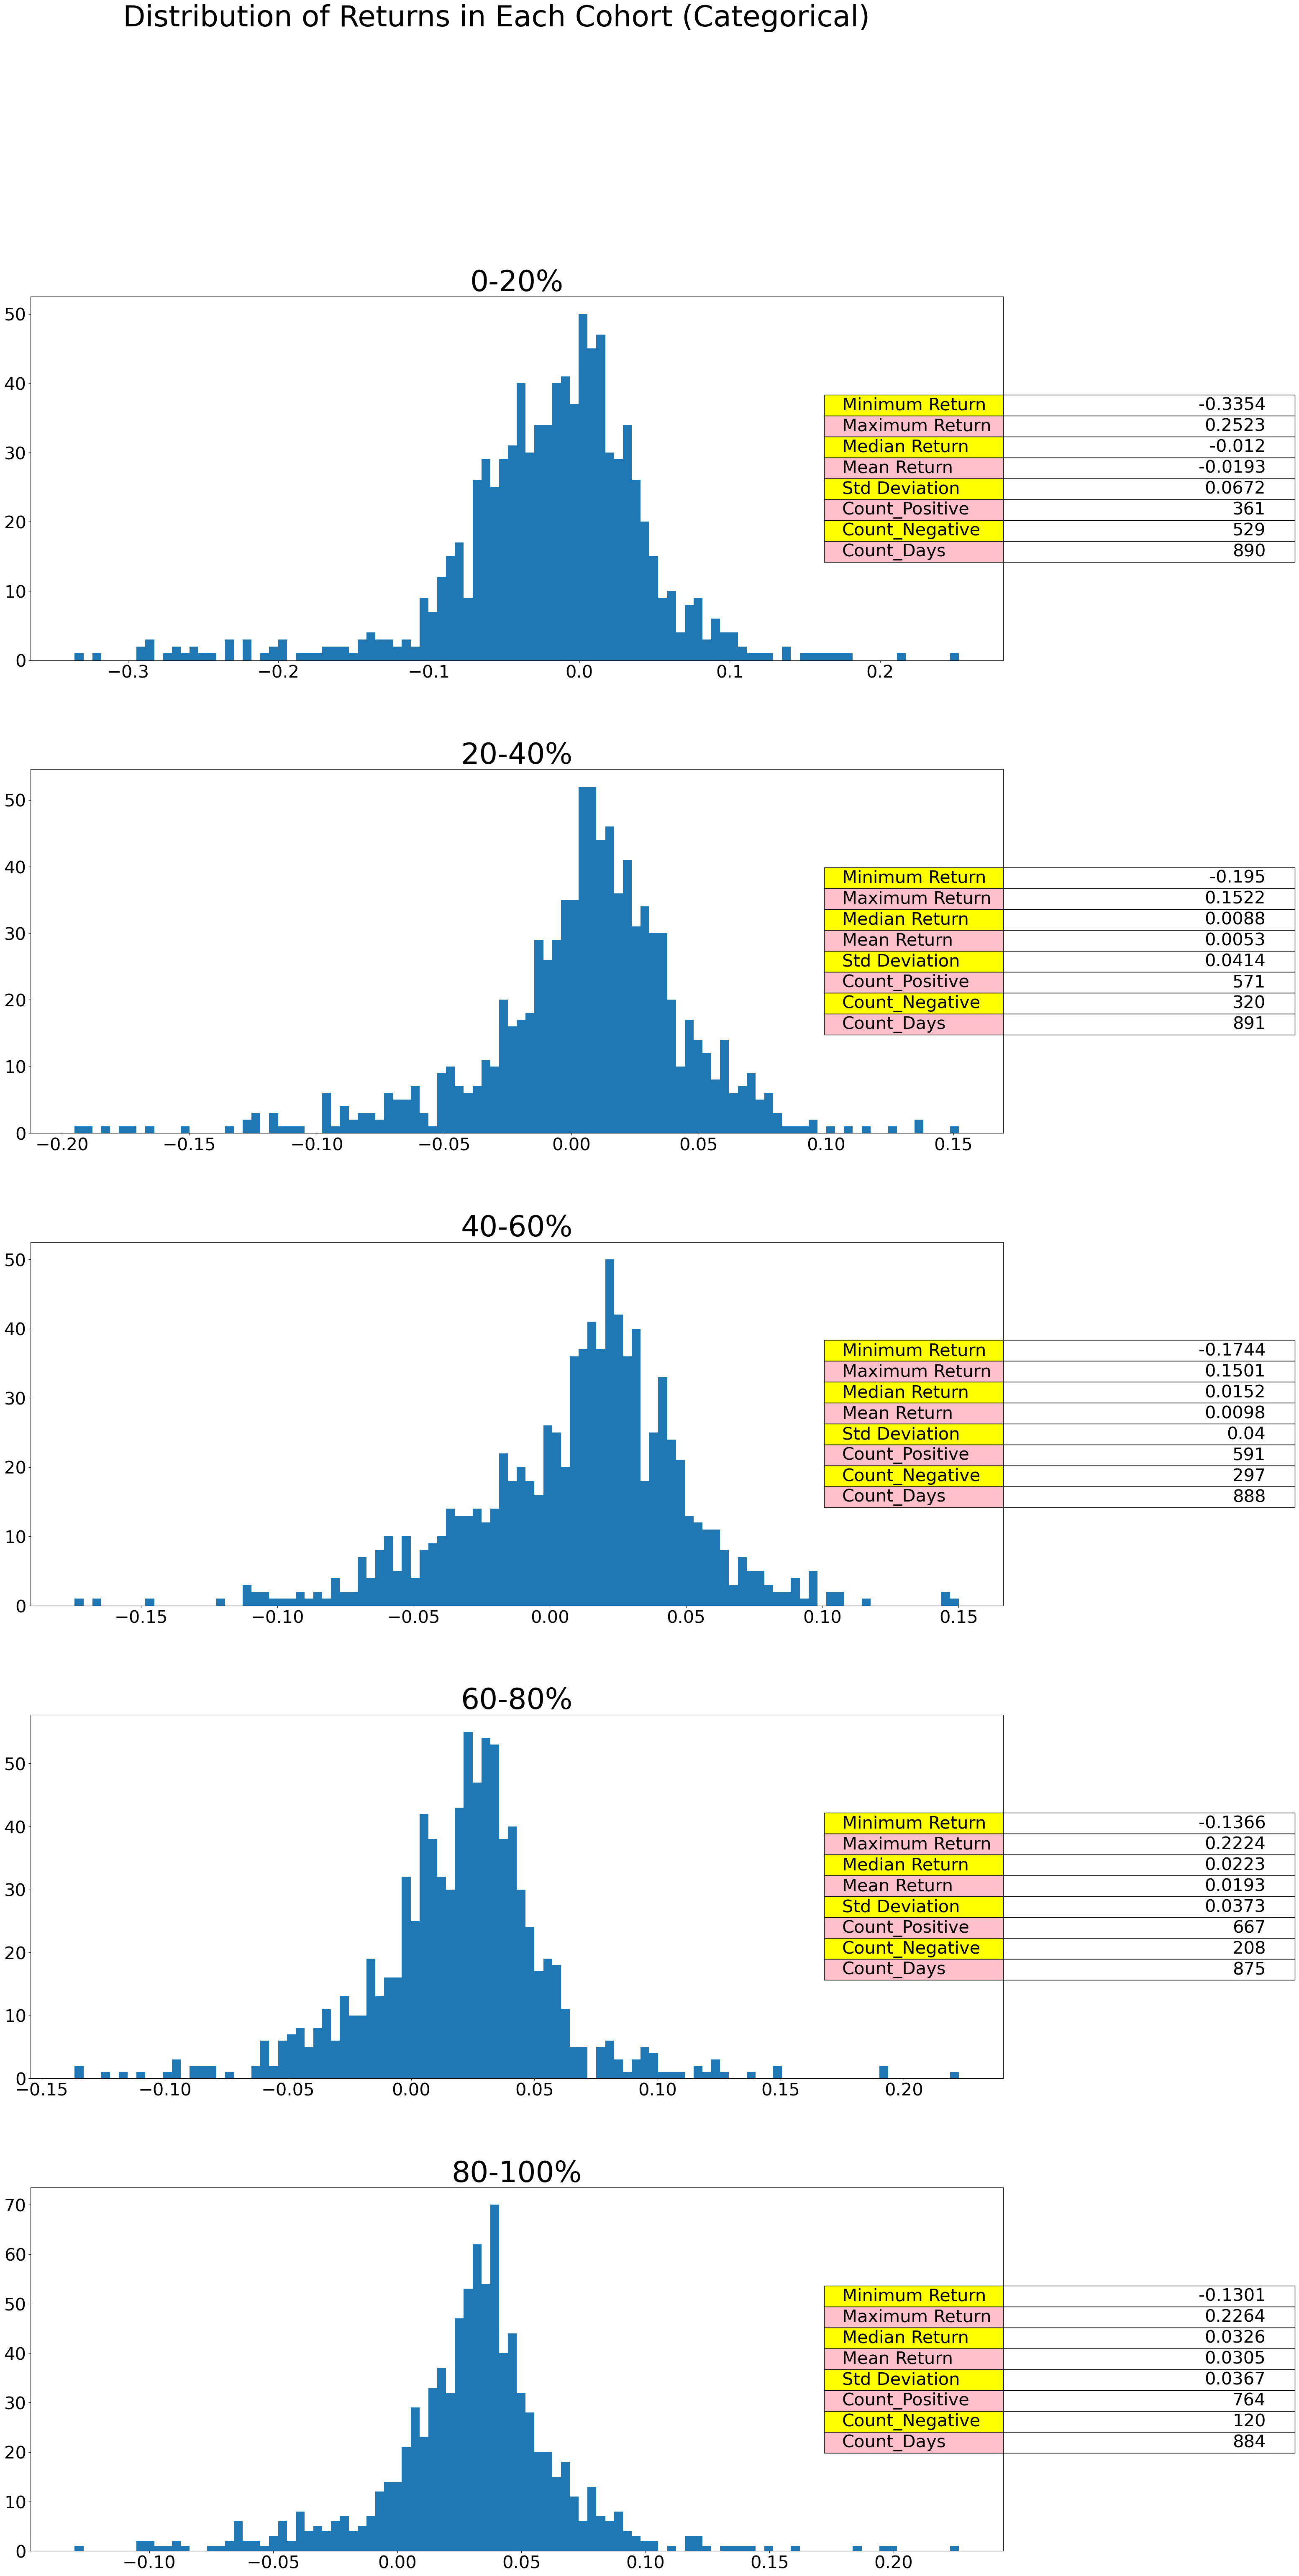

In [14]:
fig, axis = plt.subplots(len(category_data.columns)-1, 1, figsize=(30,70))
fig.subplots_adjust(hspace=0.3)
plt.suptitle("Distribution of Returns in Each Cohort (Categorical) ", fontsize=50)
i = 1
for j in range (0,len(category_data.columns)-1):
    #for k in range(0,1):
        
        axis[j].hist(category_data.iloc[:,i], bins = 100)
        axis[j].set_title(category_data.columns[i], fontsize=50)
        axis[j].tick_params(axis='x', labelsize=30)
        axis[j].tick_params(axis='y', labelsize=30)
        
        row_labels = ['Minimum Return','Maximum Return','Median Return',
                      'Mean Return','Std Deviation','Count_Positive','Count_Negative','Count_Days']
        
        data = [[round(category_data.iloc[:,i].min(),4)],
                [round(category_data.iloc[:,i].max(),4)],
                [round(category_data.iloc[:,i].median(),4)],
                [round(category_data.iloc[:,i].mean(),4)],
                [round(category_data.iloc[:,i].std(),4)],
                [category_data[category_data.iloc[:,i]>0].count()[i]],
                [category_data[category_data.iloc[:,i]<0].count()[i]],
                [category_data.iloc[:,i].count()]]
        
        table = axis[j].table(cellText=data,
                     colWidths=[0.1] * 4,
                     rowLabels=row_labels,
                     colLabels=None,
                     rowColours = ['yellow','pink']*4,
                     loc='right')
        table.auto_set_column_width(col=2)
        #table.auto_set_font_size()
        table.set_fontsize(30)
        table.scale(3, 3)
        
        i = i+1
        
plt.show()

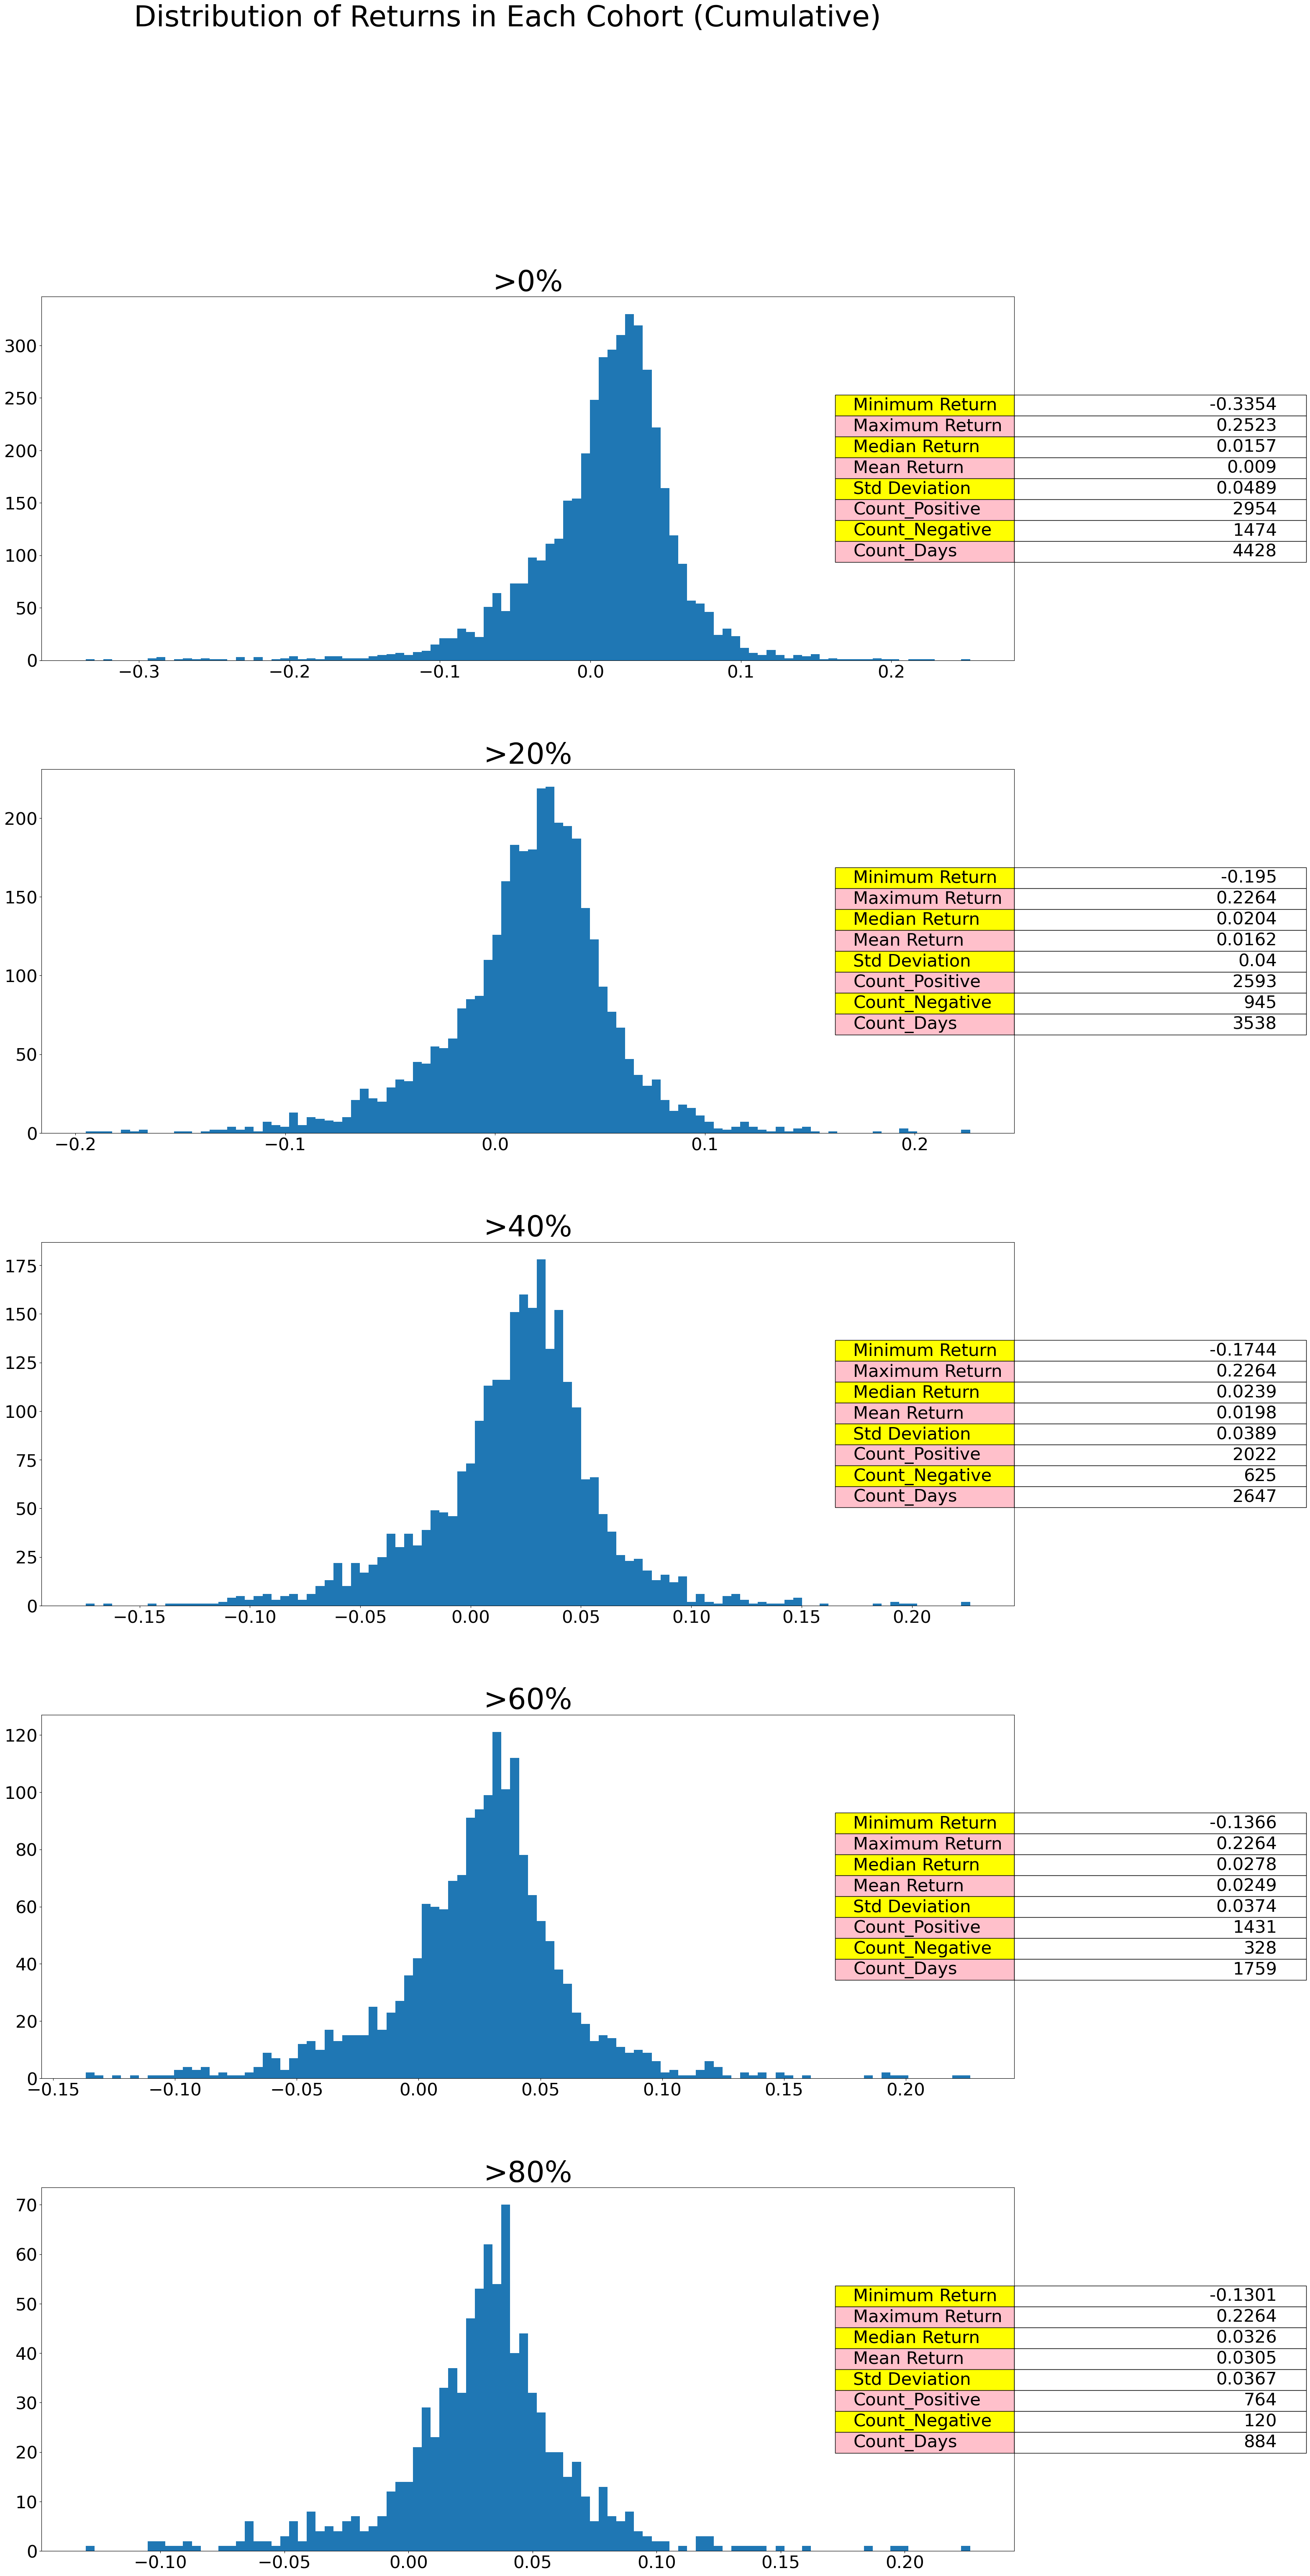

In [15]:
fig, axis = plt.subplots(len(cumulative_data.columns)-1, 1, figsize=(30,70))
fig.subplots_adjust(hspace=0.3)
plt.suptitle("Distribution of Returns in Each Cohort (Cumulative) ", fontsize=50)
i = 1
for j in range (0,len(cumulative_data.columns)-1):
    #for k in range(0,1):
        
        axis[j].hist(cumulative_data.iloc[:,i], bins = 100)
        axis[j].set_title(cumulative_data.columns[i], fontsize=50)
        axis[j].tick_params(axis='x', labelsize=30)
        axis[j].tick_params(axis='y', labelsize=30)
        
        row_labels = ['Minimum Return','Maximum Return','Median Return',
                      'Mean Return','Std Deviation','Count_Positive','Count_Negative','Count_Days']
        
        data = [[round(cumulative_data.iloc[:,i].min(),4)],
                [round(cumulative_data.iloc[:,i].max(),4)],
                [round(cumulative_data.iloc[:,i].median(),4)],
                [round(cumulative_data.iloc[:,i].mean(),4)],
                [round(cumulative_data.iloc[:,i].std(),4)],
                [cumulative_data[cumulative_data.iloc[:,i]>0].count()[i]],
                [cumulative_data[cumulative_data.iloc[:,i]<0].count()[i]],
                [cumulative_data.iloc[:,i].count()]]
        
        table = axis[j].table(cellText=data,
                     colWidths=[0.1] * 4,
                     rowLabels=row_labels,
                     colLabels=None,
                     rowColours = ['yellow','pink']*4,
                     loc='right')
        table.auto_set_column_width(col=2)
        #table.auto_set_font_size()
        table.set_fontsize(30)
        table.scale(3, 3)
        
        i = i+1
        
plt.show()

In [16]:
monthly_returns_data["FGI"].quantile(0.2)

-0.5206365179496859

In [17]:
monthly_returns_data.describe()

Strength     Momentum   Volatility      Options   Safe Haven  \
count  4453.000000  4452.000000  4453.000000  4453.000000  4452.000000   
mean     -0.062642    -0.266157    -0.116390     0.139813    -0.088667   
std       1.011097     1.003568     1.009239     0.979894     1.012586   
min      -5.105056    -3.689737    -5.779900    -1.888436    -4.506905   
25%      -0.663522    -0.696449    -0.487575    -0.545022    -0.542955   
50%       0.002788    -0.004380     0.026493     0.043409     0.011752   
75%       0.613316     0.426769     0.471460     0.723493     0.506914   
max       2.613464     1.179289     2.294310     3.769771     3.406696   

       Junk Bond Demand  Stock Breadth          FGI          SPXT  \
count       4453.000000    4453.000000  4452.000000   4453.000000   
mean          -0.155202      -0.188611    -0.105483   4060.971653   
std            1.019639       1.003039     0.642974   2350.717613   
min           -3.064962      -2.763283    -3.151997   1095.040000   
25%           -0.540541      -0.780279    -0.385285   2141.810000   
50%            0.033043       0.004742     0.035340   3470.500000   
75%            0.637524       0.536511     0.338987   5503.050000   
max            1.376089       1.704961     1.117101  10050.410000   

       FGI_SMAVG_5    0_Day_Lag    1_Day_Lag    3_Day_Lag    5_Day_Lag  
count  4448.000000  4431.000000  4430.000000  4428.000000  4426.000000  
mean     -0.105483     0.009055     0.009051     0.009046     0.009045  
std       0.631027     0.048873     0.048878     0.048888     0.048899  
min      -2.859302    -0.335400    -0.335400    -0.335400    -0.335400  
25%      -0.393204    -0.012101    -0.012102    -0.012102    -0.012103  
50%       0.038828     0.015757     0.015750     0.015739     0.015750  
75%       0.328339     0.036324     0.036333     0.036347     0.036357  
max       0.986998     0.252339     0.252339     0.252339     0.252339

# Percentile Wise Analysis (Returns Based)

In [18]:
def return_based_feature_distribution(feature, df = monthly_returns_data, lag = 3, low = 25, high = 75):
    df = df.sort_values(by=str(lag)+"_Day_Lag")
    df_low = df.iloc[:int((low/100)*df.shape[0])]
    df_mid = df.iloc[int((low/100)*df.shape[0]) : int((high/100)*df.shape[0])]
    df_high = df.iloc[int((high/100)*df.shape[0]):]
    
    fig, axis = plt.subplots(3, 1, figsize=(30,40))
    fig.subplots_adjust(hspace=0.3)
    plt.suptitle("Distribution of "+feature+" in Each Cohort of Returns ", fontsize=50)
    

    axis[0].hist(df_low.loc[:,feature], bins = 100)
    axis[0].set_title("Distribution for 0 - " + str(low)+" % Returns", fontsize=50)
    axis[0].tick_params(axis='x', labelsize=30)
    axis[0].tick_params(axis='y', labelsize=30)

    row_labels = ['Minimum','Maximum','Median',
                  'Mean','Std Deviation','Days > Median','Days < Median','Count_Days']

    data = [[round(df_low.loc[:,feature].min(),4)],
            [round(df_low.loc[:,feature].max(),4)],
            [round(df_low.loc[:,feature].median(),4)],
            [round(df_low.loc[:,feature].mean(),4)],
            [round(df_low.loc[:,feature].std(),4)],
            [df_low.loc[df_low[feature]>df.loc[:,feature].median(),feature].count()],
            [df_low.loc[df_low[feature]<df.loc[:,feature].median(),feature].count()],
            [df_low.loc[:,feature].count()]]

    table = axis[0].table(cellText=data,
                 colWidths=[0.1] * 4,
                 rowLabels=row_labels,
                 colLabels=None,
                 rowColours = ['yellow','pink']*4,
                 loc='right')
    table.auto_set_column_width(col=2)
    #table.auto_set_font_size()
    table.set_fontsize(30)
    table.scale(3, 3)
    
    
    
    axis[1].hist(df_low.loc[:,feature], bins = 100)
    axis[1].set_title("Distribution for " + str(low)+" - "+str(high)+" % Returns", fontsize=50)
    axis[1].tick_params(axis='x', labelsize=30)
    axis[1].tick_params(axis='y', labelsize=30)

    row_labels = ['Minimum','Maximum','Median',
                  'Mean','Std Deviation','Days > Median','Days < Median','Count_Days']

    data = [[round(df_mid.loc[:,feature].min(),4)],
            [round(df_mid.loc[:,feature].max(),4)],
            [round(df_mid.loc[:,feature].median(),4)],
            [round(df_mid.loc[:,feature].mean(),4)],
            [round(df_mid.loc[:,feature].std(),4)],
            [df_mid.loc[df_mid[feature]>df.loc[:,feature].median(),feature].count()],
            [df_mid.loc[df_mid[feature]<df.loc[:,feature].median(),feature].count()],
            [df_mid.loc[:,feature].count()]]

    table = axis[1].table(cellText=data,
                 colWidths=[0.1] * 4,
                 rowLabels=row_labels,
                 colLabels=None,
                 rowColours = ['yellow','pink']*4,
                 loc='right')
    table.auto_set_column_width(col=2)
    #table.auto_set_font_size()
    table.set_fontsize(30)
    table.scale(3, 3)
    
    
    
    
    axis[2].hist(df_low.loc[:,feature], bins = 100)
    axis[2].set_title("Distribution for " + str(high)+" - 100 % Returns", fontsize=50)
    axis[2].tick_params(axis='x', labelsize=30)
    axis[2].tick_params(axis='y', labelsize=30)

    row_labels = ['Minimum','Maximum','Median',
                  'Mean','Std Deviation','Days > Median','Days < Median','Count_Days']

    data = [[round(df_high.loc[:,feature].min(),4)],
            [round(df_high.loc[:,feature].max(),4)],
            [round(df_high.loc[:,feature].median(),4)],
            [round(df_high.loc[:,feature].mean(),4)],
            [round(df_high.loc[:,feature].std(),4)],
            [df_high.loc[df_high[feature]>df.loc[:,feature].median(),feature].count()],
            [df_high.loc[df_high[feature]<df.loc[:,feature].median(),feature].count()],
            [df_high.loc[:,feature].count()]]

    table = axis[2].table(cellText=data,
                 colWidths=[0.1] * 4,
                 rowLabels=row_labels,
                 colLabels=None,
                 rowColours = ['yellow','pink']*4,
                 loc='right')
    table.auto_set_column_width(col=2)
    #table.auto_set_font_size()
    table.set_fontsize(30)
    table.scale(3, 3)



            

    plt.show()

In [19]:
monthly_returns_data.describe() 

Strength     Momentum   Volatility      Options   Safe Haven  \
count  4453.000000  4452.000000  4453.000000  4453.000000  4452.000000   
mean     -0.062642    -0.266157    -0.116390     0.139813    -0.088667   
std       1.011097     1.003568     1.009239     0.979894     1.012586   
min      -5.105056    -3.689737    -5.779900    -1.888436    -4.506905   
25%      -0.663522    -0.696449    -0.487575    -0.545022    -0.542955   
50%       0.002788    -0.004380     0.026493     0.043409     0.011752   
75%       0.613316     0.426769     0.471460     0.723493     0.506914   
max       2.613464     1.179289     2.294310     3.769771     3.406696   

       Junk Bond Demand  Stock Breadth          FGI          SPXT  \
count       4453.000000    4453.000000  4452.000000   4453.000000   
mean          -0.155202      -0.188611    -0.105483   4060.971653   
std            1.019639       1.003039     0.642974   2350.717613   
min           -3.064962      -2.763283    -3.151997   1095.040000   
25%           -0.540541      -0.780279    -0.385285   2141.810000   
50%            0.033043       0.004742     0.035340   3470.500000   
75%            0.637524       0.536511     0.338987   5503.050000   
max            1.376089       1.704961     1.117101  10050.410000   

       FGI_SMAVG_5    0_Day_Lag    1_Day_Lag    3_Day_Lag    5_Day_Lag  
count  4448.000000  4431.000000  4430.000000  4428.000000  4426.000000  
mean     -0.105483     0.009055     0.009051     0.009046     0.009045  
std       0.631027     0.048873     0.048878     0.048888     0.048899  
min      -2.859302    -0.335400    -0.335400    -0.335400    -0.335400  
25%      -0.393204    -0.012101    -0.012102    -0.012102    -0.012103  
50%       0.038828     0.015757     0.015750     0.015739     0.015750  
75%       0.328339     0.036324     0.036333     0.036347     0.036357  
max       0.986998     0.252339     0.252339     0.252339     0.252339

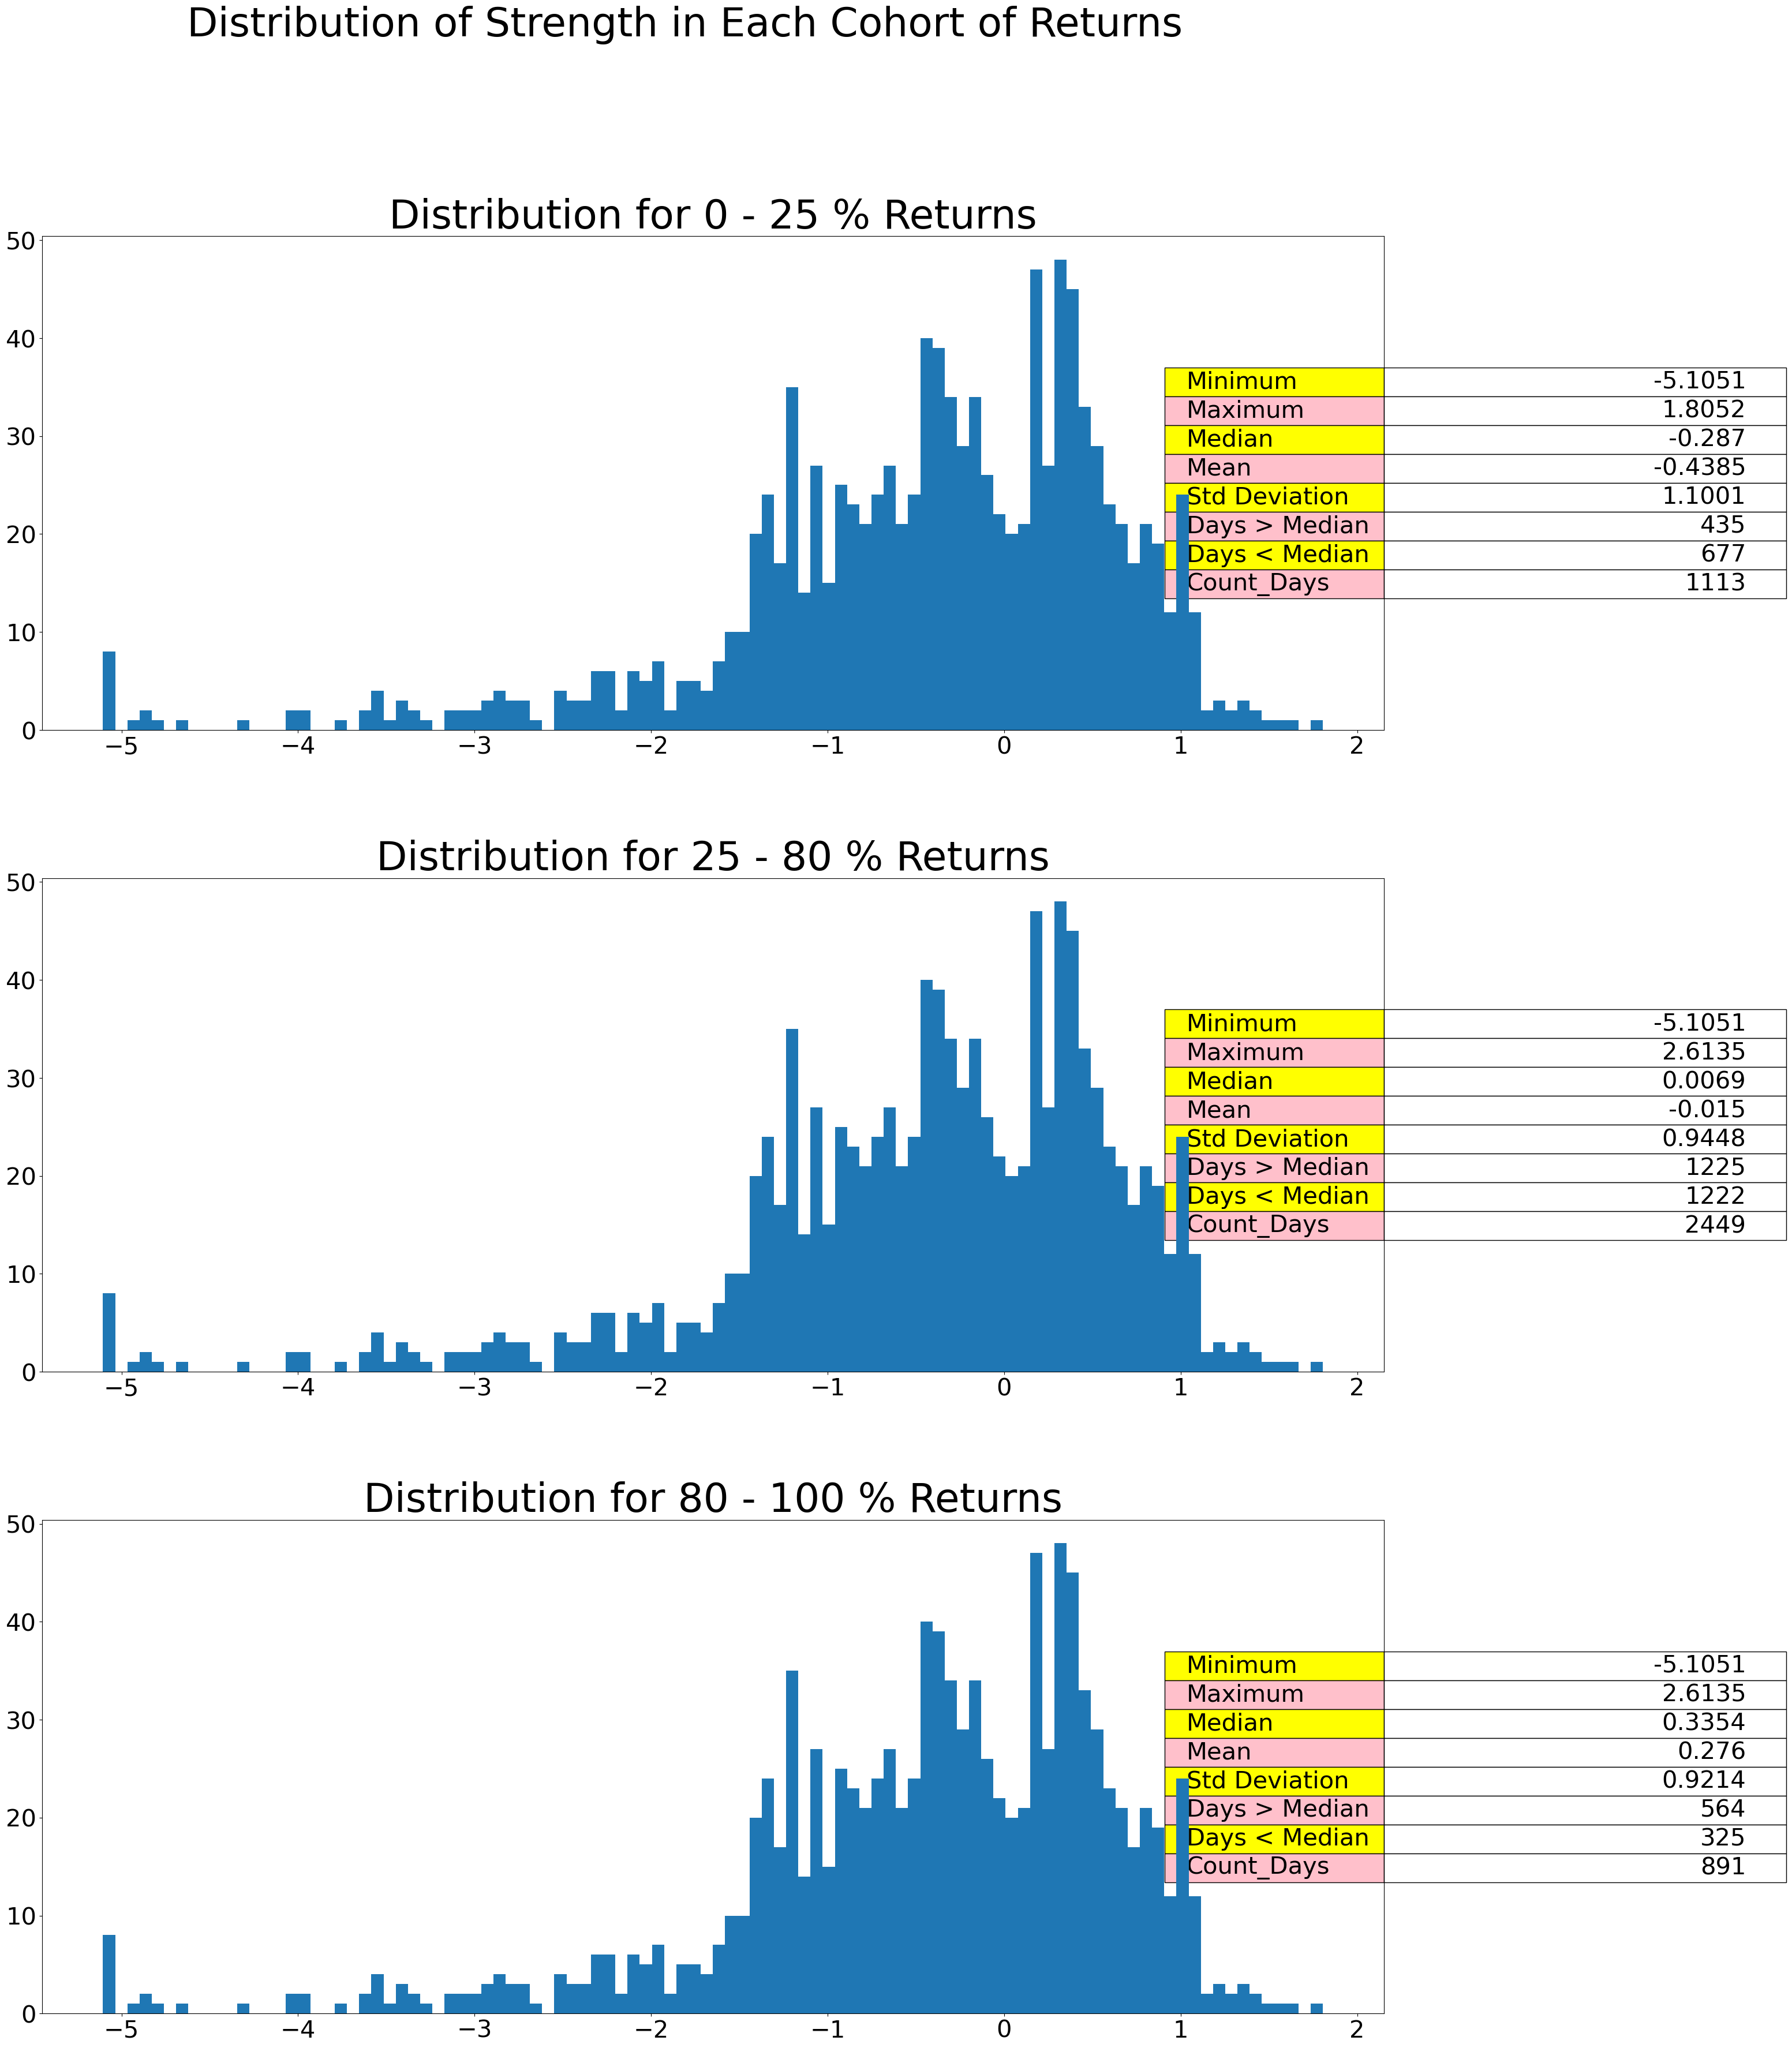

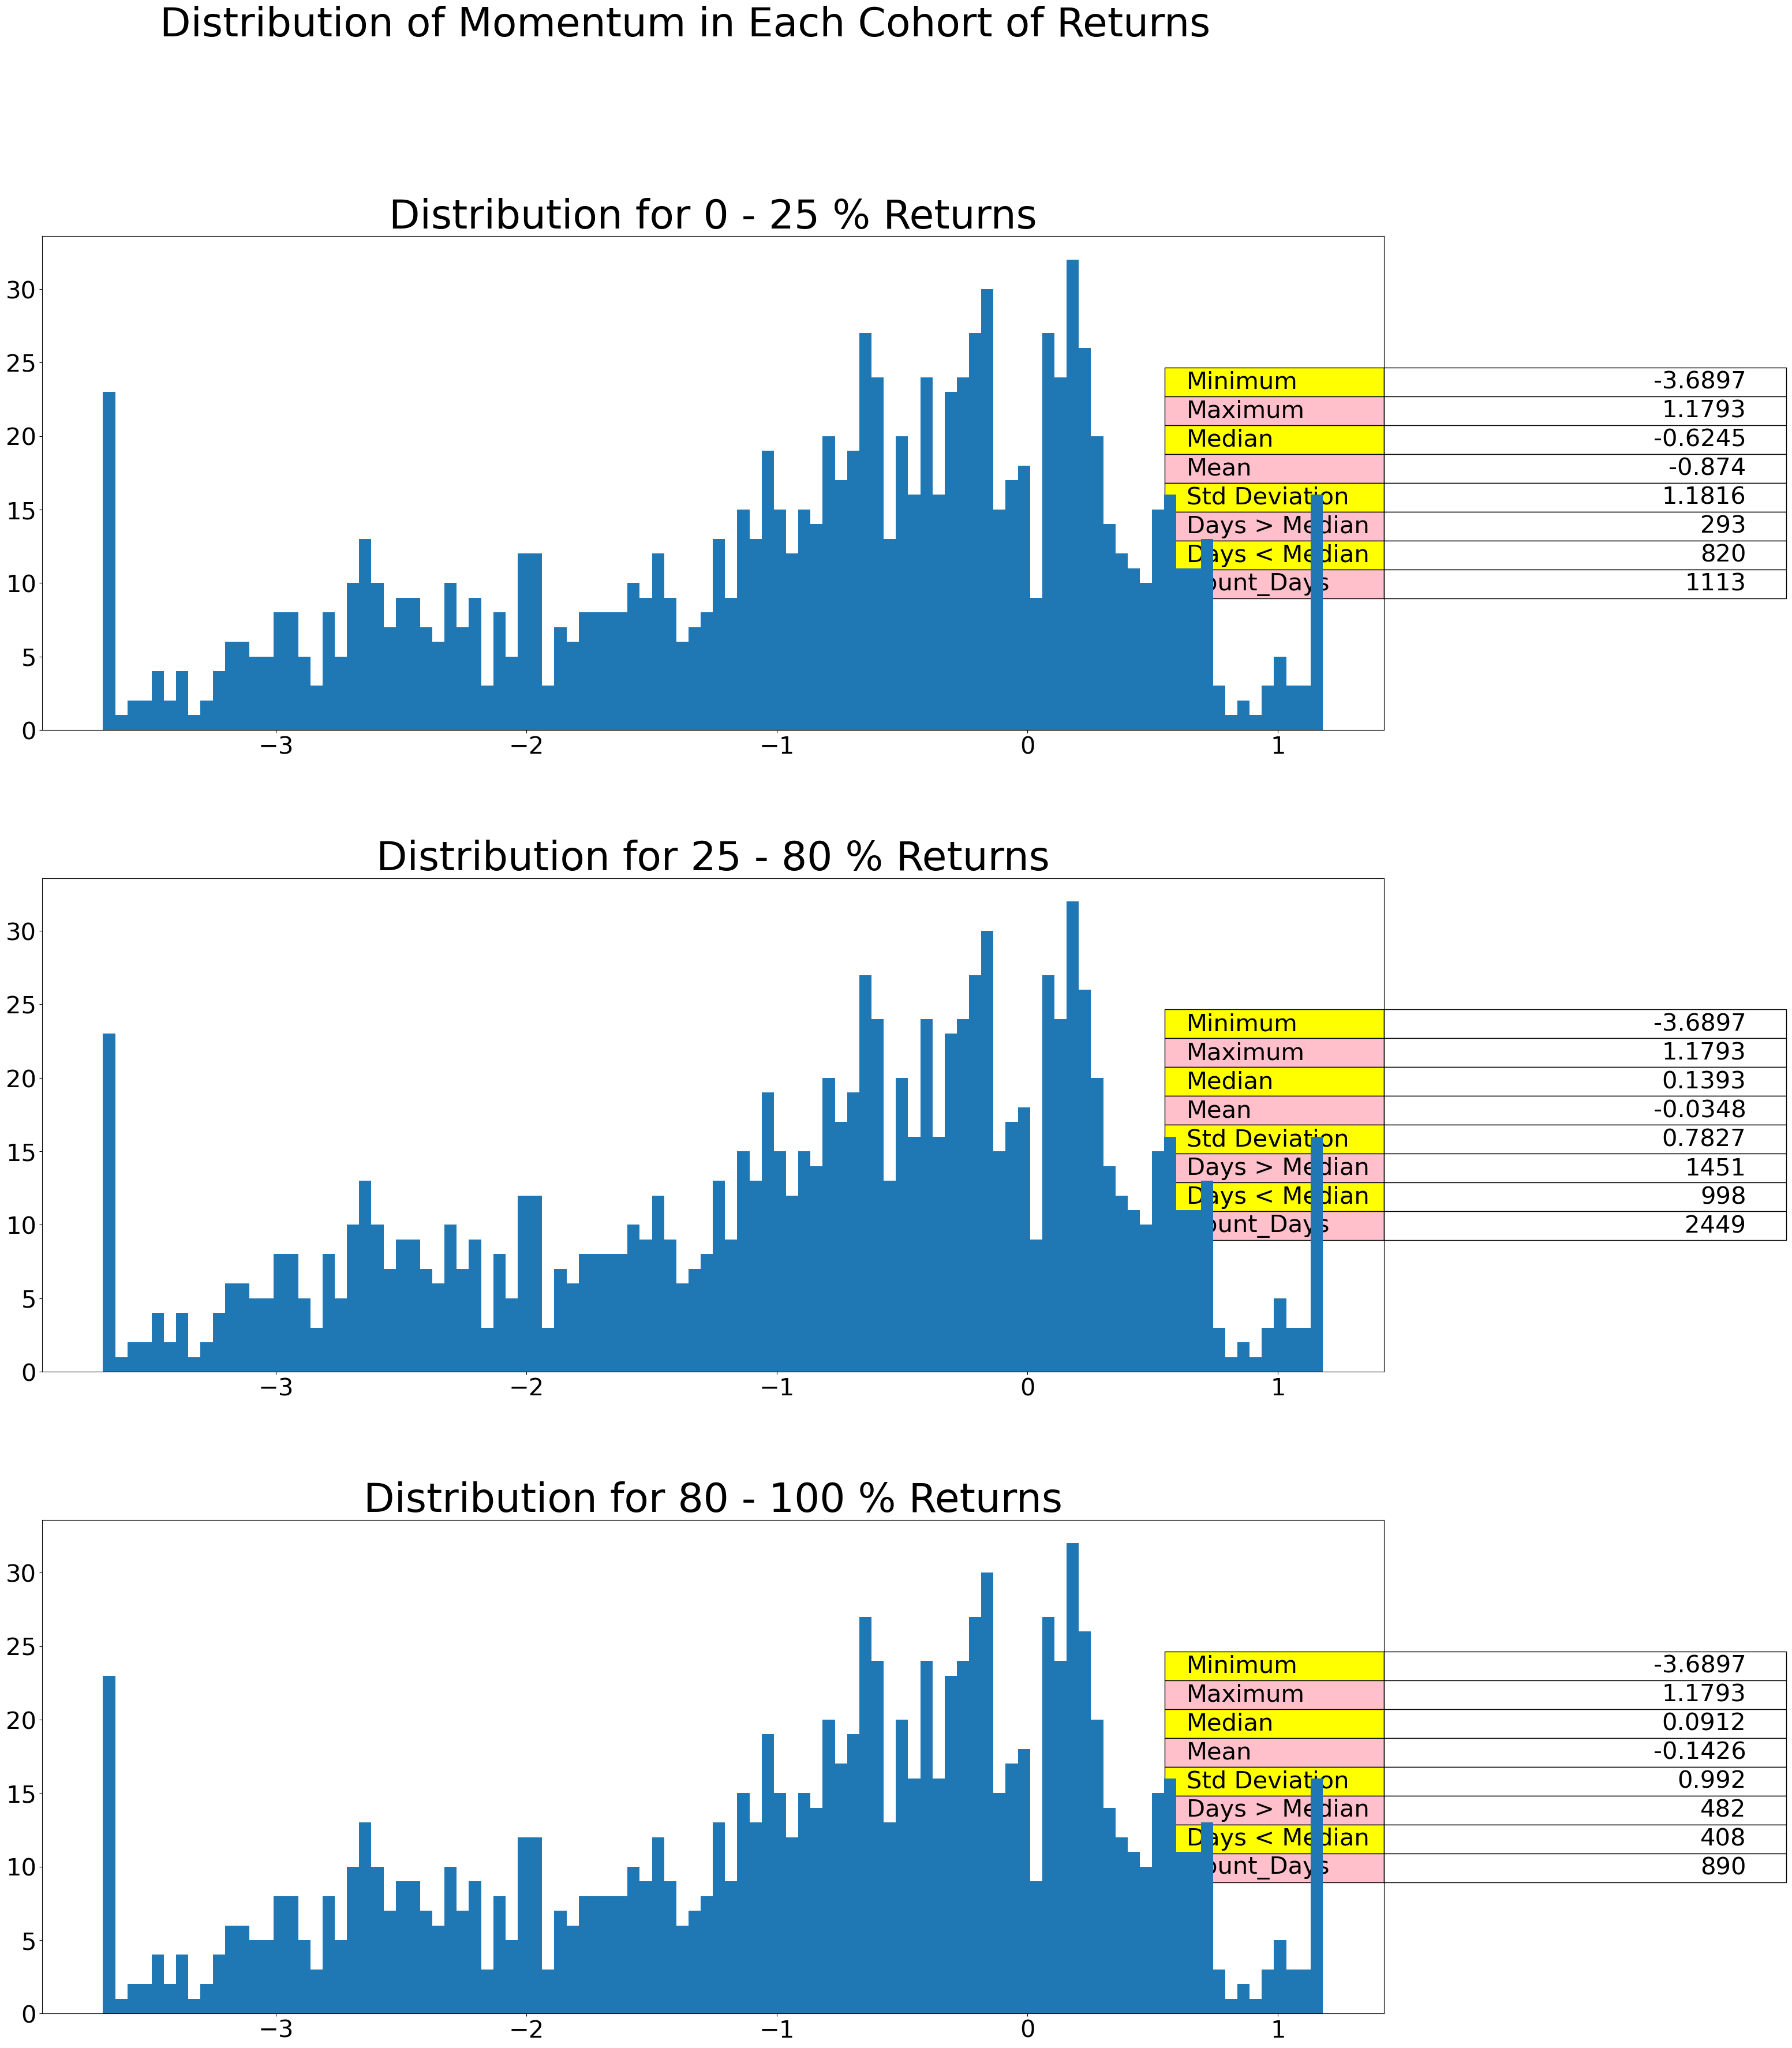

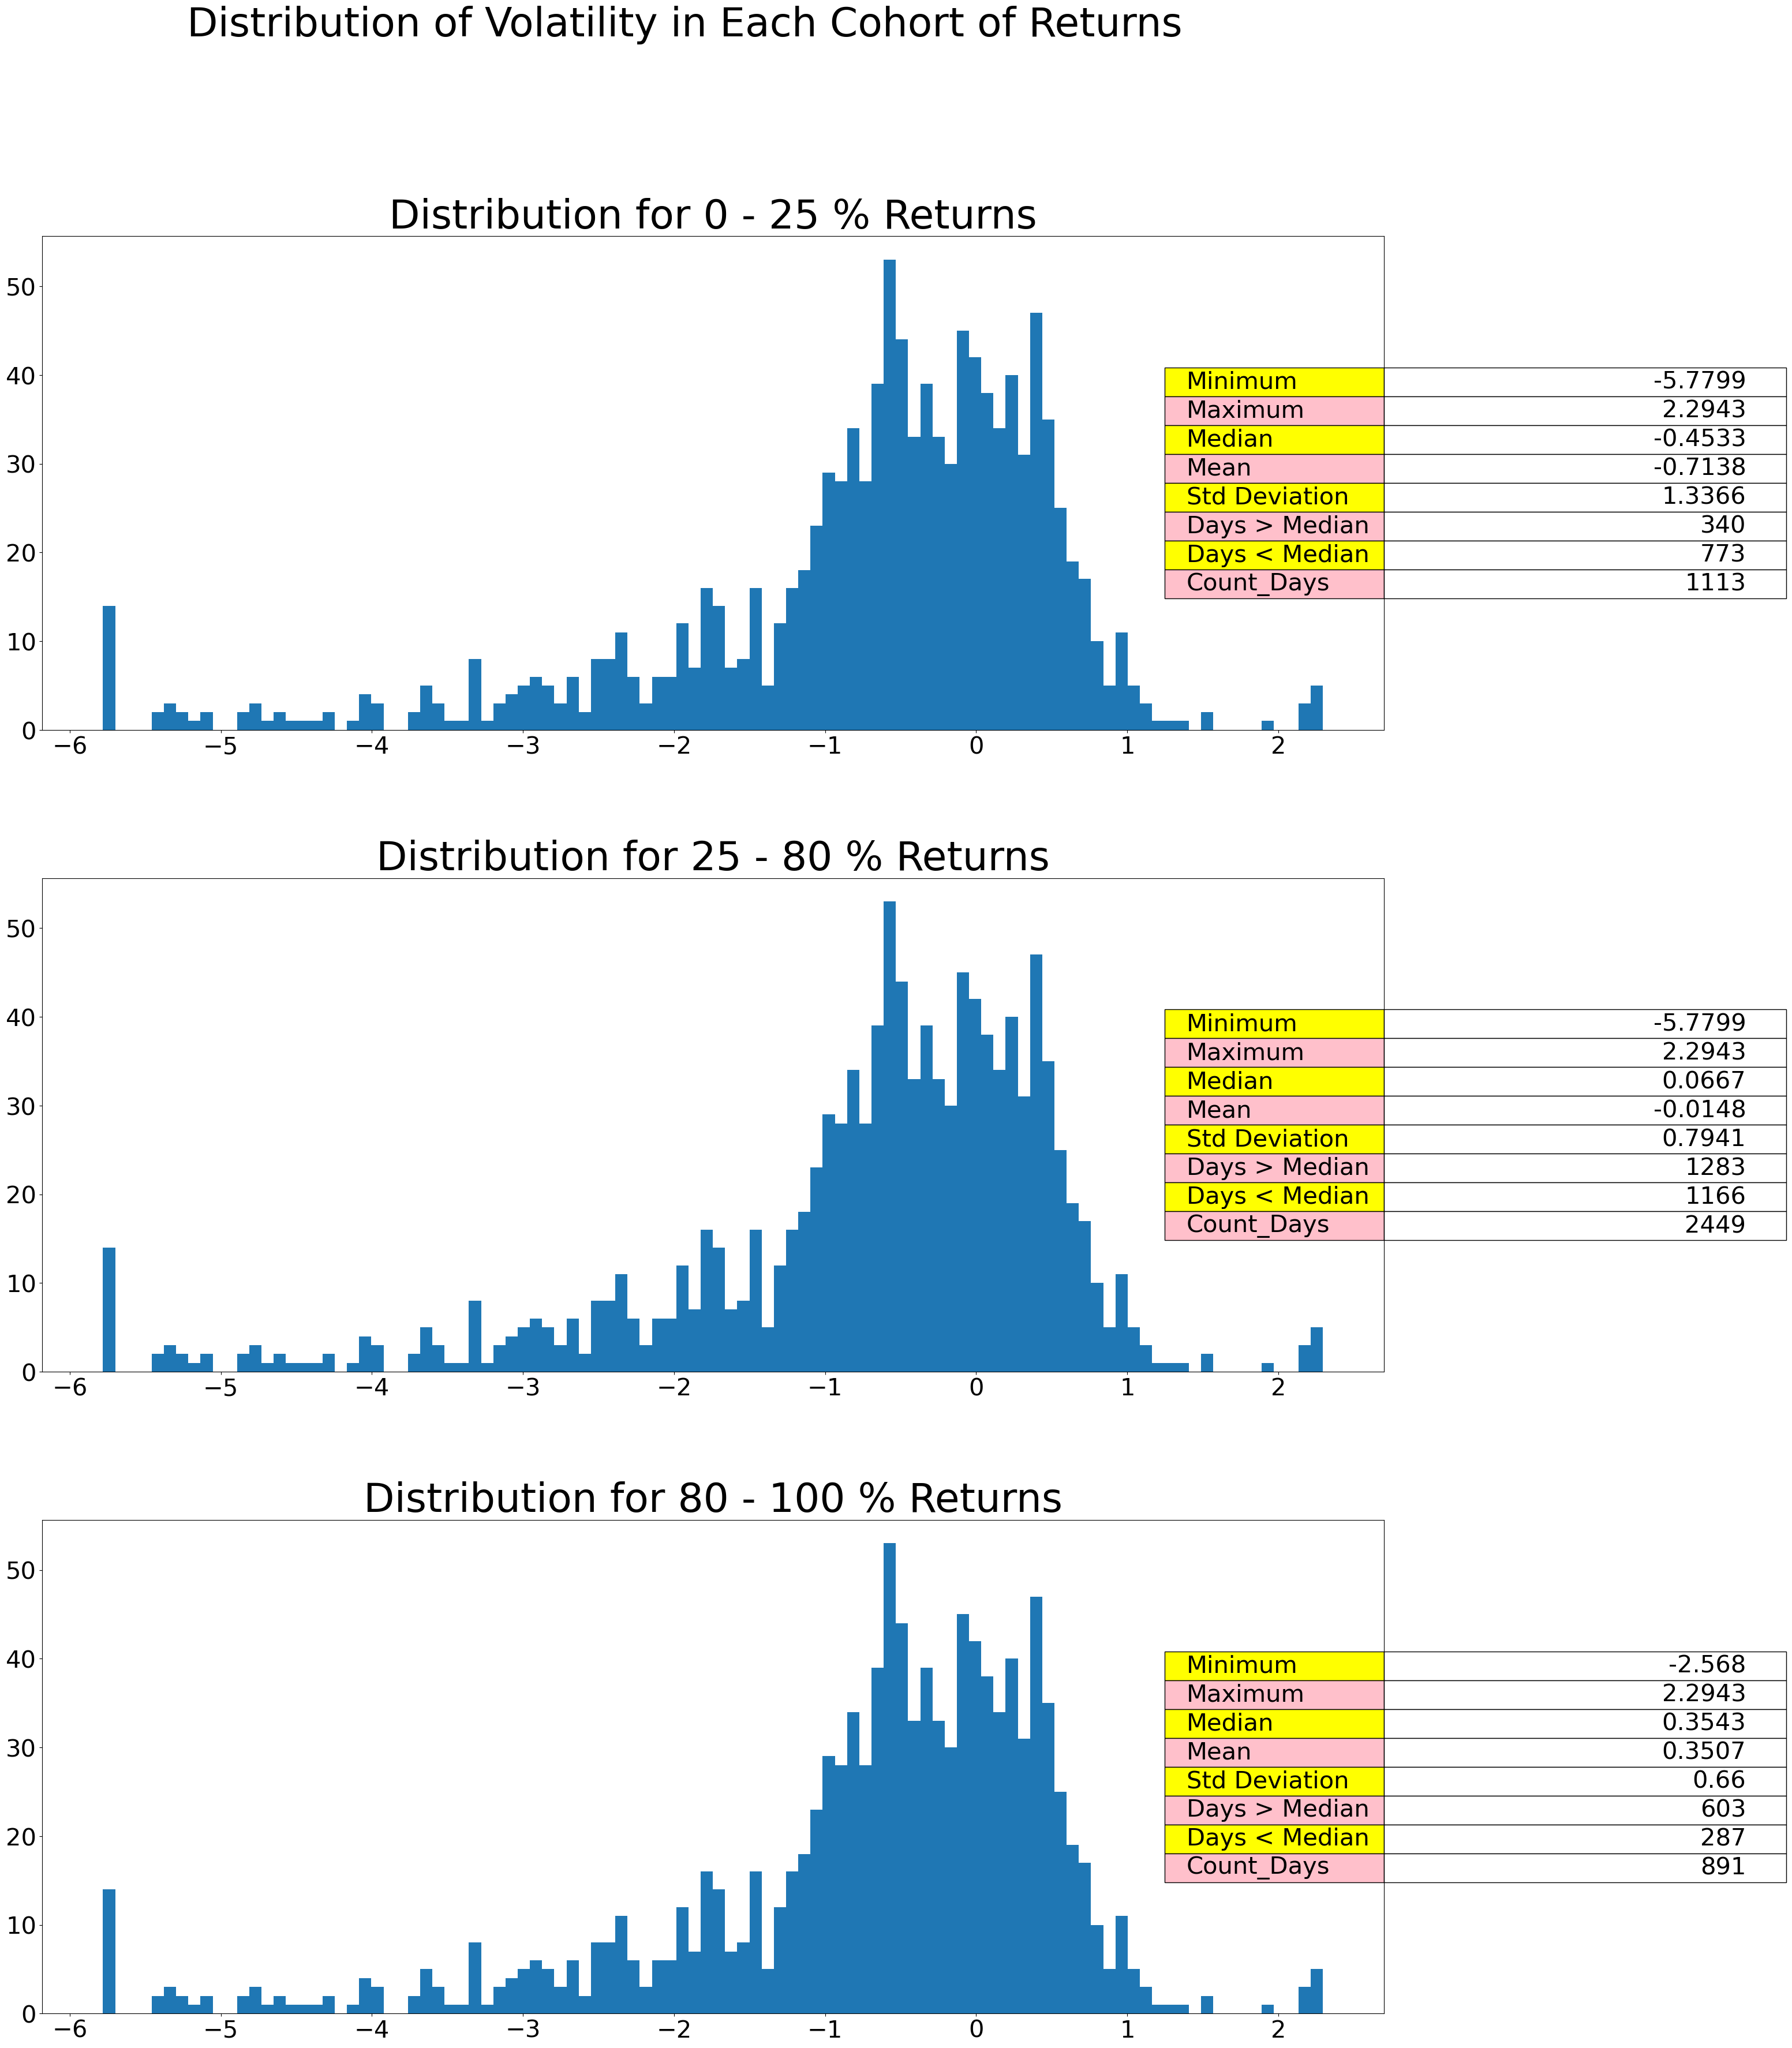

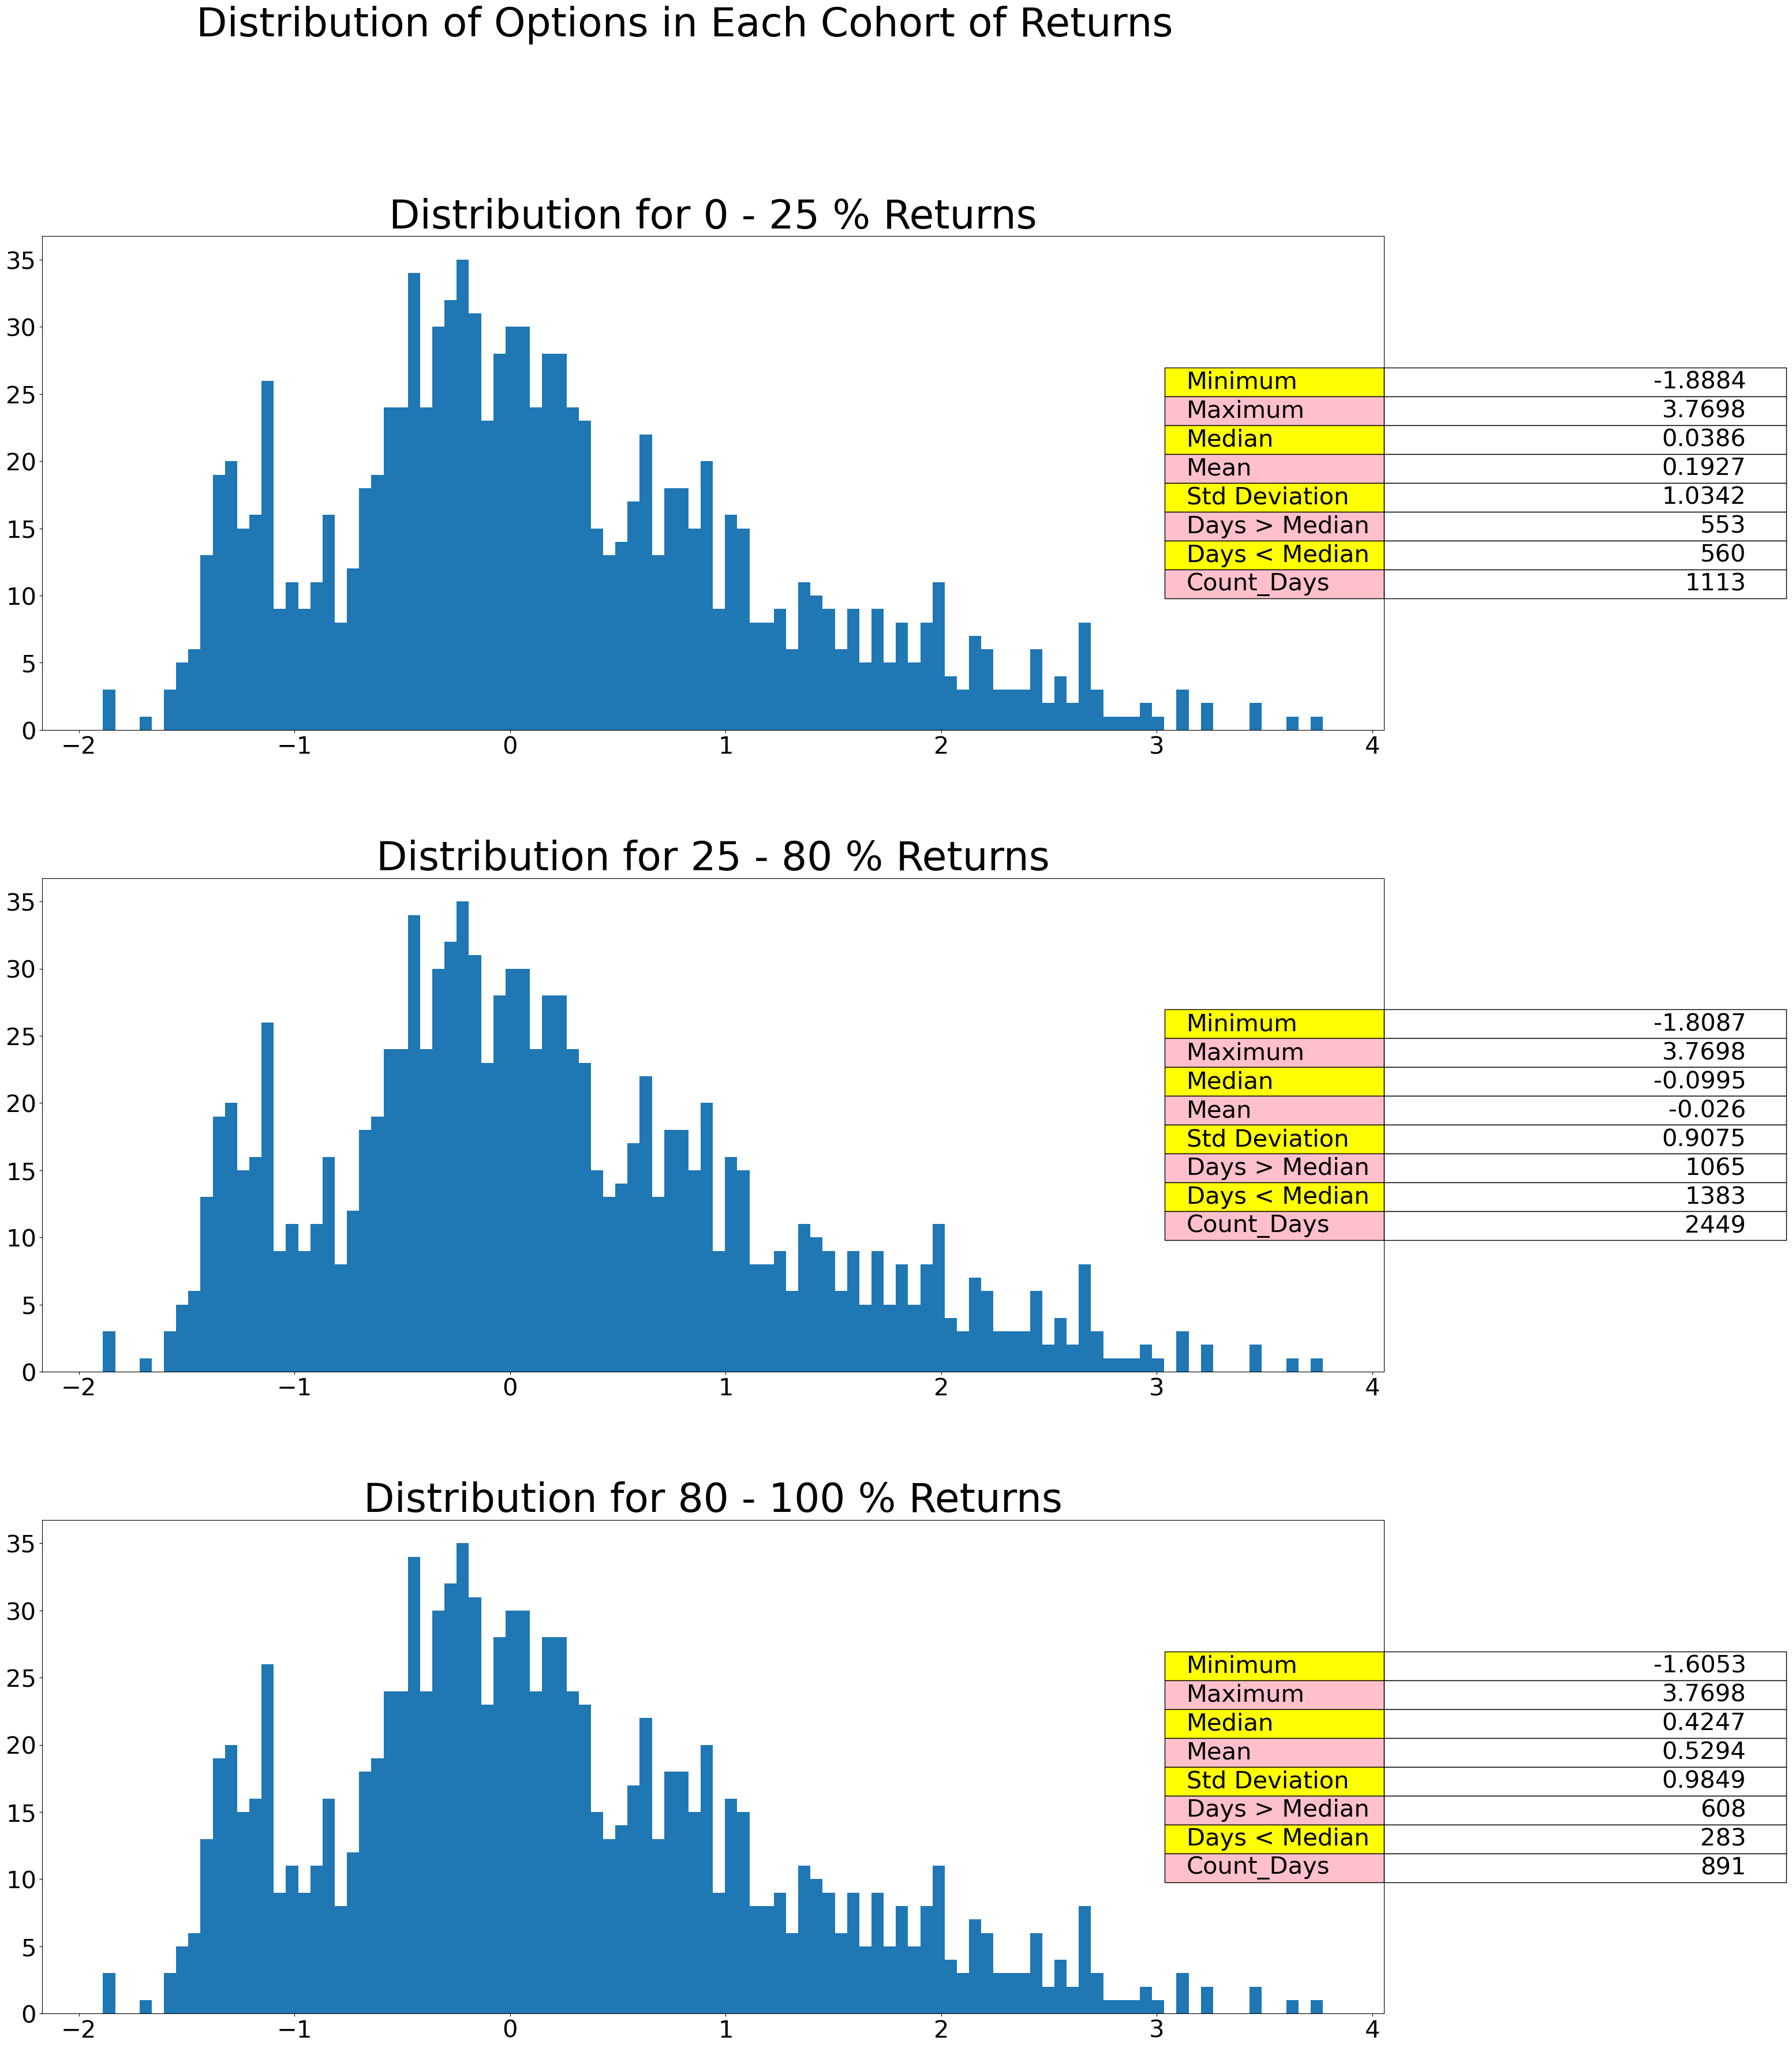

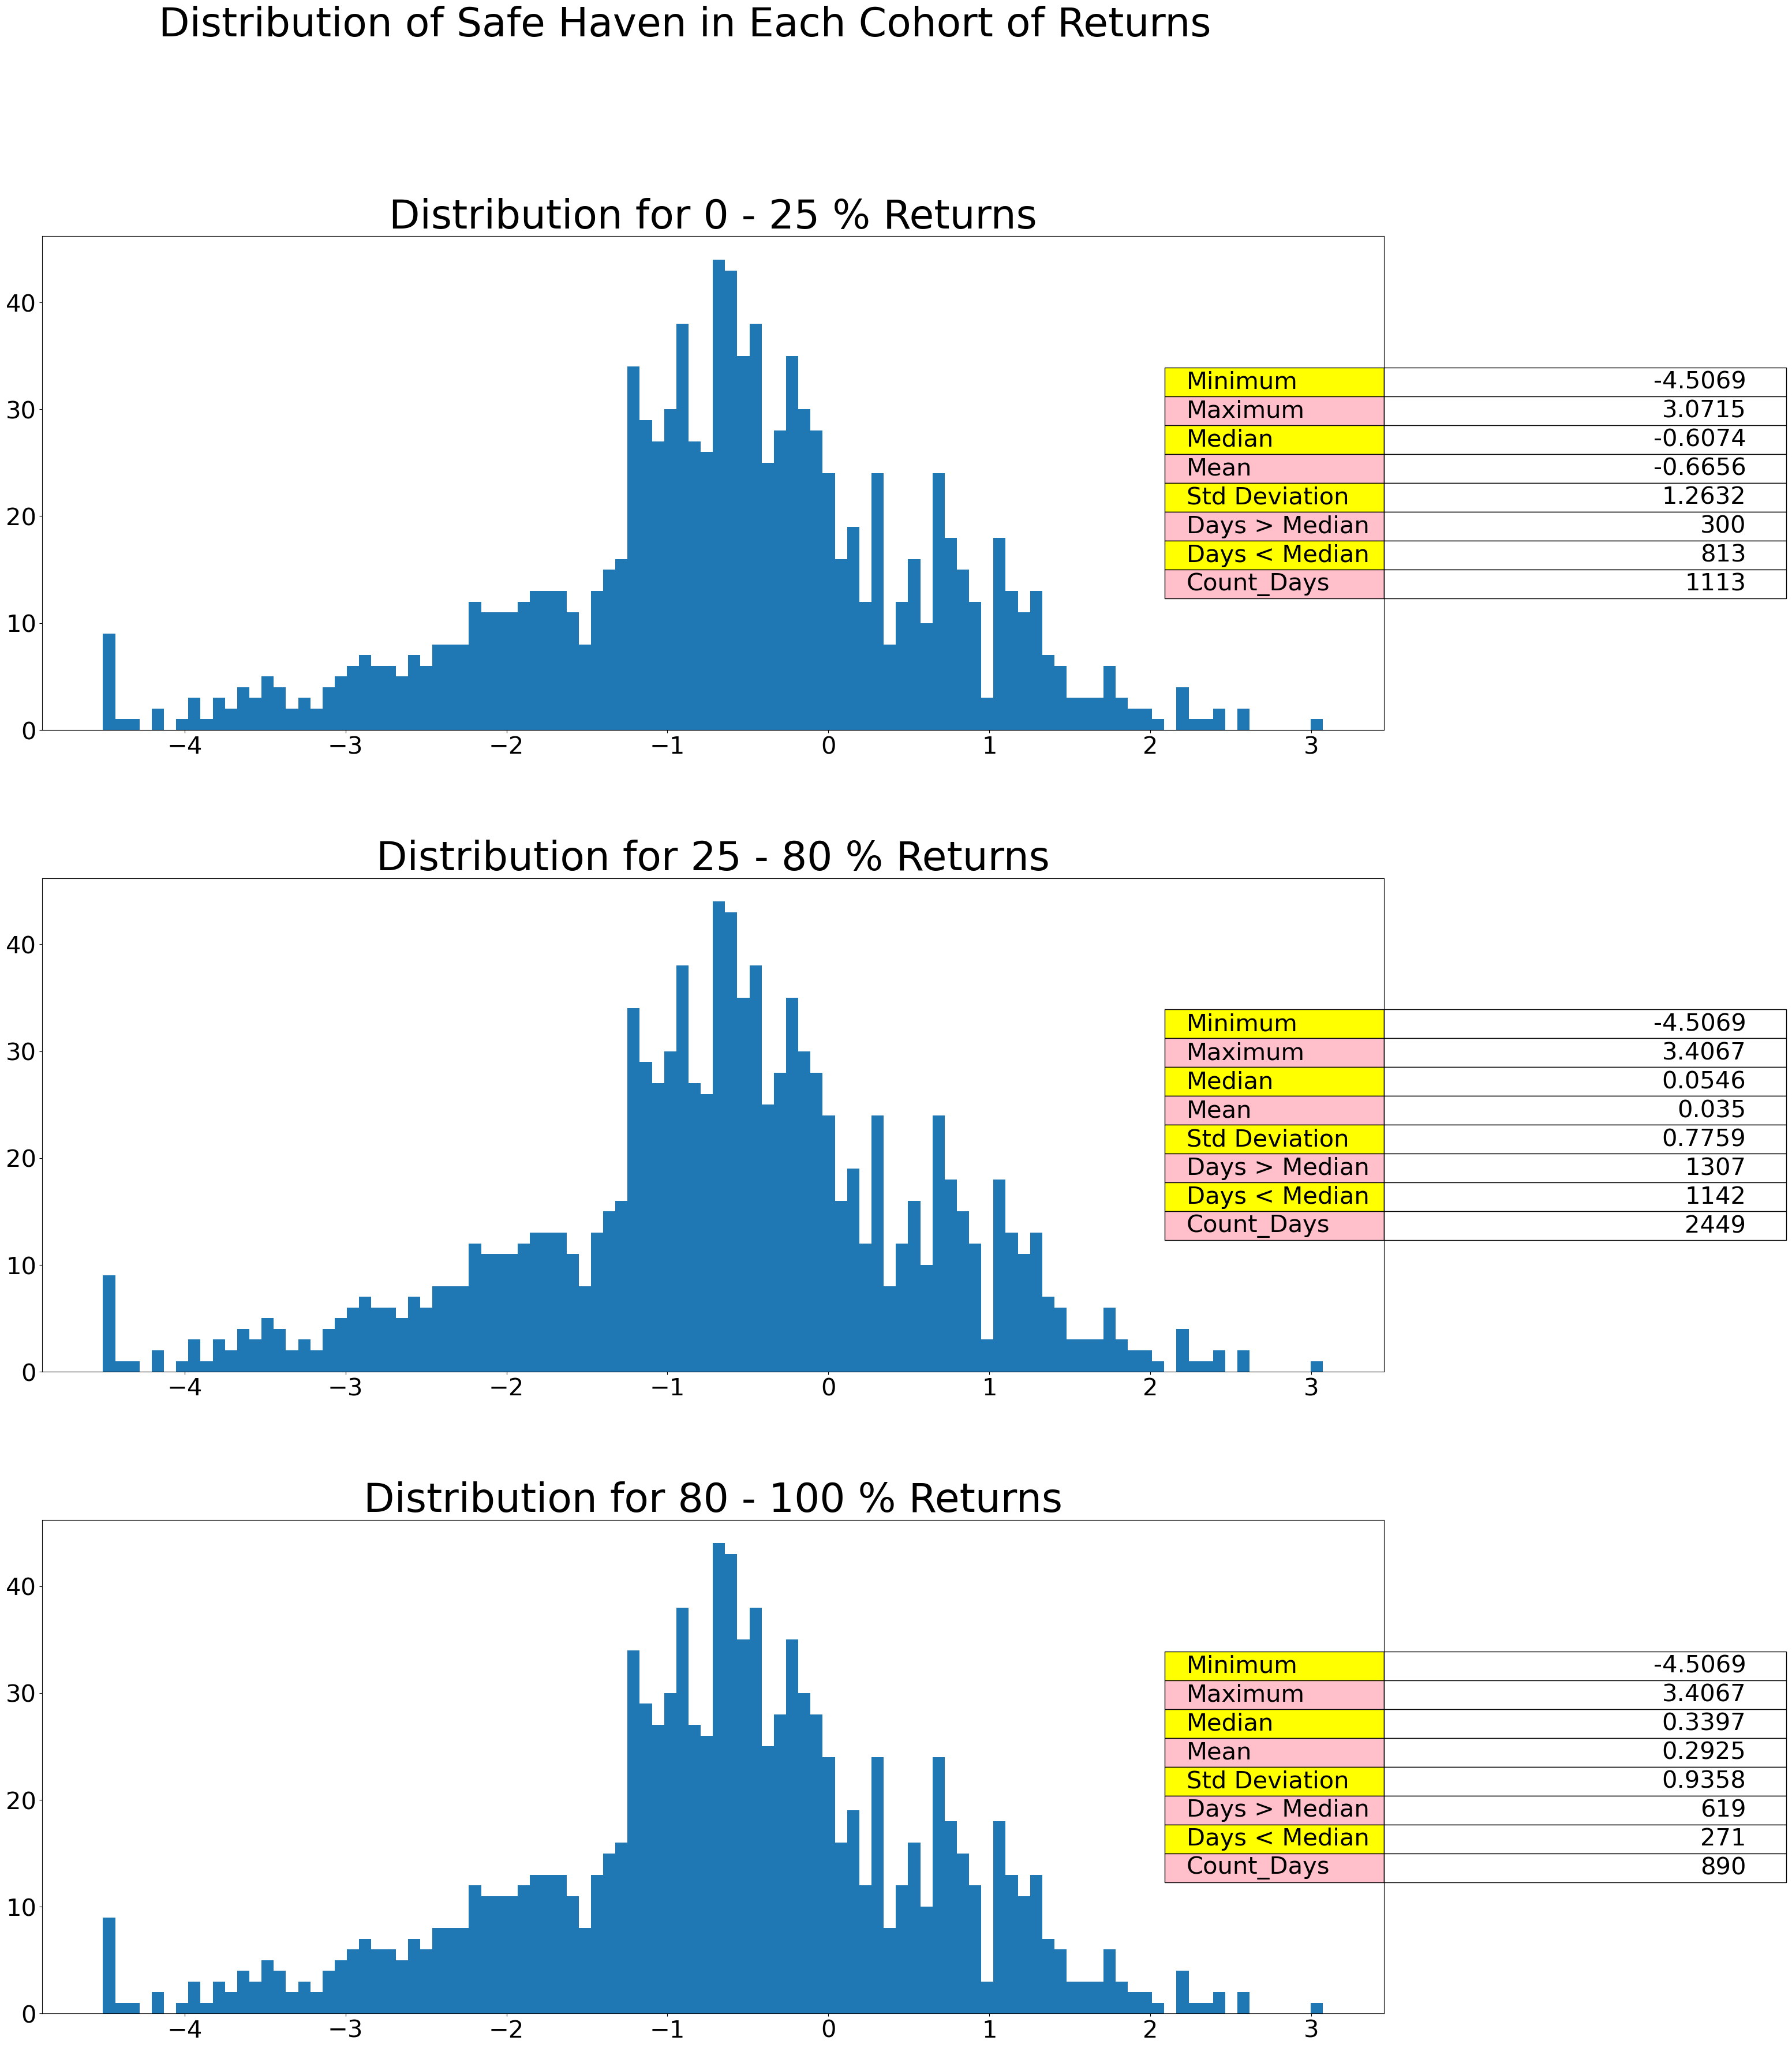

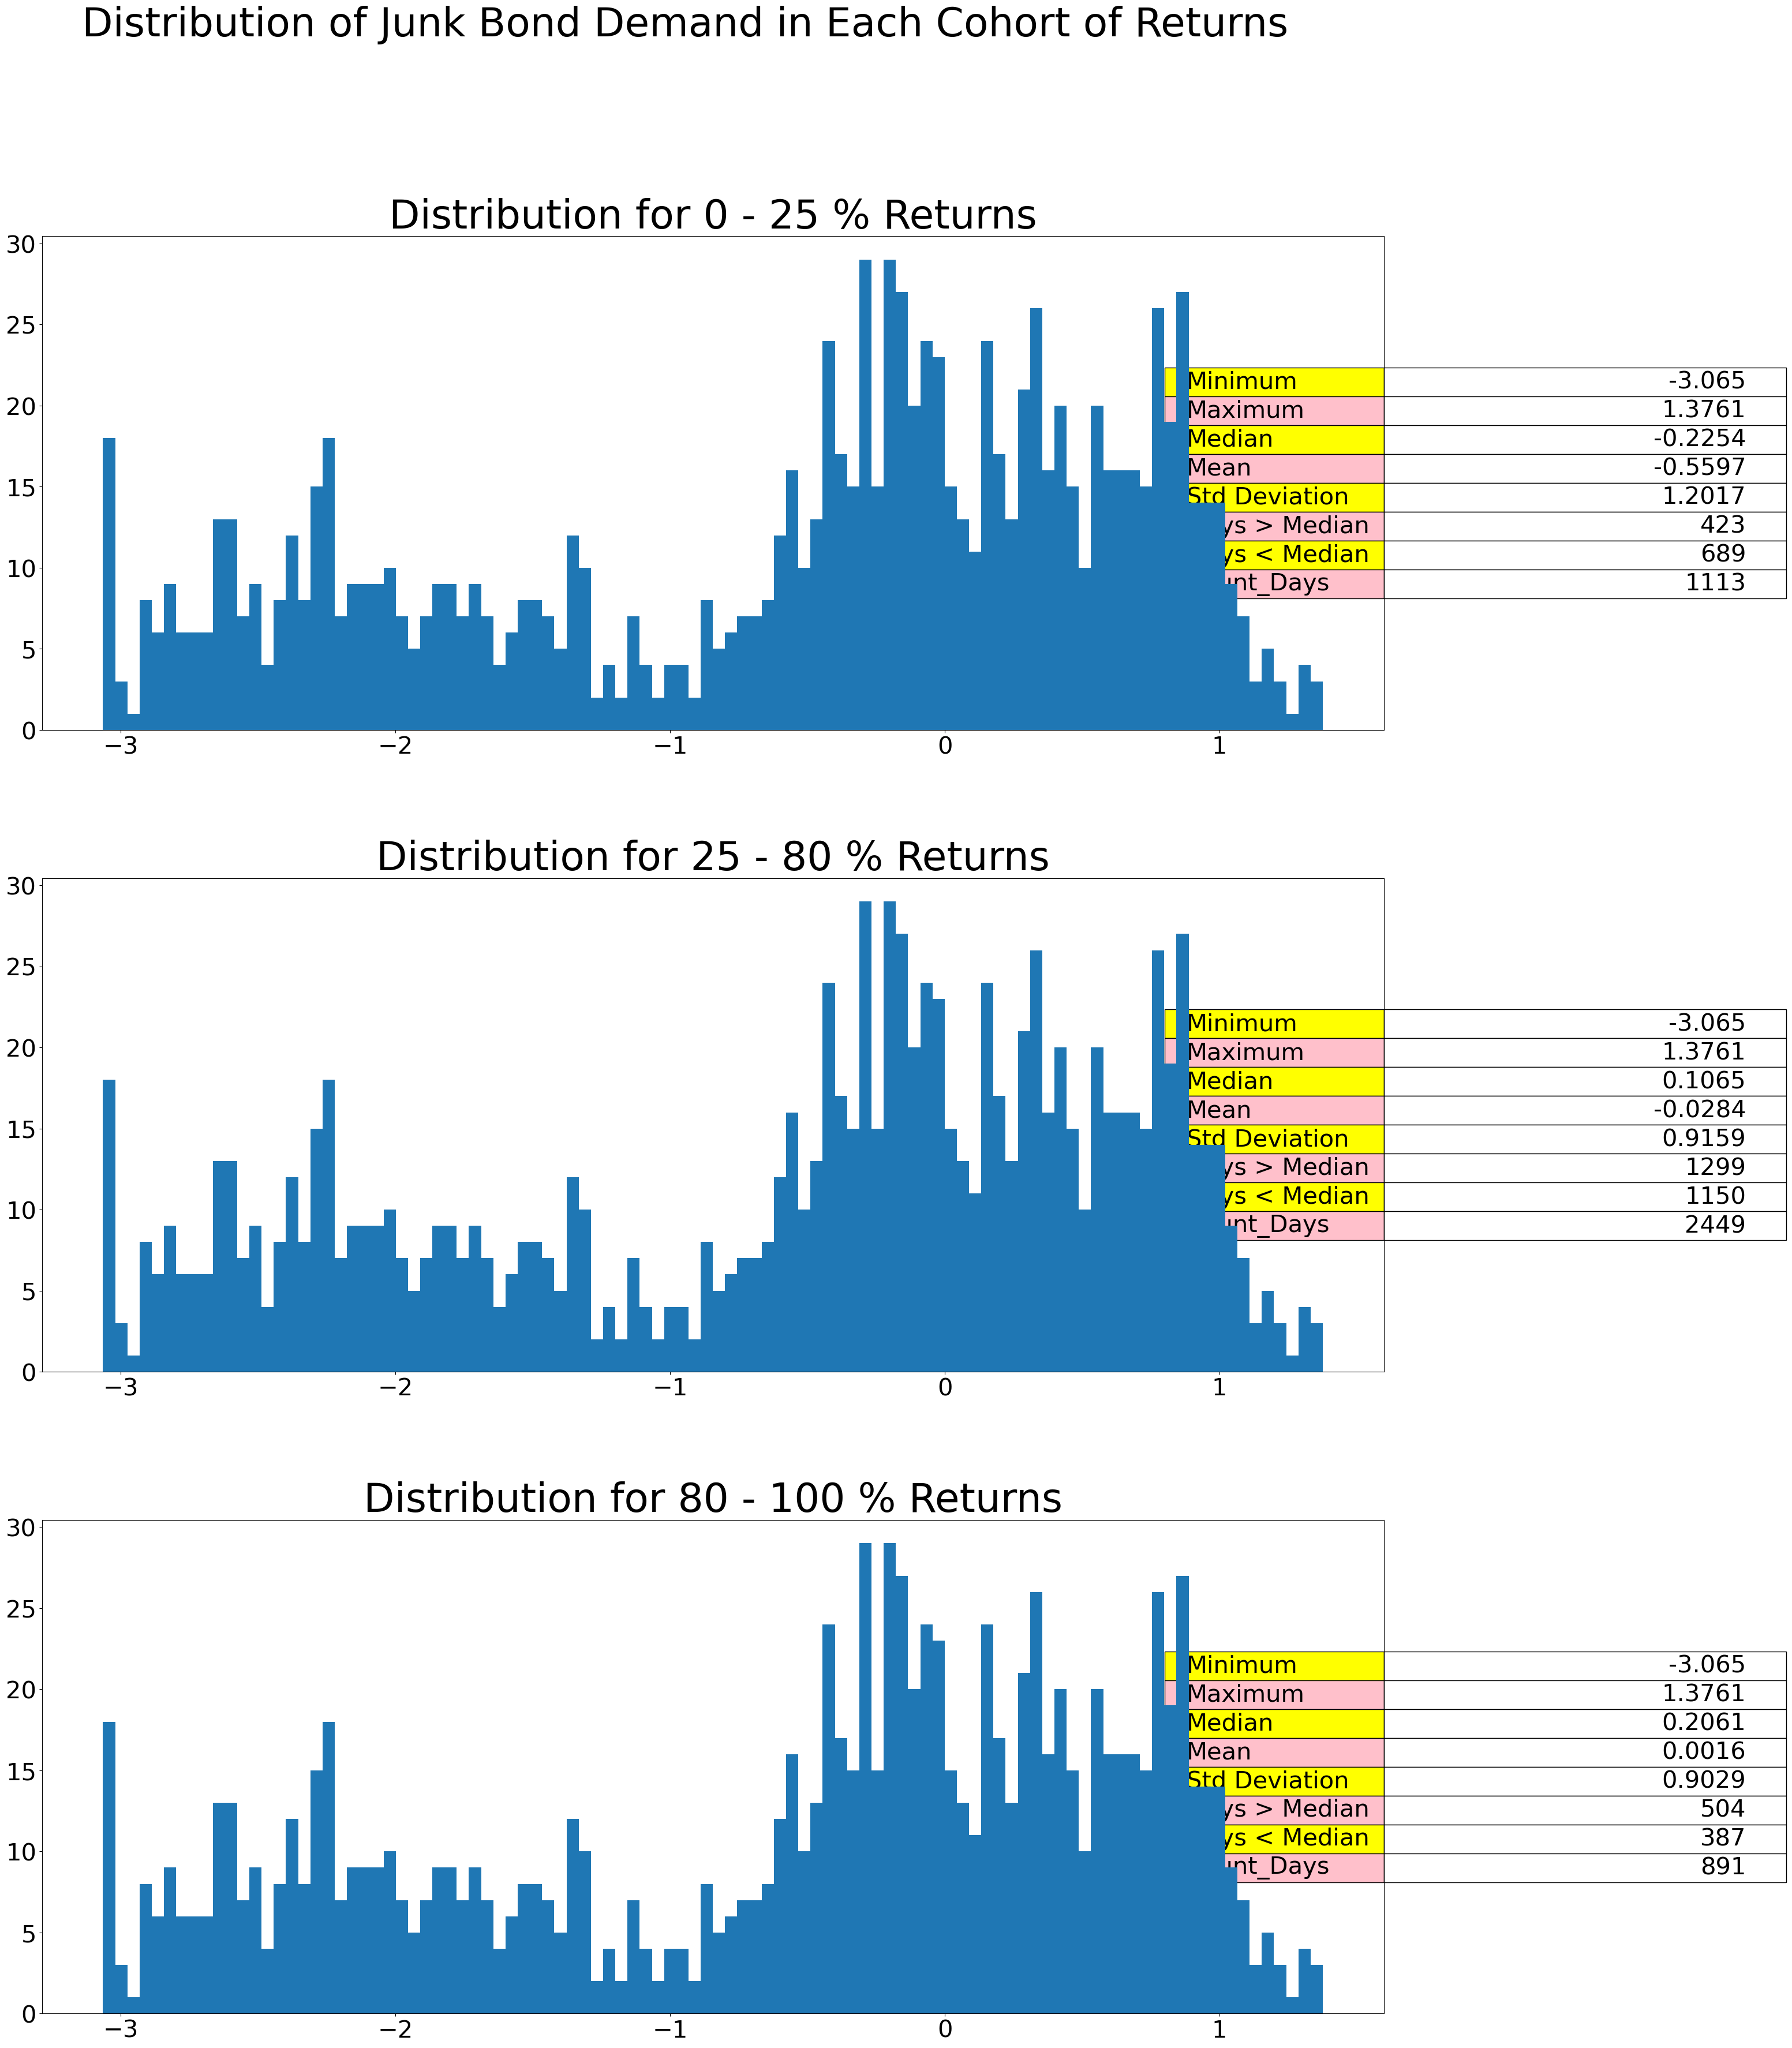

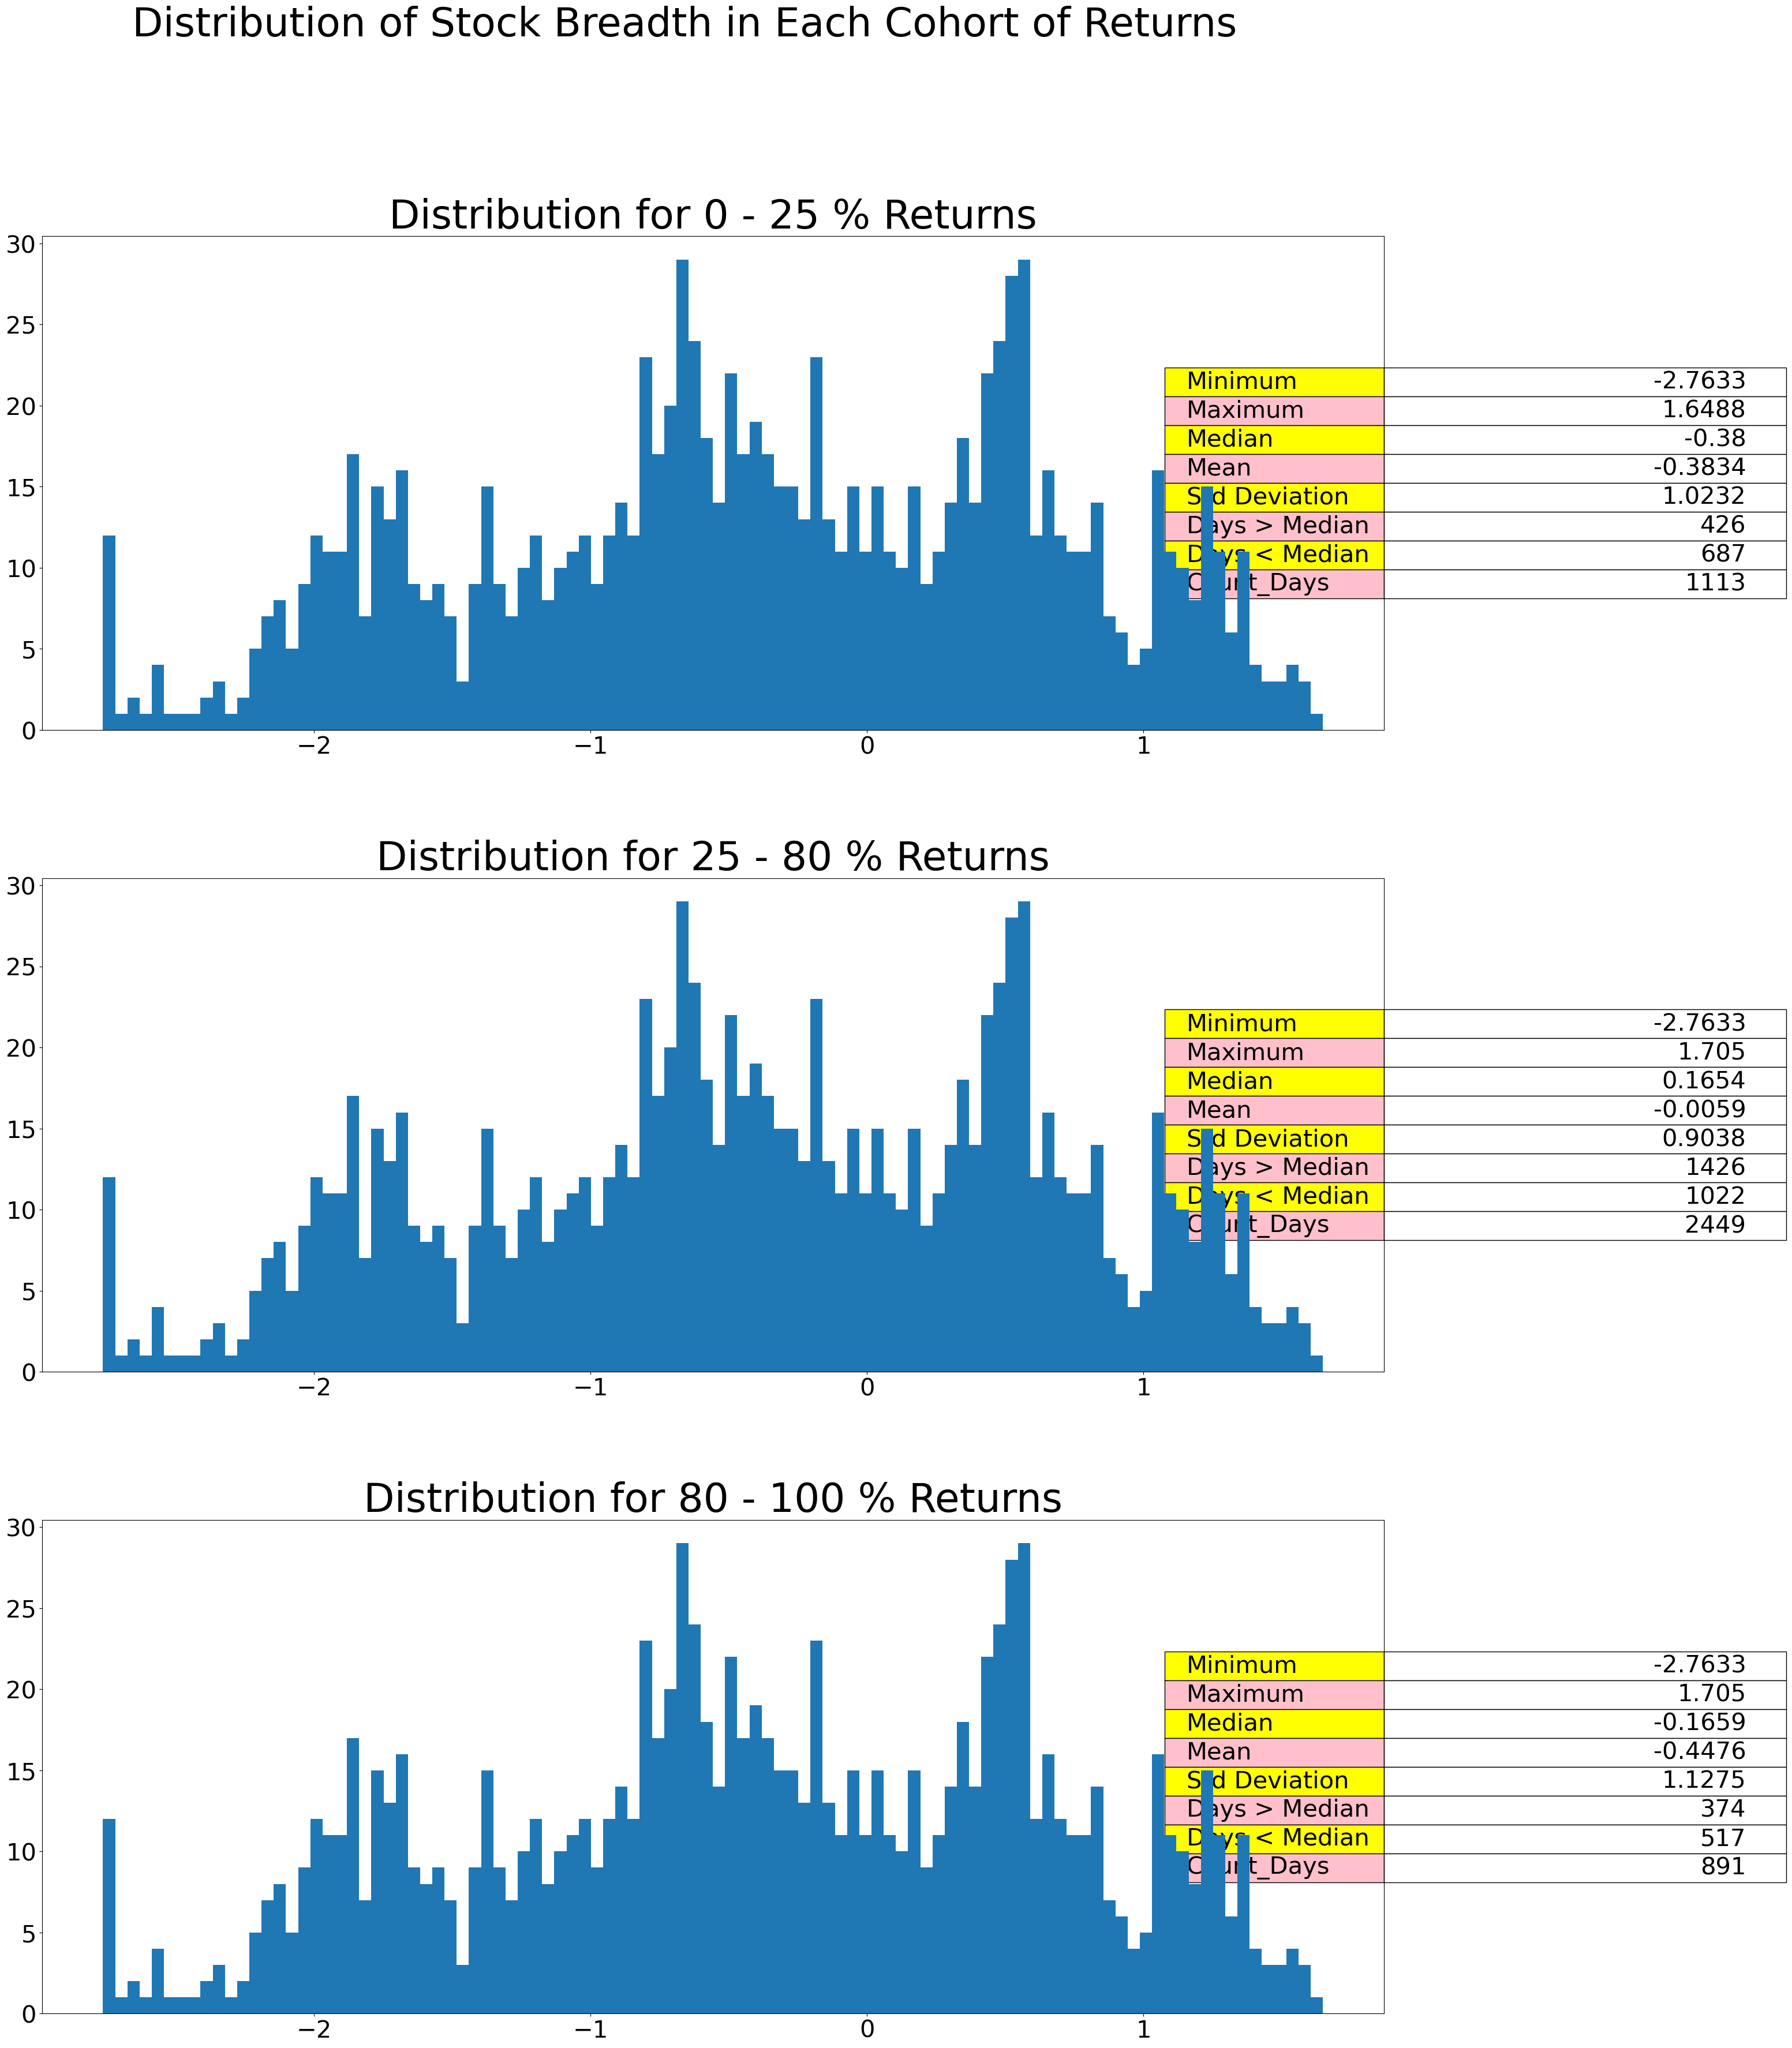

In [20]:
for i in range(1,8):
    return_based_feature_distribution(monthly_returns_data.columns[i],monthly_returns_data,3,25,80) #(feature, df = monthly_returns_data, lag = 3, low = 25, high = 75)

In [28]:
monthy_returns_data = monthly_returns_data.sort_values(by=str(3)+"_Day_Lag")
df_low = monthy_returns_data.iloc[:int((25/100)*monthly_returns_data.shape[0])]
corr=df_low.corr()

C:\Users\AmitavaRoy\AppData\Local\Temp\ipykernel_15000\3650029764.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_low.corr()


In [29]:
corr

Strength  Momentum  Volatility   Options  Safe Haven  \
Strength          1.000000  0.631063    0.320986  0.259316    0.535209   
Momentum          0.631063  1.000000    0.258809 -0.094172    0.590707   
Volatility        0.320986  0.258809    1.000000  0.268655    0.518908   
Options           0.259316 -0.094172    0.268655  1.000000    0.258063   
Safe Haven        0.535209  0.590707    0.518908  0.258063    1.000000   
Junk Bond Demand  0.506092  0.629262    0.413135  0.078751    0.424165   
Stock Breadth     0.396494  0.742630    0.079967 -0.038523    0.231998   
FGI               0.768443  0.796341    0.636684  0.353735    0.772910   
SPXT             -0.031324  0.145558    0.275664  0.176622    0.449623   
FGI_SMAVG_5       0.693173  0.802689    0.591676  0.319304    0.745044   
0_Day_Lag         0.082845  0.338248    0.307965 -0.112389    0.262930   
1_Day_Lag         0.080164  0.326399    0.307175 -0.116779    0.254818   
3_Day_Lag         0.102946  0.314952    0.313922 -0.133265    0.250355   
5_Day_Lag         0.118631  0.251578    0.330921 -0.117028    0.227078   

                  Junk Bond Demand  Stock Breadth       FGI      SPXT  \
Strength                  0.506092       0.396494  0.768443 -0.031324   
Momentum                  0.629262       0.742630  0.796341  0.145558   
Volatility                0.413135       0.079967  0.636684  0.275664   
Options                   0.078751      -0.038523  0.353735  0.176622   
Safe Haven                0.424165       0.231998  0.772910  0.449623   
Junk Bond Demand          1.000000       0.508491  0.760970  0.201731   
Stock Breadth             0.508491       1.000000  0.600541  0.009930   
FGI                       0.760970       0.600541  1.000000  0.273980   
SPXT                      0.201731       0.009930  0.273980  1.000000   
FGI_SMAVG_5               0.772433       0.627105  0.969989  0.302727   
0_Day_Lag                 0.254658       0.088337  0.274987 -0.022114   
1_Day_Lag                 0.256014       0.098124  0.271147 -0.028834   
3_Day_Lag                 0.281327       0.132065  0.282586 -0.023742   
5_Day_Lag                 0.255293       0.096075  0.261627 -0.027949   

                  FGI_SMAVG_5  0_Day_Lag  1_Day_Lag  3_Day_Lag  5_Day_Lag  
Strength             0.693173   0.082845   0.080164   0.102946   0.118631  
Momentum             0.802689   0.338248   0.326399   0.314952   0.251578  
Volatility           0.591676   0.307965   0.307175   0.313922   0.330921  
Options              0.319304  -0.112389  -0.116779  -0.133265  -0.117028  
Safe Haven           0.745044   0.262930   0.254818   0.250355   0.227078  
Junk Bond Demand     0.772433   0.254658   0.256014   0.281327   0.255293  
Stock Breadth        0.627105   0.088337   0.098124   0.132065   0.096075  
FGI                  0.969989   0.274987   0.271147   0.282586   0.261627  
SPXT                 0.302727  -0.022114  -0.028834  -0.023742  -0.027949  
FGI_SMAVG_5          1.000000   0.276927   0.274810   0.276242   0.241334  
0_Day_Lag            0.276927   1.000000   0.895079   0.752635   0.572926  
1_Day_Lag            0.274810   0.895079   1.000000   0.812429   0.630864  
3_Day_Lag            0.276242   0.752635   0.812429   1.000000   0.802734  
5_Day_Lag            0.241334   0.572926   0.630864   0.802734   1.000000

In [30]:
df_high = monthy_returns_data.iloc[int((80/100)*monthly_returns_data.shape[0]):]
corr_high=df_high.corr()

C:\Users\AmitavaRoy\AppData\Local\Temp\ipykernel_15000\4141124298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_high=df_high.corr()


In [31]:
corr_high

Strength  Momentum  Volatility   Options  Safe Haven  \
Strength          1.000000  0.711613   -0.145737 -0.061055    0.357261   
Momentum          0.711613  1.000000   -0.282339 -0.226588    0.380014   
Volatility       -0.145737 -0.282339    1.000000  0.189138    0.270726   
Options          -0.061055 -0.226588    0.189138  1.000000    0.109049   
Safe Haven        0.357261  0.380014    0.270726  0.109049    1.000000   
Junk Bond Demand  0.539089  0.597144   -0.358088 -0.044779    0.150694   
Stock Breadth     0.531763  0.719132   -0.250520 -0.144294    0.098506   
FGI               0.780541  0.794287    0.021356  0.196126    0.586724   
SPXT             -0.440436 -0.419396    0.240666  0.240628   -0.119066   
FGI_SMAVG_5       0.728956  0.803124   -0.036010  0.140591    0.565276   
0_Day_Lag         0.094756 -0.059536    0.184917  0.137754    0.123104   
1_Day_Lag         0.065471 -0.100372    0.147604  0.158682    0.093590   
3_Day_Lag        -0.009775 -0.247836    0.152471  0.181602    0.017117   
5_Day_Lag         0.005240 -0.182641    0.119853  0.095427    0.000944   

                  Junk Bond Demand  Stock Breadth       FGI      SPXT  \
Strength                  0.539089       0.531763  0.780541 -0.440436   
Momentum                  0.597144       0.719132  0.794287 -0.419396   
Volatility               -0.358088      -0.250520  0.021356  0.240666   
Options                  -0.044779      -0.144294  0.196126  0.240628   
Safe Haven                0.150694       0.098506  0.586724 -0.119066   
Junk Bond Demand          1.000000       0.634139  0.692863 -0.096609   
Stock Breadth             0.634139       1.000000  0.725300 -0.078000   
FGI                       0.692863       0.725300  1.000000 -0.193005   
SPXT                     -0.096609      -0.078000 -0.193005  1.000000   
FGI_SMAVG_5               0.705467       0.740535  0.966881 -0.201129   
0_Day_Lag                -0.042308      -0.256335  0.018710 -0.039812   
1_Day_Lag                -0.055545      -0.253362 -0.010601 -0.041892   
3_Day_Lag                -0.130608      -0.298101 -0.113428 -0.047849   
5_Day_Lag                -0.061635      -0.193841 -0.075654 -0.041874   

                  FGI_SMAVG_5  0_Day_Lag  1_Day_Lag  3_Day_Lag  5_Day_Lag  
Strength             0.728956   0.094756   0.065471  -0.009775   0.005240  
Momentum             0.803124  -0.059536  -0.100372  -0.247836  -0.182641  
Volatility          -0.036010   0.184917   0.147604   0.152471   0.119853  
Options              0.140591   0.137754   0.158682   0.181602   0.095427  
Safe Haven           0.565276   0.123104   0.093590   0.017117   0.000944  
Junk Bond Demand     0.705467  -0.042308  -0.055545  -0.130608  -0.061635  
Stock Breadth        0.740535  -0.256335  -0.253362  -0.298101  -0.193841  
FGI                  0.966881   0.018710  -0.010601  -0.113428  -0.075654  
SPXT                -0.201129  -0.039812  -0.041892  -0.047849  -0.041874  
FGI_SMAVG_5          1.000000   0.008834  -0.017956  -0.143360  -0.105270  
0_Day_Lag            0.008834   1.000000   0.807578   0.523071   0.360600  
1_Day_Lag           -0.017956   0.807578   1.000000   0.634598   0.437906  
3_Day_Lag           -0.143360   0.523071   0.634598   1.000000   0.680311  
5_Day_Lag           -0.105270   0.360600   0.437906   0.680311   1.000000

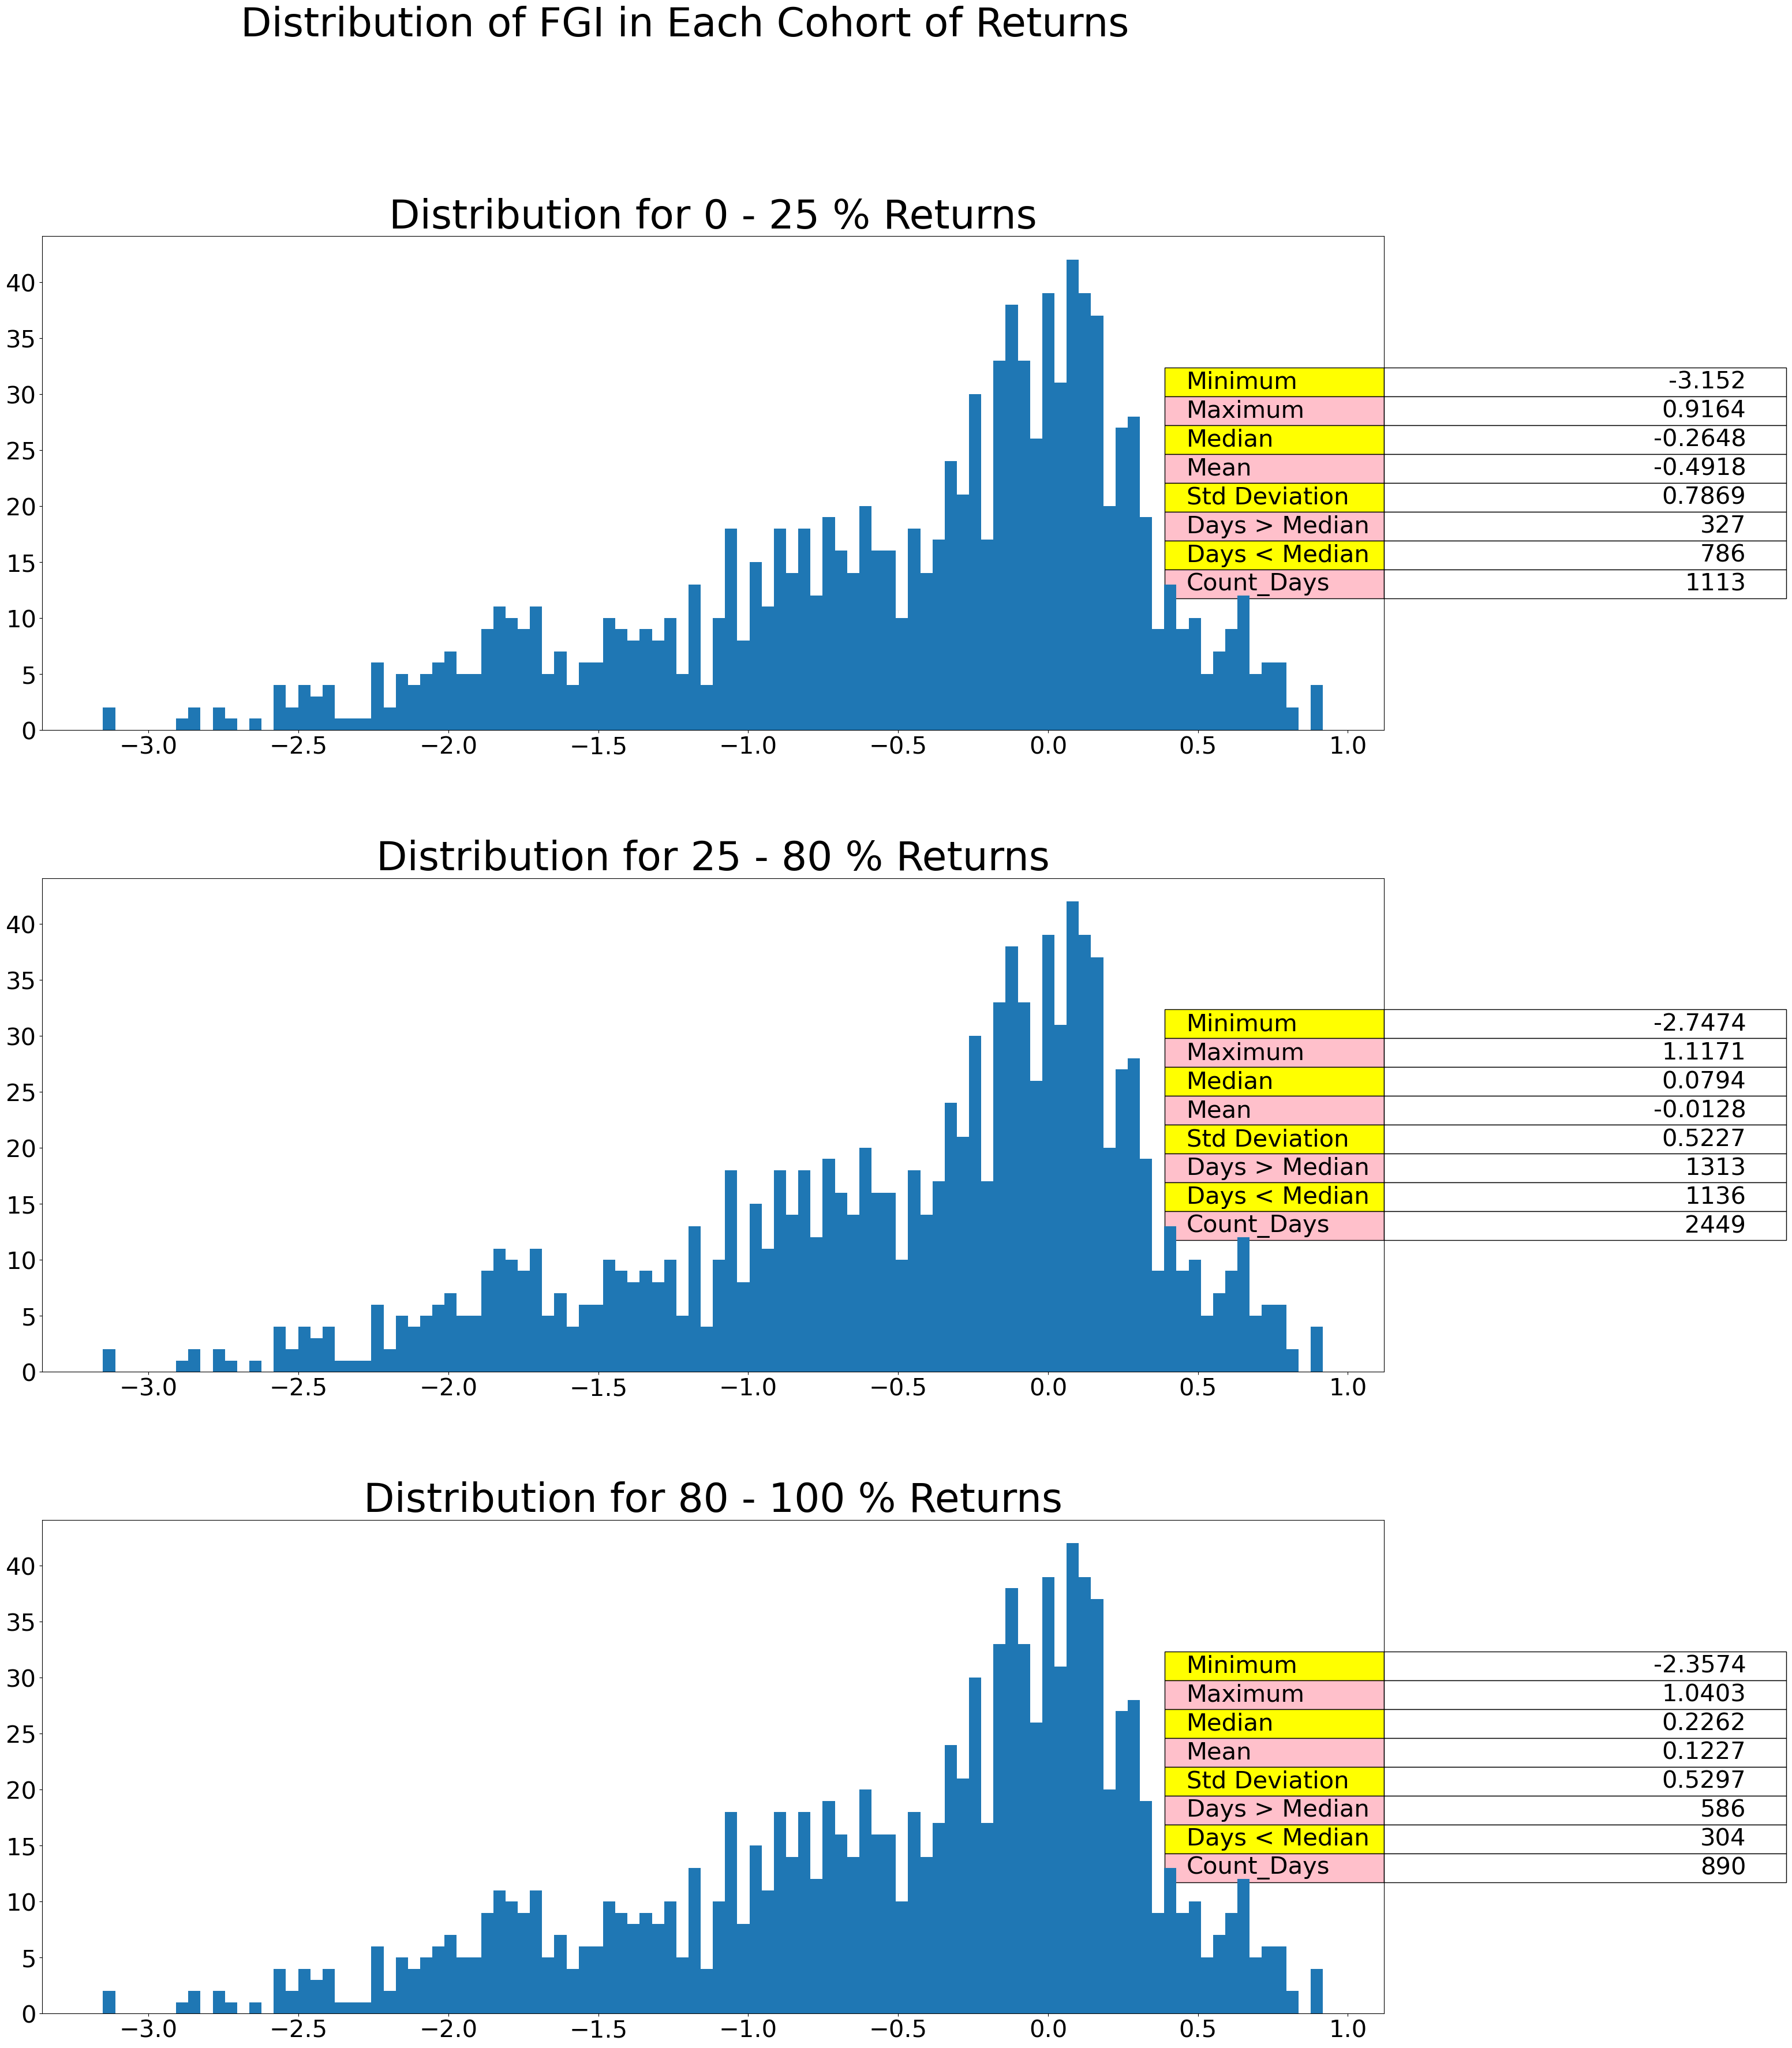

In [26]:
return_based_feature_distribution("FGI",monthly_returns_data,3,25,80)

In [23]:
monthly_returns_data["3_Day_Lag"].quantile(0.15)

-0.033658350302949246

In [24]:
monthly_returns_data["3_Day_Lag"].quantile(0.25)

-0.012102297877952431

In [25]:
monthly_returns_data["3_Day_Lag"].quantile(0.8)

0.04098116862200867


# Backtesting Function

In [54]:
def backtest_strategy(fgi_sheet="FGI_2_final.xlsx",spxt_sheet="S&P500.xlsx",fear_quantile=0.4,greed_quantile=0.6,lags=[0,1,3,5],n_months=1,mavg=5,long="yes",short="yes"):
    bt_df1 = pd.read_excel(fgi_sheet)
    bt_df1 = pd.DataFrame({'Date' : bt_df1["Date"], 'FGI' : bt_df1["FGI_2"]})
    spxt = pd.read_excel(spxt_sheet)
    bt_df1 = pd.merge(bt_df1, spxt, on='Date')
    bt_df1["FGI_SMAVG"+str(mavg)] = bt_df1["FGI"].rolling(window=mavg).mean().shift(-(mavg-1))
    fear_cutoff1 = bt_df1["FGI_SMAVG"+str(mavg)].quantile(q=fear_quantile)
    greed_cutoff1= bt_df1["FGI_SMAVG"+str(mavg)].quantile(q=greed_quantile)
    
    bt_df1["Long/Short"] = pd.Series(dtype="string")
    for i in range(bt_df1.shape[0]):
        if(short=="yes" and bt_df1.iloc[i,3]>=greed_cutoff1):
            bt_df1.iloc[i,4] = "Short"
        elif(long=="yes" and bt_df1.iloc[i,3]<=fear_cutoff1):
            bt_df1.iloc[i,4] = "Long"
        else:
            bt_df1.iloc[i,4] = "Sideways"
            
    for x in lags:
        bt_df1[str(x)+"_Day_Lag"] = pd.Series(dtype="float")
        for i in range(n_months*22 + x,bt_df1.shape[0]):
            if(bt_df1.loc[i,"Long/Short"]=="Long"):
                bt_df1.loc[i,[str(x)+"_Day_Lag"]] = (bt_df1.loc[i-x-n_months*22,"SPXT"] - bt_df1.loc[i-x,"SPXT"])/bt_df1.loc[i-x,"SPXT"]
            elif(bt_df1.loc[i,"Long/Short"]=="Short"):
                bt_df1.loc[i,[str(x)+"_Day_Lag"]] = ((bt_df1.loc[i-x,"SPXT"] - bt_df1.loc[i-x-n_months*22,"SPXT"])/bt_df1.loc[i-1,"SPXT"]) 
            else:
                bt_df1.loc[i,[str(x)+"_Day_Lag"]] = 0
                
    return bt_df1
    

In [142]:
bt_df = backtest_strategy() # (fgi_sheet="FGI_2_final.xlsx",spxt_sheet="S&P500.xlsx",fear_quantile=0.4,greed_quantile=0.6,lags=[0,1,3,5],n_months=1,mavg=5,long="yes",short="yes")

In [143]:
bt_df.head(35)

Date        FGI     SPXT  FGI_SMAVG5 Long/Short  0_Day_Lag  \
0  2023-05-05  76.807929  8858.86   80.208438      Short        NaN   
1  2023-05-04  75.691390  8697.68   80.830725      Short        NaN   
2  2023-05-03  80.734407  8759.95   80.755506      Short        NaN   
3  2023-05-02  86.601211  8821.59   80.148323      Short        NaN   
4  2023-05-01  81.207253  8924.92   79.454192      Short        NaN   
5  2023-04-28  79.919365  8928.35   80.168200      Short        NaN   
6  2023-04-27  75.315292  8854.32   79.568747      Short        NaN   
7  2023-04-26  77.698495  8684.19   80.161838      Short        NaN   
8  2023-04-25  83.130556  8717.63   80.962333      Short        NaN   
9  2023-04-24  84.777291  8857.30   81.044834      Short        NaN   
10 2023-04-21  76.922102  8849.76   80.122777      Short        NaN   
11 2023-04-20  78.280745  8841.62   81.109842      Short        NaN   
12 2023-04-19  81.700970  8893.60   81.492285      Short        NaN   
13 2023-04-18  83.543062  8894.35   81.323718      Short        NaN   
14 2023-04-17  80.167004  8886.76   80.344124      Short        NaN   
15 2023-04-14  81.857430  8857.31   80.687404      Short        NaN   
16 2023-04-13  80.192961  8875.65   79.731058      Short        NaN   
17 2023-04-12  80.858131  8758.11   79.768388      Short        NaN   
18 2023-04-11  78.645096  8794.29   79.967245      Short        NaN   
19 2023-04-10  81.883401  8794.65   80.401347      Short        NaN   
20 2023-04-06  77.075702  8785.70   79.621224      Short        NaN   
21 2023-04-05  80.379612  8752.54   79.278435      Short        NaN   
22 2023-04-04  81.852414  8773.31   78.426292      Short  -0.009774   
23 2023-04-03  80.815608  8823.66   77.881306      Short   0.014359   
24 2023-03-31  77.982785  8791.13   76.595609      Short   0.003534   
25 2023-03-30  75.361754  8665.70   75.985844      Short  -0.017733   
26 2023-03-29  76.118900  8615.29   74.926906   Sideways   0.000000   
27 2023-03-28  79.127483  8494.35   74.881000   Sideways   0.000000   
28 2023-03-27  74.387123  8507.54   74.028152   Sideways   0.000000   
29 2023-03-24  74.933959  8493.55   73.160855   Sideways   0.000000   
30 2023-03-23  70.067062  8445.87   71.561160   Sideways   0.000000   
31 2023-03-22  75.889371  8420.02   71.739470   Sideways   0.000000   
32 2023-03-21  74.863243  8560.31   70.682981       Long   0.033813   
33 2023-03-20  70.050642  8449.98   65.937075       Long   0.046348   
34 2023-03-17  66.935483  8375.21   66.419572       Long   0.061896   

    1_Day_Lag  3_Day_Lag  5_Day_Lag  
0         NaN        NaN        NaN  
1         NaN        NaN        NaN  
2         NaN        NaN        NaN  
3         NaN        NaN        NaN  
4         NaN        NaN        NaN  
5         NaN        NaN        NaN  
6         NaN        NaN        NaN  
7         NaN        NaN        NaN  
8         NaN        NaN        NaN  
9         NaN        NaN        NaN  
10        NaN        NaN        NaN  
11        NaN        NaN        NaN  
12        NaN        NaN        NaN  
13        NaN        NaN        NaN  
14        NaN        NaN        NaN  
15        NaN        NaN        NaN  
16        NaN        NaN        NaN  
17        NaN        NaN        NaN  
18        NaN        NaN        NaN  
19        NaN        NaN        NaN  
20        NaN        NaN        NaN  
21        NaN        NaN        NaN  
22        NaN        NaN        NaN  
23  -0.009751        NaN        NaN  
24   0.014278        NaN        NaN  
25   0.003547  -0.009731        NaN  
26   0.000000   0.000000        NaN  
27   0.000000   0.000000   0.000000  
28   0.000000   0.000000   0.000000  
29   0.000000   0.000000   0.000000  
30   0.000000   0.000000   0.000000  
31   0.000000   0.000000   0.000000  
32   0.051933   0.022445   0.051093  
33   0.033813   0.032177   0.040761  
34   0.046348   0.051933   0.022445

In [144]:
bt_df.describe()

FGI          SPXT   FGI_SMAVG5    0_Day_Lag    1_Day_Lag  \
count  4490.000000   4490.000000  4486.000000  4468.000000  4467.000000   
mean     70.928075   4059.481777    70.924736    -0.003309    -0.002651   
std      12.457615   2350.680334    11.927547     0.045138     0.045320   
min       0.000000   1095.040000     4.651906    -0.335400    -0.335400   
25%      65.519543   2139.105000    65.662397    -0.026683    -0.025988   
50%      73.566561   3461.690000    73.676721     0.000000     0.000000   
75%      79.196355   5499.177500    79.180181     0.016810     0.017818   
max     100.000000  10050.410000    94.941729     0.292568     0.292185   

         3_Day_Lag    5_Day_Lag  
count  4465.000000  4463.000000  
mean     -0.001263    -0.001084  
std       0.045499     0.045694  
min      -0.296728    -0.296728  
25%      -0.024281    -0.024219  
50%       0.000000     0.000000  
75%       0.019331     0.020328  
max       0.335766     0.335478

# Trading Strategy


In [123]:
def trading_strategy(fgi_sheet="FGI_2_final.xlsx",spxt_sheet="S&P500.xlsx",fear_quantile=0.4,greed_quantile=0.6,lags=[0,1,3,5],n_months=1,mavg=5):
    df = pd.read_excel(fgi_sheet)
    df = pd.DataFrame({'Date' : df["Date"], 'FGI' : df["FGI_2"]})
    spxt = pd.read_excel(spxt_sheet)
    df = pd.merge(df, spxt, on='Date')
    df["FGI_SMAVG_"+str(mavg)] = df["FGI"].rolling(window=mavg).mean().shift(-(mavg-1))
    fear_cutoff1 = df["FGI_SMAVG_"+str(mavg)].quantile(q=fear_quantile)
    greed_cutoff1= df["FGI_SMAVG_"+str(mavg)].quantile(q=greed_quantile)
    
    df["Buy/Sell"] = pd.Series(dtype="string")
    for i in range(df.shape[0]):
        if(df["FGI_SMAVG_"+str(mavg)][i]>greed_cutoff1):
            df.iloc[i,4] = "Sell"
        elif(df["FGI_SMAVG_"+str(mavg)][i]<fear_cutoff1):
            df.iloc[i,4] = "Buy"
        else:
            df.iloc[i,4] = "Sideways"
            
    df.sort_values(by='Date', inplace = True)
    df['Date'] = pd.to_datetime(df['Date'])
    df=df.set_index(pd.DatetimeIndex(df['Date'].values))
            
    buy = []
    sell=[]
    returns = []
    buy_price = 0
    flag = 0
    
    
    for i in range(len(df)):
        if(df["Buy/Sell"][i]=="Buy" and flag == 0):
            buy.append(df['SPXT'][i])
            sell.append(np.nan)
            returns.append(np.nan)
            buy_price = df['SPXT'][i]
            flag = 1
        elif(df["Buy/Sell"][i]=="Sell" and flag == 1 and buy_price<df['SPXT'][i]):
            sell.append(df['SPXT'][i])
            returns.append((df['SPXT'][i]-buy_price)/buy_price)
            buy.append(np.nan)
            flag=0
            buy_price=0
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            returns.append(np.nan)
                
    return (df, buy, sell, returns)
    

In [124]:
strat = trading_strategy()
df_strat = strat[0]
df_strat['Buy'] = strat[1]
df_strat['Sell'] = strat[2]
df_strat['Returns'] = strat[3]

In [125]:
df_strat.head()

Date        FGI     SPXT  FGI_SMAVG_5  Buy/Sell  Buy  Sell  \
2005-07-06 2005-07-06  72.985864  1791.05          NaN  Sideways  NaN   NaN   
2005-07-07 2005-07-07  67.704930  1795.55          NaN  Sideways  NaN   NaN   
2005-07-08 2005-07-08  70.493815  1816.52          NaN  Sideways  NaN   NaN   
2005-07-11 2005-07-11  75.028743  1827.91          NaN  Sideways  NaN   NaN   
2005-07-12 2005-07-12  73.226503  1832.15    71.887971  Sideways  NaN   NaN   

            Returns  
2005-07-06      NaN  
2005-07-07      NaN  
2005-07-08      NaN  
2005-07-11      NaN  
2005-07-12      NaN

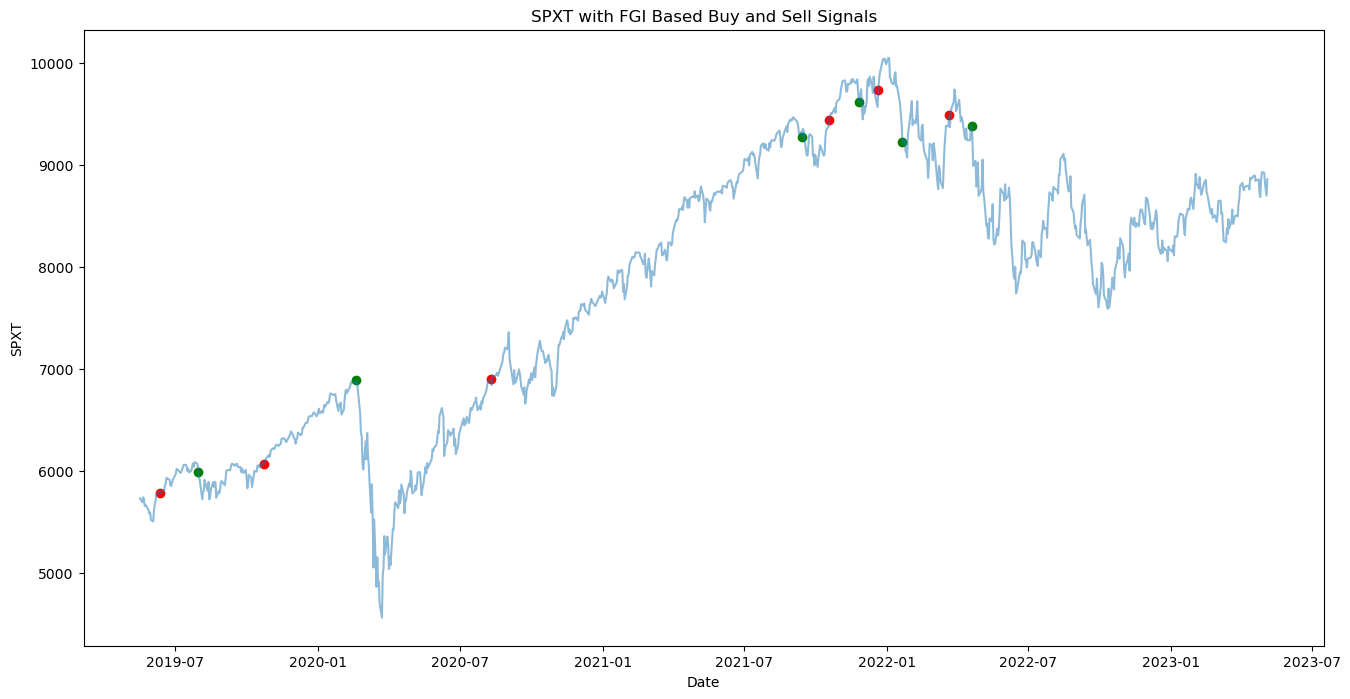

In [126]:
plt.figure(figsize=(16,8))
plt.title('SPXT with FGI Based Buy and Sell Signals')
plt.plot(df_strat['SPXT'][-1000:], alpha = 0.5, label = 'SPXT')
#plt.plot(df_strat['FGI_SMAVG_5'], alpha = 0.5, label = 'FGI_MAVG')
plt.scatter(df_strat['Date'][-1000:],df_strat['Buy'][-1000:],color='green', label='Buy Signal',alpha=1)
plt.scatter(df_strat['Date'][-1000:],df_strat['Sell'][-1000:],color='red', label='Sell Signal',alpha=1)
plt.xlabel('Date')
plt.ylabel('SPXT')
plt.show()

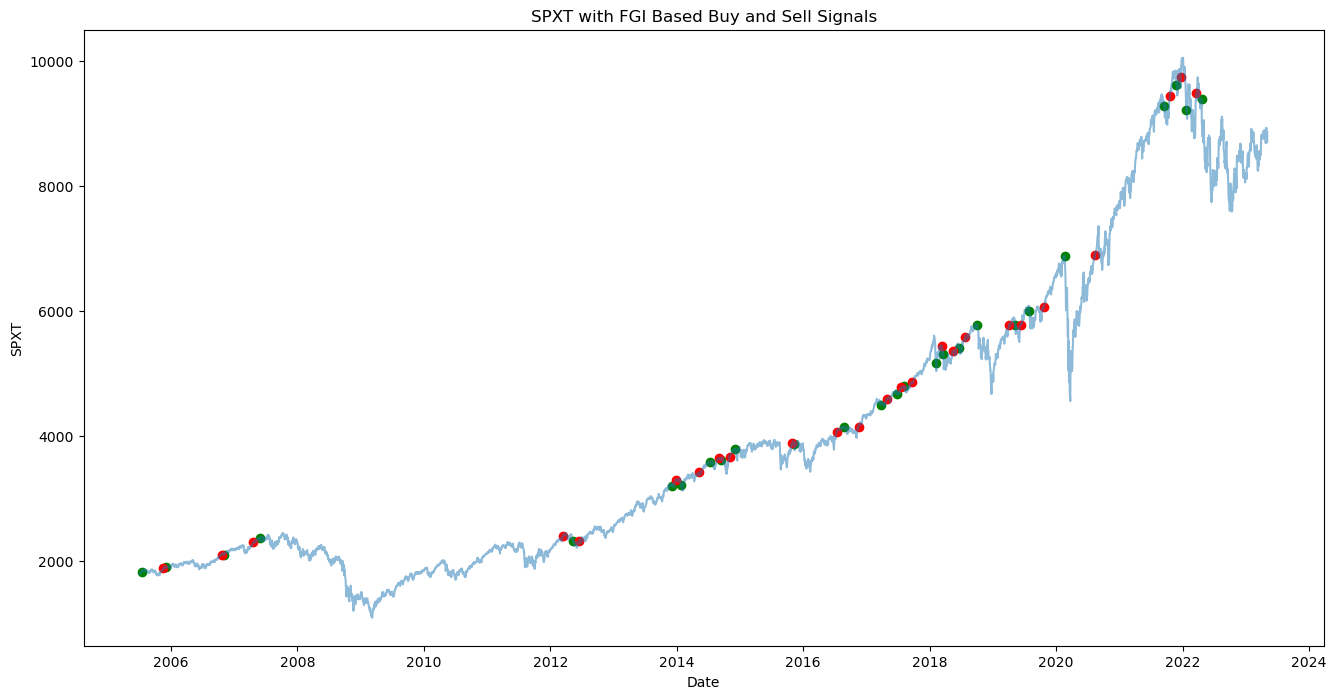

In [127]:
plt.figure(figsize=(16,8))
plt.title('SPXT with FGI Based Buy and Sell Signals')
plt.plot(df_strat['SPXT'], alpha = 0.5, label = 'SPXT')
#plt.plot(df_strat['FGI_SMAVG_5'], alpha = 0.5, label = 'FGI_MAVG')
plt.scatter(df_strat['Date'],df_strat['Buy'],color='green', label='Buy Signal',alpha=1)
plt.scatter(df_strat['Date'],df_strat['Sell'],color='red', label='Sell Signal',alpha=1)
plt.xlabel('Date')
plt.ylabel('SPXT')
plt.show()

In [128]:
df_strat.describe()

FGI          SPXT  FGI_SMAVG_5          Buy         Sell  \
count  4490.000000   4490.000000  4486.000000    26.000000    25.000000   
mean     70.928075   4059.481777    70.924736  4913.031923  4839.890800   
std      12.457615   2350.680334    11.927547  2356.147142  2232.255103   
min       0.000000   1095.040000     4.651906  1830.750000  1883.990000   
25%      65.519543   2139.105000    65.662397  3306.940000  3427.010000   
50%      73.566561   3461.690000    73.676721  4582.900000  4584.820000   
75%      79.196355   5499.177500    79.180181  5779.387500  5779.120000   
max     100.000000  10050.410000    94.941729  9614.250000  9738.730000   

         Returns  
count  25.000000  
mean    0.027254  
std     0.027240  
min     0.000057  
25%     0.012634  
50%     0.018237  
75%     0.032957  
max     0.101992